In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'mathtext.default':'regular'})

### Read in csv file and clean data

In [2]:
# Read csv files and drop irrelevant columns - Varying Share of Compliant Inspectees
rand_resp_radius_df = pd.read_csv('Radius of Peers, Random, Responsive.csv')
rand_resp_radius_df.drop(['logit-normal-mu', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  '%-Compliant-Inspectees', 'length-of-run', 'logit-normal-sigma',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Random-Inspections'], inplace=True, axis=1)
rand_resp_radius_df = rand_resp_radius_df.rename(columns={'[step]': 'step', '[run number]':'run','radius-of-peers':'radius'})
rand_resp_radius_df['total-inspectees'] = rand_resp_radius_df['#-compliant-inspectees'] + rand_resp_radius_df['#-unintentional-violators'] + rand_resp_radius_df['#-conscious-violators'] + rand_resp_radius_df['#-criminal-violators'] 
rand_resp_radius_df['perc-compliant'] = rand_resp_radius_df['#-compliant-inspectees'] / rand_resp_radius_df['total-inspectees'] * 100
rand_resp_radius_df['perc-compliant'] = rand_resp_radius_df['perc-compliant'].fillna(0)
rand_resp_radius_df['perc-unintentional'] = rand_resp_radius_df['#-unintentional-violators'] / rand_resp_radius_df['total-inspectees'] * 100
rand_resp_radius_df['perc-unintentional'] = rand_resp_radius_df['perc-unintentional'].fillna(0)
rand_resp_radius_df['perc-conscious'] = rand_resp_radius_df['#-conscious-violators'] / rand_resp_radius_df['total-inspectees'] * 100
rand_resp_radius_df['perc-conscious'] = rand_resp_radius_df['perc-conscious'].fillna(0)
rand_resp_radius_df['perc-criminal'] = rand_resp_radius_df['#-criminal-violators'] / rand_resp_radius_df['total-inspectees'] * 100
rand_resp_radius_df['perc-criminal'] = rand_resp_radius_df['perc-criminal'].fillna(0)
rand_resp_radius_df['perc-noncompliant'] = (rand_resp_radius_df['perc-unintentional'] + rand_resp_radius_df['perc-conscious'] + rand_resp_radius_df['perc-criminal']) 
rand_resp_radius_df

run  run_num  radius  step  avg-compliance-rate  \
0         1        1       5     0             0.000000   
1         1        1       5     1             6.422950   
2         1        1       5     2            12.820513   
3         1        1       5     3            18.807650   
4         1        1       5     4            23.875561   
...     ...      ...     ...   ...                  ...   
500495  477       50      50   996             4.180459   
500496  477       50      50   997             4.180270   
500497  477       50      50   998             4.180367   
500498  477       50      50   999             4.180875   
500499  477       50      50  1000             4.180699   

        #-compliant-inspectees  #-unintentional-violators  \
0                            0                          0   
1                         3119                        989   
2                         3537                        545   
3                         3852                        225   
4                         3992                        164   
...                        ...                        ...   
500495                     346                         74   
500496                     336                         61   
500497                     320                         77   
500498                     343                         70   
500499                     317                         76   

        #-conscious-violators  #-criminal-violators  total-inspectees  \
0                           0                     0                 0   
1                        3635                   133              7876   
2                        3792                     4              7878   
3                        3793                     8              7878   
4                        3714                     8              7878   
...                       ...                   ...               ...   
500495                   7431                    27              7878   
500496                   7453                    28              7878   
500497                   7453                    28              7878   
500498                   7440                    25              7878   
500499                   7459                    26              7878   

        perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0             0.000000            0.000000        0.000000       0.000000   
1            39.601320           12.557136       46.152869       1.688674   
2            44.897182            6.917999       48.134044       0.050774   
3            48.895659            2.856055       48.146738       0.101549   
4            50.672760            2.081747       47.143945       0.101549   
...                ...                 ...             ...            ...   
500495        4.391978            0.939325       94.325971       0.342727   
500496        4.265042            0.774308       94.605230       0.355420   
500497        4.061945            0.977405       94.605230       0.355420   
500498        4.353897            0.888550       94.440213       0.317339   
500499        4.023864            0.964712       94.681391       0.330033   

        perc-noncompliant  
0                0.000000  
1               60.398680  
2               55.102818  
3               51.104341  
4               49.327240  
...                   ...  
500495          95.608022  
500496          95.734958  
500497          95.938055  
500498          95.646103  
500499          95.976136  

[500500 rows x 15 columns]

In [3]:
aggregate_summary_resp_avg = rand_resp_radius_df.groupby(['radius'], as_index=False).mean()
aggregate_summary_resp_avg.drop(['run','step','total-inspectees'], inplace=True, axis=1)
#aggregate_summary_resp_avg.to_csv('aggregate_summary_radius_random.csv')
aggregate_summary_resp_avg = aggregate_summary_resp_avg.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                                                'perc-compliant':'perc-compliant-mean', 
                                                                                'perc-unintentional':'perc-unintentional-mean',
                                                                               'perc-conscious': 'perc-conscious-mean',
                                                                               'perc-criminal': 'perc-criminal-mean',
                                                                               'perc-noncompliant': 'perc-noncompliant-mean'})
aggregate_summary_resp_avg

radius  run_num  avg-compliance-rate-mean  #-compliant-inspectees  \
0       5     25.5                 69.375599             5882.569510   
1      10     25.5                 79.167942             6928.552567   
2      15     25.5                 66.149520             5811.194825   
3      20     25.5                 43.974680             3622.629131   
4      25     25.5                 21.839456             1665.194945   
5      30     25.5                  8.636704              649.165235   
6      35     25.5                  6.328997              488.304416   
7      40     25.5                  6.220815              487.302078   
8      45     25.5                  4.388515              338.548811   
9      50     25.5                  4.331743              335.449091   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                  48.617403            1936.737802              2.202837   
1                  11.299341             928.882817              1.392767   
2                  21.105215            2033.094585              4.733027   
3                  42.492727            4192.170470             12.835025   
4                  63.110230            6120.018981             21.803277   
5                  73.871329            7120.845475             26.245435   
6                  75.589071            7279.295744             26.938362   
7                  75.586194            7280.310509             26.928731   
8                  76.984835            7427.143916             27.449930   
9                  77.234825            7429.882418             27.561159   

   perc-compliant-mean  perc-unintentional-mean  perc-conscious-mean  \
0            74.670861                 0.617132            24.584144   
1            87.948128                 0.143432            11.790860   
2            73.764860                 0.267904            25.807256   
3            45.984134                 0.539388            53.213655   
4            21.137292                 0.801098            77.684948   
5             8.240240                 0.937695            90.389016   
6             6.198340                 0.959499            92.400316   
7             6.185617                 0.959462            92.413198   
8             4.297406                 0.977216            94.277040   
9             4.258059                 0.980389            94.311801   

   perc-criminal-mean  perc-noncompliant-mean  
0            0.027962               25.229239  
1            0.017680               11.951972  
2            0.060079               26.135240  
3            0.162923               53.915966  
4            0.276762               78.762808  
5            0.333149               91.659860  
6            0.341945               93.701759  
7            0.341822               93.714483  
8            0.348438               95.602694  
9            0.349850               95.642041

In [4]:
aggregate_summary_resp_std = rand_resp_radius_df.groupby(['radius'], as_index=False).std()
aggregate_summary_resp_std.drop(['run','step','total-inspectees'], inplace=True, axis=1)
aggregate_summary_resp_std = aggregate_summary_resp_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                                                'perc-compliant':'perc-compliant-std', 
                                                                                'perc-unintentional':'perc-unintentional-std',
                                                                               'perc-conscious': 'perc-conscious-std',
                                                                               'perc-criminal': 'perc-criminal-std',
                                                                               'perc-noncompliant': 'perc-noncompliant-std'})
aggregate_summary_resp_std

radius    run_num  avg-compliance-rate-std  #-compliant-inspectees  \
0       5  14.431014                 7.639272              529.686323   
1      10  14.431014                16.265973             1310.908172   
2      15  14.431014                26.122799             2292.764816   
3      20  14.431014                33.078159             2866.543221   
4      25  14.431014                29.452774             2547.815010   
5      30  14.431014                17.971232             1473.522766   
6      35  14.431014                12.763014             1052.137332   
7      40  14.431014                12.852477             1052.889844   
8      45  14.431014                 0.384195               93.694889   
9      50  14.431014                 0.321482               91.657655   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                  43.591037             477.192147              4.460081   
1                  35.249111            1273.316665              4.807890   
2                  38.745986            2256.601852              7.730403   
3                  42.044487            2829.225459             10.863811   
4                  39.756095            2520.009400             10.767987   
5                  33.252033            1472.703151              6.971046   
6                  31.508921            1065.997602              5.855450   
7                  31.511486            1066.697247              5.840253   
8                  29.638596             265.760564              4.433720   
9                  29.612111             265.092182              4.428653   

   perc-compliant-std  perc-unintentional-std  perc-conscious-std  \
0            6.723554                0.553398            6.057324   
1           16.640079                0.447527           16.162975   
2           29.103374                0.491905           28.644360   
3           36.386685                0.533767           35.912990   
4           32.340893                0.504722           31.987921   
5           18.704293                0.422175           18.693840   
6           13.355412                0.400054           13.531280   
7           13.364964                0.400086           13.540162   
8            1.189624                0.376318            3.373278   
9            1.163770                0.375982            3.364794   

   perc-criminal-std  perc-noncompliant-std  
0           0.056627               6.345617  
1           0.061041              16.410364  
2           0.098134              29.021510  
3           0.137905              36.397572  
4           0.136689              32.429774  
5           0.088494              18.925759  
6           0.074334              13.678772  
7           0.074141              13.688191  
8           0.056290               3.246043  
9           0.056226               3.237872

In [5]:
rand_standard_radius_df = pd.read_csv('Radius of Peers, Random, Standard.csv')
rand_standard_radius_df.drop(['logit-normal-mu', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  '%-Compliant-Inspectees', 'length-of-run', 'logit-normal-sigma',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Random-Inspections'], inplace=True, axis=1)
rand_standard_radius_df = rand_standard_radius_df.rename(columns={'[step]': 'step', '[run number]':'run', 'radius-of-peers':'radius'})
rand_standard_radius_df['total-inspectees'] = rand_standard_radius_df['#-compliant-inspectees'] + rand_standard_radius_df['#-unintentional-violators'] + rand_standard_radius_df['#-conscious-violators'] + rand_standard_radius_df['#-criminal-violators'] 
rand_standard_radius_df['perc-compliant'] = rand_standard_radius_df['#-compliant-inspectees'] / rand_standard_radius_df['total-inspectees'] * 100
rand_standard_radius_df['perc-compliant'] = rand_standard_radius_df['perc-compliant'].fillna(0)
rand_standard_radius_df['perc-unintentional'] = rand_standard_radius_df['#-unintentional-violators'] / rand_standard_radius_df['total-inspectees'] * 100
rand_standard_radius_df['perc-unintentional'] = rand_standard_radius_df['perc-unintentional'].fillna(0)
rand_standard_radius_df['perc-conscious'] = rand_standard_radius_df['#-conscious-violators'] / rand_standard_radius_df['total-inspectees'] * 100
rand_standard_radius_df['perc-conscious'] = rand_standard_radius_df['perc-conscious'].fillna(0)
rand_standard_radius_df['perc-criminal'] = rand_standard_radius_df['#-criminal-violators'] / rand_standard_radius_df['total-inspectees'] * 100
rand_standard_radius_df['perc-criminal'] = rand_standard_radius_df['perc-criminal'].fillna(0)
rand_standard_radius_df['perc-noncompliant'] = (rand_standard_radius_df['perc-unintentional'] + rand_standard_radius_df['perc-conscious'] + rand_standard_radius_df['perc-criminal']) 

In [6]:
aggregate_summary_standard_avg = rand_standard_radius_df.groupby(['radius'], as_index=False).mean()
aggregate_summary_standard_avg.drop(['run','step','total-inspectees'], inplace=True, axis=1)
aggregate_summary_standard_avg = aggregate_summary_standard_avg.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                                                'perc-compliant':'perc-compliant-mean', 
                                                                                'perc-unintentional':'perc-unintentional-mean',
                                                                               'perc-conscious': 'perc-conscious-mean',
                                                                               'perc-criminal': 'perc-criminal-mean',
                                                                               'perc-noncompliant': 'perc-noncompliant-mean'})
aggregate_summary_standard_avg

radius  run_num  avg-compliance-rate-mean  #-compliant-inspectees  \
0       5     25.5                 34.847958             2767.092927   
1      10     25.5                  9.239588              648.171109   
2      15     25.5                  1.287538               61.631568   
3      20     25.5                  0.707047               36.166434   
4      25     25.5                  0.648977               34.500559   
5      30     25.5                  0.641481               34.534845   
6      35     25.5                  0.646762               35.111009   
7      40     25.5                  0.644883               35.126873   
8      45     25.5                  0.644000               34.790629   
9      50     25.5                  0.639571               34.449830   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                  76.894206            5007.187393             18.953007   
1                  93.746174            7090.512687             37.697522   
2                 103.233906            7661.301618             43.960500   
3                 103.628072            7686.081459             44.251588   
4                 103.677223            7687.677303             44.272388   
5                 103.684416            7687.622138             44.286154   
6                 103.620200            7687.130210             44.266134   
7                 103.563057            7687.176823             44.260879   
8                 103.675724            7687.402737             44.258282   
9                 103.683976            7687.710430             44.283097   

   perc-compliant-mean  perc-unintentional-mean  perc-conscious-mean  \
0            35.124319                 0.976066            63.559133   
1             8.227621                 1.189978            90.003984   
2             0.782336                 1.310411            97.249337   
3             0.459092                 1.315414            97.563882   
4             0.437946                 1.316038            97.584140   
5             0.438381                 1.316129            97.583439   
6             0.445695                 1.315314            97.577195   
7             0.445896                 1.314589            97.577786   
8             0.441628                 1.316019            97.580656   
9             0.437302                 1.316124            97.584563   

   perc-criminal-mean  perc-noncompliant-mean  
0            0.240582               64.775781  
1            0.478517               91.672479  
2            0.558016               99.117764  
3            0.561711               99.441008  
4            0.561975               99.462154  
5            0.562150               99.461719  
6            0.561896               99.454405  
7            0.561829               99.454204  
8            0.561796               99.458472  
9            0.562111               99.462798

In [7]:
aggregate_summary_standard_std = rand_standard_radius_df.groupby(['radius'], as_index=False).std()
aggregate_summary_standard_std.drop(['run','step','total-inspectees'], inplace=True, axis=1)
aggregate_summary_standard_std = aggregate_summary_standard_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                                                'perc-compliant':'perc-compliant-std', 
                                                                                'perc-unintentional':'perc-unintentional-std',
                                                                               'perc-conscious': 'perc-conscious-std',
                                                                               'perc-criminal': 'perc-criminal-std',
                                                                               'perc-noncompliant': 'perc-noncompliant-std'})
aggregate_summary_standard_std

radius    run_num  avg-compliance-rate-std  #-compliant-inspectees  \
0       5  14.431014                 3.260834              237.668875   
1      10  14.431014                 5.415713              444.055567   
2      15  14.431014                 1.961892              159.817901   
3      20  14.431014                 0.730470              102.801394   
4      25  14.431014                 0.621276               99.937800   
5      30  14.431014                 0.595955               99.167625   
6      35  14.431014                 0.592195               99.067432   
7      40  14.431014                 0.592584               99.042812   
8      45  14.431014                 0.593066               99.028872   
9      50  14.431014                 0.594997               99.044690   

   #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                  38.322522             274.941734              4.998930   
1                  30.344359             493.732732              6.207392   
2                  28.809904             301.116216              4.369868   
3                  28.652474             277.051523              4.161412   
4                  28.639266             276.006156              4.138986   
5                  28.616262             275.682523              4.141192   
6                  28.619297             275.623711              4.148652   
7                  28.613319             275.616824              4.146122   
8                  28.620344             275.622695              4.139354   
9                  28.610501             275.630837              4.145917   

   perc-compliant-std  perc-unintentional-std  perc-conscious-std  \
0            3.016883                0.486529            3.489931   
1            5.636713                0.385273            6.267142   
2            2.028858                0.365799            3.822074   
3            1.305222                0.363801            3.516593   
4            1.268881                0.363634            3.503323   
5            1.259106                0.363341            3.499218   
6            1.257834                0.363380            3.498473   
7            1.257521                0.363304            3.498386   
8            1.257345                0.363393            3.498456   
9            1.257546                0.363269            3.498557   

   perc-criminal-std  perc-noncompliant-std  
0           0.063464               3.473302  
1           0.078801               6.333155  
2           0.055478               3.733655  
3           0.052832               3.404718  
4           0.052548               3.391576  
5           0.052576               3.387918  
6           0.052670               3.387229  
7           0.052638               3.387108  
8           0.052552               3.387168  
9           0.052636               3.387370

In [8]:
avg_compliance_standard = pd.concat([aggregate_summary_standard_avg['radius'],aggregate_summary_standard_avg['avg-compliance-rate-mean'], aggregate_summary_standard_std['avg-compliance-rate-std']], axis=1)
avg_compliance_standard.set_index('radius', inplace=True)
avg_compliance_standard.round(decimals=3)

avg-compliance-rate-mean  avg-compliance-rate-std
radius                                                   
5                         34.848                    3.261
10                         9.240                    5.416
15                         1.288                    1.962
20                         0.707                    0.730
25                         0.649                    0.621
30                         0.641                    0.596
35                         0.647                    0.592
40                         0.645                    0.593
45                         0.644                    0.593
50                         0.640                    0.595

In [9]:
avg_compliance_resp = pd.concat([aggregate_summary_resp_avg['radius'],aggregate_summary_resp_avg['avg-compliance-rate-mean'], aggregate_summary_resp_std['avg-compliance-rate-std']], axis=1)
avg_compliance_resp.set_index('radius', inplace=True)
avg_compliance_resp.round(decimals=3)

avg-compliance-rate-mean  avg-compliance-rate-std
radius                                                   
5                         69.376                    7.639
10                        79.168                   16.266
15                        66.150                   26.123
20                        43.975                   33.078
25                        21.839                   29.453
30                         8.637                   17.971
35                         6.329                   12.763
40                         6.221                   12.852
45                         4.389                    0.384
50                         4.332                    0.321

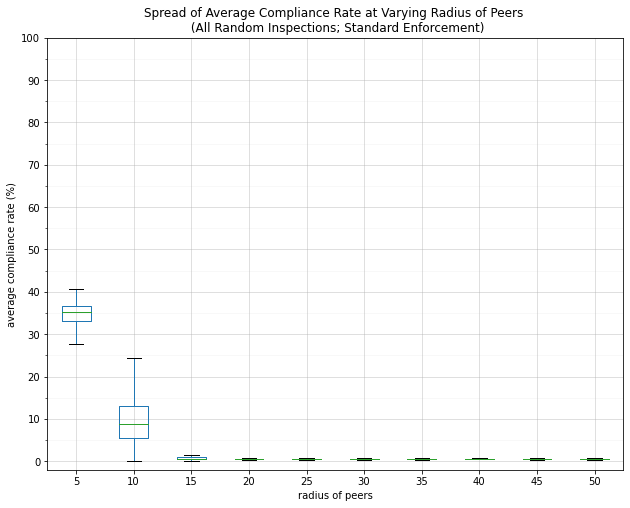

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
rand_standard_radius_df.boxplot(column='avg-compliance-rate',by='radius', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Radius of Peers \n (All Random Inspections; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('radius of peers')
plt.grid(True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Radius Boxplot Standard.png', dpi=300, bbox_inches='tight')

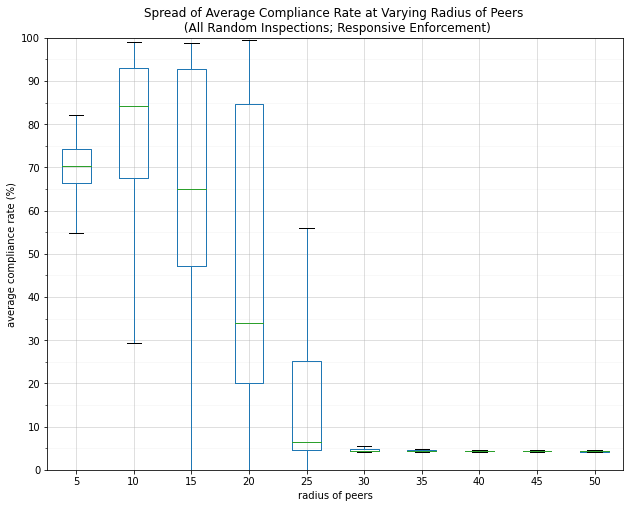

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')  # turns off automatical subtitles
rand_resp_radius_df.boxplot(column='avg-compliance-rate',by='radius', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Radius of Peers \n (All Random Inspections; Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('radius of peers')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Radius Boxplot Responsive.png', dpi=300, bbox_inches='tight')

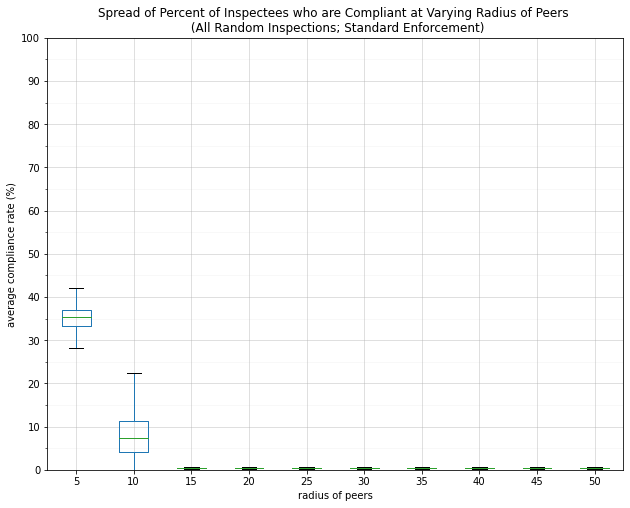

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
rand_standard_radius_df.boxplot(column='perc-compliant',by='radius', ax=ax,showfliers=False)
plt.title('Spread of Percent of Inspectees who are Compliant at Varying Radius of Peers \n (All Random Inspections; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('radius of peers')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Radius Boxplot Standard Perc Compliant.png', dpi=300, bbox_inches='tight')

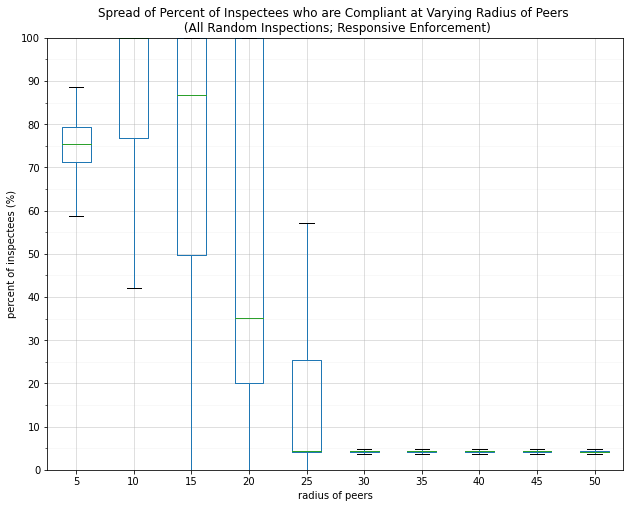

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
rand_resp_radius_df.boxplot(column='perc-compliant',by='radius', ax=ax,showfliers=False)
plt.title('Spread of Percent of Inspectees who are Compliant at Varying Radius of Peers \n (All Random Inspections; Responsive Enforcement)')
plt.ylabel('percent of inspectees (%)')
plt.xlabel('radius of peers')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Radius Boxplot Responsive Perc Compliant.png', dpi=300, bbox_inches='tight')

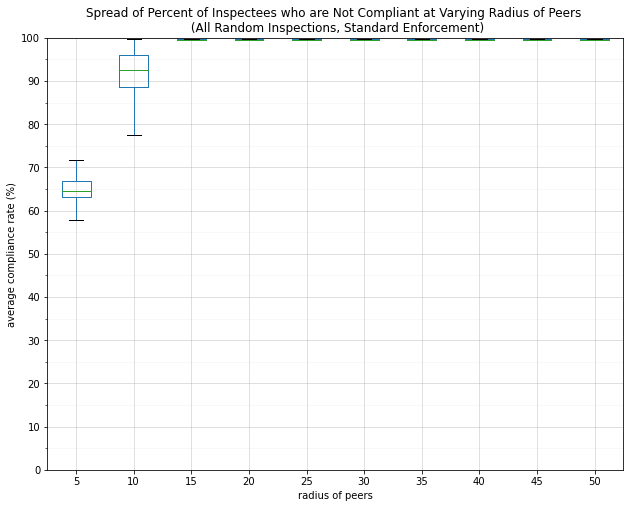

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
rand_standard_radius_df.boxplot(column='perc-noncompliant',by='radius', ax=ax,showfliers=False)
plt.title('Spread of Percent of Inspectees who are Not Compliant at Varying Radius of Peers \n (All Random Inspections, Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('radius of peers')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Radius Boxplot Standard Perc Not Compliant.png', dpi=300, bbox_inches='tight')

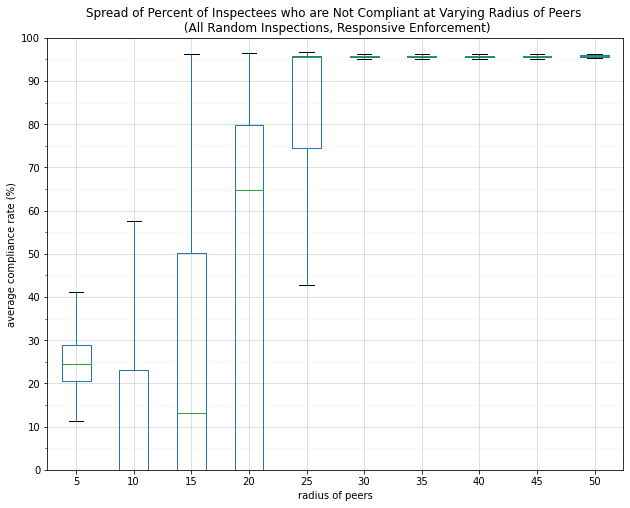

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
rand_resp_radius_df.boxplot(column='perc-noncompliant',by='radius', ax=ax,showfliers=False)
plt.title('Spread of Percent of Inspectees who are Not Compliant at Varying Radius of Peers \n (All Random Inspections, Responsive Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('radius of peers')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Radius Boxplot Responsive Perc Not Compliant.png', dpi=300, bbox_inches='tight')

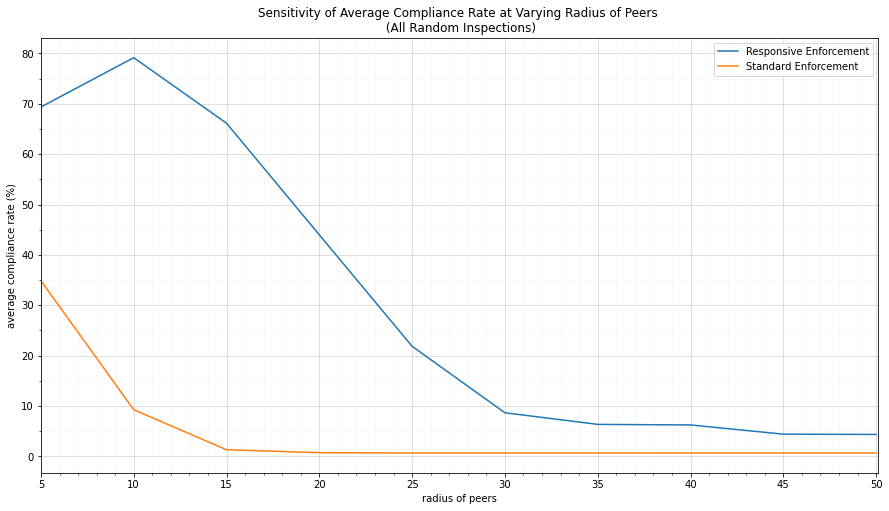

<Figure size 432x288 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(5, 51, 5))
ax.set_xticks(np.arange(5, 51, 1), minor=True)
ax.set_yticks(np.arange(0,100,10))
ax.set_yticks(np.arange(0,100,5), minor=True)

ax.plot(aggregate_summary_resp_avg['radius'], aggregate_summary_resp_avg['avg-compliance-rate-mean'],label="Responsive Enforcement")
ax.plot(aggregate_summary_standard_avg['radius'], aggregate_summary_standard_avg['avg-compliance-rate-mean'],label="Standard Enforcement")

plt.title("Sensitivity of Average Compliance Rate at Varying Radius of Peers \n (All Random Inspections)")
plt.xlabel('radius of peers')
plt.ylabel('average compliance rate (%)')

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.xlim(5,50.1)
plt.legend()
plt.show()
plt.savefig('Radius vs. Avg Compliance Rate (Random).png', dpi=300, bbox_inches='tight')

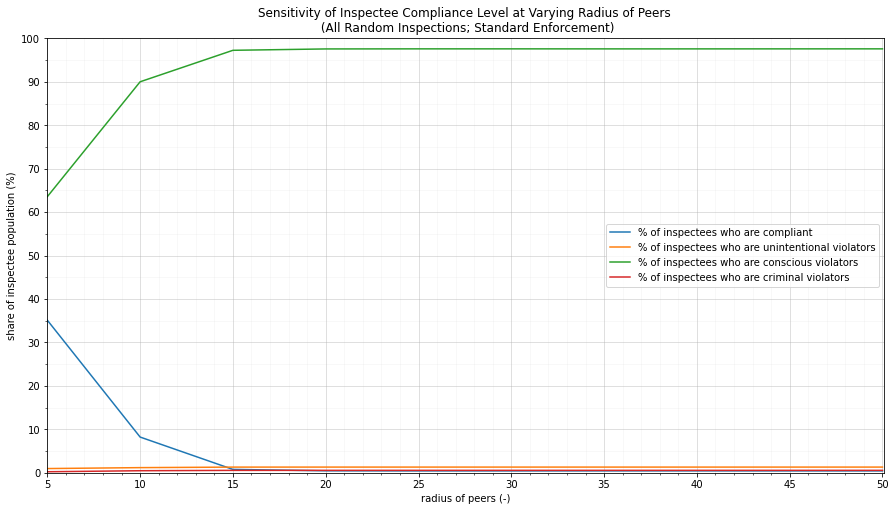

<Figure size 432x288 with 0 Axes>

In [29]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(5, 51, 5))
ax.set_xticks(np.arange(5, 51, 1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

ax.plot(aggregate_summary_standard_avg['radius'], aggregate_summary_standard_avg['perc-compliant-mean'],label="% of inspectees who are compliant")
ax.plot(aggregate_summary_standard_avg['radius'], aggregate_summary_standard_avg['perc-unintentional-mean'],label="% of inspectees who are unintentional violators")
ax.plot(aggregate_summary_standard_avg['radius'], aggregate_summary_standard_avg['perc-conscious-mean'],label="% of inspectees who are conscious violators")
ax.plot(aggregate_summary_standard_avg['radius'], aggregate_summary_standard_avg['perc-criminal-mean'],label="% of inspectees who are criminal violators")

plt.title("Sensitivity of Inspectee Compliance Level at Varying Radius of Peers \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('radius of peers (-)')
plt.ylabel('share of inspectee population (%)')

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.xlim(5,50.1)
plt.ylim(0,100.1)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Radius vs. Compliance Breakdown (Random, Standard).png', dpi=300, bbox_inches='tight')

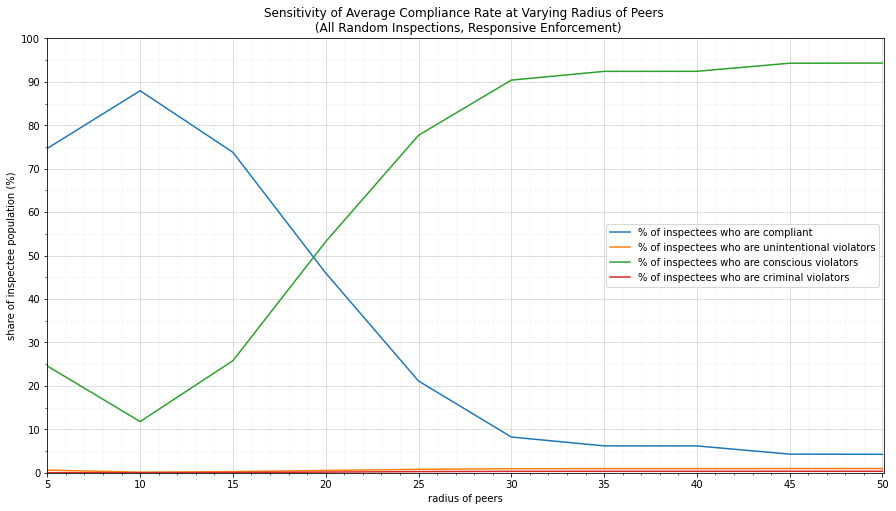

<Figure size 432x288 with 0 Axes>

In [30]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(5, 51, 5))
ax.set_xticks(np.arange(5, 51, 1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

ax.plot(aggregate_summary_resp_avg['radius'], aggregate_summary_resp_avg['perc-compliant-mean'],label="% of inspectees who are compliant")
ax.plot(aggregate_summary_resp_avg['radius'], aggregate_summary_resp_avg['perc-unintentional-mean'],label="% of inspectees who are unintentional violators")
ax.plot(aggregate_summary_resp_avg['radius'], aggregate_summary_resp_avg['perc-conscious-mean'],label="% of inspectees who are conscious violators")
ax.plot(aggregate_summary_resp_avg['radius'], aggregate_summary_resp_avg['perc-criminal-mean'],label="% of inspectees who are criminal violators")

plt.title("Sensitivity of Average Compliance Rate at Varying Radius of Peers \n (All Random Inspections, Responsive Enforcement)")
plt.xlabel('radius of peers')
plt.ylabel('share of inspectee population (%)')

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.xlim(5,50.1)
plt.ylim(0,100.1)
plt.legend()
plt.show()
plt.savefig('Radius vs. Compliance Breakdown (Random, Responsive).png', dpi=300, bbox_inches='tight')

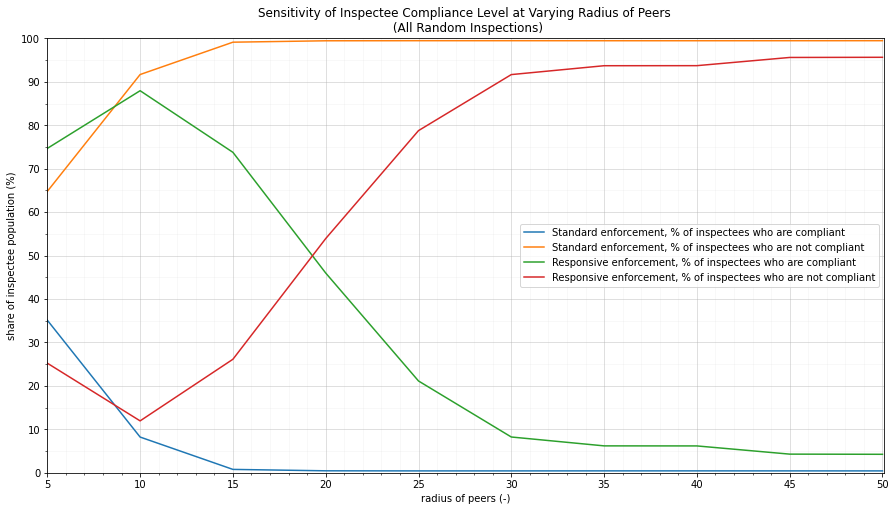

<Figure size 432x288 with 0 Axes>

In [31]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(5, 51, 5))
ax.set_xticks(np.arange(5, 51, 1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

ax.plot(aggregate_summary_standard_avg['radius'], aggregate_summary_standard_avg['perc-compliant-mean'],label="Standard enforcement, % of inspectees who are compliant")
ax.plot(aggregate_summary_standard_avg['radius'], aggregate_summary_standard_avg['perc-noncompliant-mean'],label="Standard enforcement, % of inspectees who are not compliant")
ax.plot(aggregate_summary_resp_avg['radius'], aggregate_summary_resp_avg['perc-compliant-mean'],label="Responsive enforcement, % of inspectees who are compliant")
ax.plot(aggregate_summary_resp_avg['radius'], aggregate_summary_resp_avg['perc-noncompliant-mean'],label="Responsive enforcement, % of inspectees who are not compliant")

plt.title("Sensitivity of Inspectee Compliance Level at Varying Radius of Peers \n (All Random Inspections)")
plt.xlabel('radius of peers (-)')
plt.ylabel('share of inspectee population (%)')

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.xlim(5,50.1)
plt.ylim(0,100.1)
plt.legend()
plt.show()
plt.savefig('Radius vs. Compliance Breakdown (Random, Both).png', dpi=300, bbox_inches='tight')

### Group data and find mean across all runs

In [32]:
# Create new dataframes by compliant share value
for i, x in rand_resp_radius_df.groupby('radius'):
    globals()['rand_resp_radius_' + str(i)] = x

# Create new dataframes by compliant share value
for i, x in rand_standard_radius_df.groupby('radius'):
    globals()['rand_standard_radius_' + str(i)] = x

In [33]:
rand_resp_radius_5

run  run_num  radius  step  avg-compliance-rate  \
0        1        1       5     0             0.000000   
1        1        1       5     1             6.422950   
2        1        1       5     2            12.820513   
3        1        1       5     3            18.807650   
4        1        1       5     4            23.875561   
...    ...      ...     ...   ...                  ...   
50045  347       50       5   996            79.753743   
50046  347       50       5   997            79.757769   
50047  347       50       5   998            79.761212   
50048  347       50       5   999            79.764743   
50049  347       50       5  1000            79.768419   

       #-compliant-inspectees  #-unintentional-violators  \
0                           0                          0   
1                        3119                        989   
2                        3537                        545   
3                        3852                        225   
4                        3992                        164   
...                       ...                        ...   
50045                    6569                         19   
50046                    6576                         14   
50047                    6569                         11   
50048                    6575                         15   
50049                    6580                         17   

       #-conscious-violators  #-criminal-violators  total-inspectees  \
0                          0                     0                 0   
1                       3635                   133              7876   
2                       3792                     4              7878   
3                       3793                     8              7878   
4                       3714                     8              7878   
...                      ...                   ...               ...   
50045                   1288                     2              7878   
50046                   1287                     1              7878   
50047                   1298                     0              7878   
50048                   1286                     2              7878   
50049                   1280                     1              7878   

       perc-compliant  perc-unintentional  perc-conscious  perc-criminal  \
0            0.000000            0.000000        0.000000       0.000000   
1           39.601320           12.557136       46.152869       1.688674   
2           44.897182            6.917999       48.134044       0.050774   
3           48.895659            2.856055       48.146738       0.101549   
4           50.672760            2.081747       47.143945       0.101549   
...               ...                 ...             ...            ...   
50045       83.384108            0.241178       16.349327       0.025387   
50046       83.472963            0.177710       16.336634       0.012694   
50047       83.384108            0.139629       16.476263       0.000000   
50048       83.460269            0.190404       16.323940       0.025387   
50049       83.523737            0.215791       16.247779       0.012694   

       perc-noncompliant  
0               0.000000  
1              60.398680  
2              55.102818  
3              51.104341  
4              49.327240  
...                  ...  
50045          16.615892  
50046          16.527037  
50047          16.615892  
50048          16.539731  
50049          16.476263  

[50050 rows x 15 columns]

In [34]:
rand_resp_radius_5_step = rand_resp_radius_5.groupby(['step'], as_index=False).mean()
rand_resp_radius_10_step = rand_resp_radius_10.groupby(['step'], as_index=False).mean()
rand_resp_radius_15_step = rand_resp_radius_15.groupby(['step'], as_index=False).mean()
rand_resp_radius_20_step = rand_resp_radius_20.groupby(['step'], as_index=False).mean()
rand_resp_radius_25_step = rand_resp_radius_25.groupby(['step'], as_index=False).mean()
rand_resp_radius_30_step = rand_resp_radius_30.groupby(['step'], as_index=False).mean()
rand_resp_radius_35_step = rand_resp_radius_35.groupby(['step'], as_index=False).mean()
rand_resp_radius_40_step = rand_resp_radius_40.groupby(['step'], as_index=False).mean()
rand_resp_radius_45_step = rand_resp_radius_45.groupby(['step'], as_index=False).mean()
rand_resp_radius_50_step = rand_resp_radius_50.groupby(['step'], as_index=False).mean()

In [35]:
rand_standard_radius_5_step = rand_standard_radius_5.groupby(['step'], as_index=False).mean()
rand_standard_radius_10_step = rand_standard_radius_10.groupby(['step'], as_index=False).mean()
rand_standard_radius_15_step = rand_standard_radius_15.groupby(['step'], as_index=False).mean()
rand_standard_radius_20_step = rand_standard_radius_20.groupby(['step'], as_index=False).mean()
rand_standard_radius_25_step = rand_standard_radius_25.groupby(['step'], as_index=False).mean()
rand_standard_radius_30_step = rand_standard_radius_30.groupby(['step'], as_index=False).mean()
rand_standard_radius_35_step = rand_standard_radius_35.groupby(['step'], as_index=False).mean()
rand_standard_radius_40_step = rand_standard_radius_40.groupby(['step'], as_index=False).mean()
rand_standard_radius_45_step = rand_standard_radius_45.groupby(['step'], as_index=False).mean()
rand_standard_radius_50_step = rand_standard_radius_50.groupby(['step'], as_index=False).mean()

### Standard Enforcement

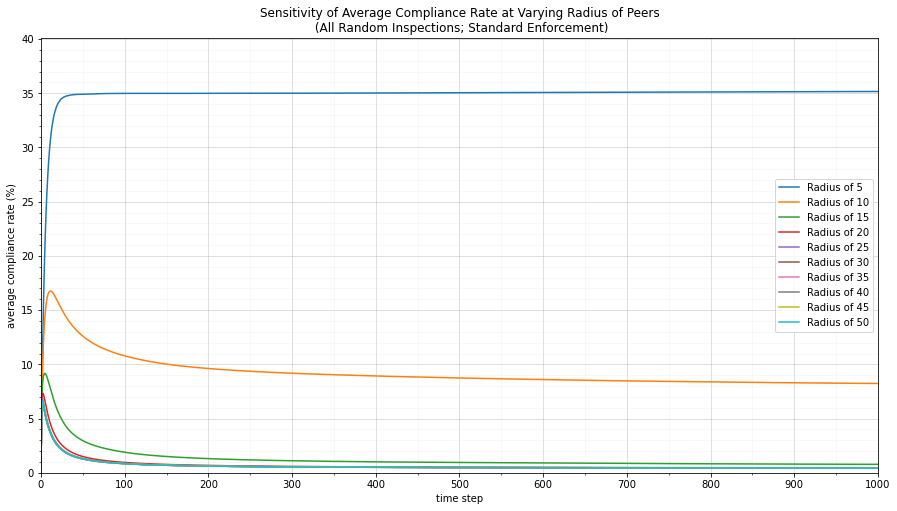

<Figure size 432x288 with 0 Axes>

In [37]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,5))
ax.set_yticks(np.arange(0,100.1,1), minor=True)

plt.plot(rand_standard_radius_5_step['step'], rand_standard_radius_5_step['avg-compliance-rate'], label="Radius of 5")
plt.plot(rand_standard_radius_10_step['step'], rand_standard_radius_10_step['avg-compliance-rate'], label="Radius of 10")
plt.plot(rand_standard_radius_15_step['step'], rand_standard_radius_15_step['avg-compliance-rate'], label="Radius of 15")
plt.plot(rand_standard_radius_20_step['step'], rand_standard_radius_20_step['avg-compliance-rate'], label="Radius of 20")
plt.plot(rand_standard_radius_25_step['step'], rand_standard_radius_25_step['avg-compliance-rate'], label="Radius of 25")
plt.plot(rand_standard_radius_30_step['step'], rand_standard_radius_30_step['avg-compliance-rate'], label="Radius of 30")
plt.plot(rand_standard_radius_35_step['step'], rand_standard_radius_35_step['avg-compliance-rate'], label="Radius of 35")
plt.plot(rand_standard_radius_40_step['step'], rand_standard_radius_40_step['avg-compliance-rate'], label="Radius of 40")
plt.plot(rand_standard_radius_45_step['step'], rand_standard_radius_45_step['avg-compliance-rate'], label="Radius of 45")
plt.plot(rand_standard_radius_50_step['step'], rand_standard_radius_50_step['avg-compliance-rate'], label="Radius of 50")

plt.title("Sensitivity of Average Compliance Rate at Varying Radius of Peers\n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,40.1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('Radius- Time vs. Avg Compliance Rate (Random, Standard).png', dpi=300, bbox_inches='tight')

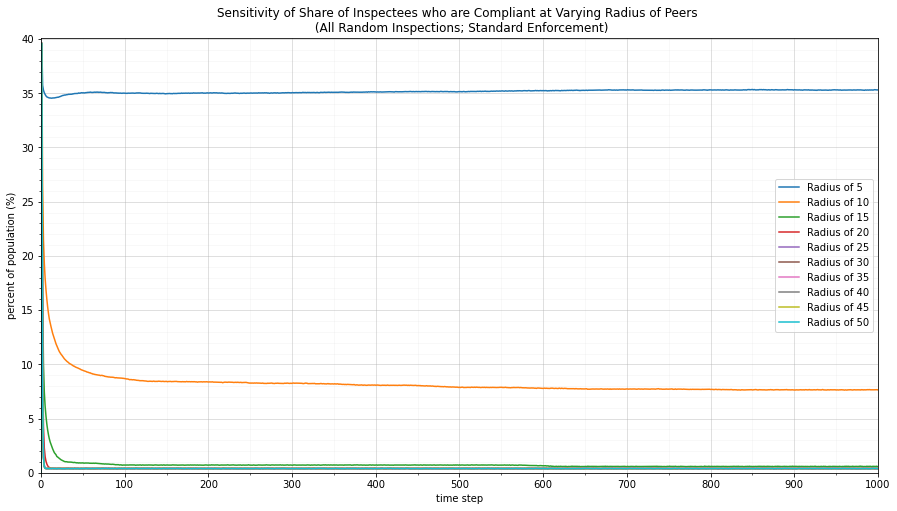

<Figure size 432x288 with 0 Axes>

In [39]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,5))
ax.set_yticks(np.arange(0,100.1,1), minor=True)

plt.plot(rand_standard_radius_5_step['step'], rand_standard_radius_5_step['perc-compliant'], label="Radius of 5")
plt.plot(rand_standard_radius_10_step['step'], rand_standard_radius_10_step['perc-compliant'], label="Radius of 10")
plt.plot(rand_standard_radius_15_step['step'], rand_standard_radius_15_step['perc-compliant'], label="Radius of 15")
plt.plot(rand_standard_radius_20_step['step'], rand_standard_radius_20_step['perc-compliant'], label="Radius of 20")
plt.plot(rand_standard_radius_25_step['step'], rand_standard_radius_25_step['perc-compliant'], label="Radius of 25")
plt.plot(rand_standard_radius_30_step['step'], rand_standard_radius_30_step['perc-compliant'], label="Radius of 30")
plt.plot(rand_standard_radius_35_step['step'], rand_standard_radius_35_step['perc-compliant'], label="Radius of 35")
plt.plot(rand_standard_radius_40_step['step'], rand_standard_radius_40_step['perc-compliant'], label="Radius of 40")
plt.plot(rand_standard_radius_45_step['step'], rand_standard_radius_45_step['perc-compliant'], label="Radius of 45")
plt.plot(rand_standard_radius_50_step['step'], rand_standard_radius_50_step['perc-compliant'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Compliant at Varying Radius of Peers \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,40.1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('Radius- Time vs. Compliant (Random, Standard).png', dpi=300, bbox_inches='tight')

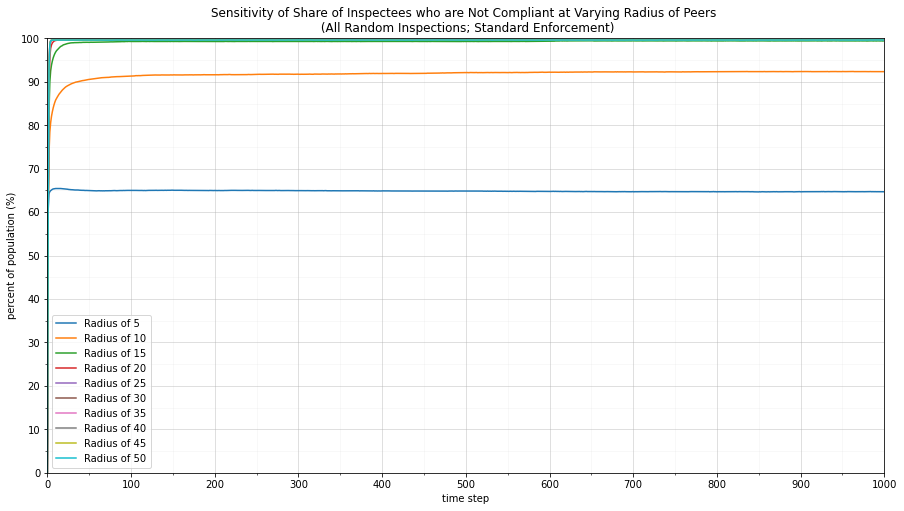

<Figure size 432x288 with 0 Axes>

In [40]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_standard_radius_5_step['step'], rand_standard_radius_5_step['perc-noncompliant'], label="Radius of 5")
plt.plot(rand_standard_radius_10_step['step'], rand_standard_radius_10_step['perc-noncompliant'], label="Radius of 10")
plt.plot(rand_standard_radius_15_step['step'], rand_standard_radius_15_step['perc-noncompliant'], label="Radius of 15")
plt.plot(rand_standard_radius_20_step['step'], rand_standard_radius_20_step['perc-noncompliant'], label="Radius of 20")
plt.plot(rand_standard_radius_25_step['step'], rand_standard_radius_25_step['perc-noncompliant'], label="Radius of 25")
plt.plot(rand_standard_radius_30_step['step'], rand_standard_radius_30_step['perc-noncompliant'], label="Radius of 30")
plt.plot(rand_standard_radius_35_step['step'], rand_standard_radius_35_step['perc-noncompliant'], label="Radius of 35")
plt.plot(rand_standard_radius_40_step['step'], rand_standard_radius_40_step['perc-noncompliant'], label="Radius of 40")
plt.plot(rand_standard_radius_45_step['step'], rand_standard_radius_45_step['perc-noncompliant'], label="Radius of 45")
plt.plot(rand_standard_radius_50_step['step'], rand_standard_radius_50_step['perc-noncompliant'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Not Compliant at Varying Radius of Peers \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('Radius- Time vs. Non Compliant (Random, Standard).png', dpi=300, bbox_inches='tight')

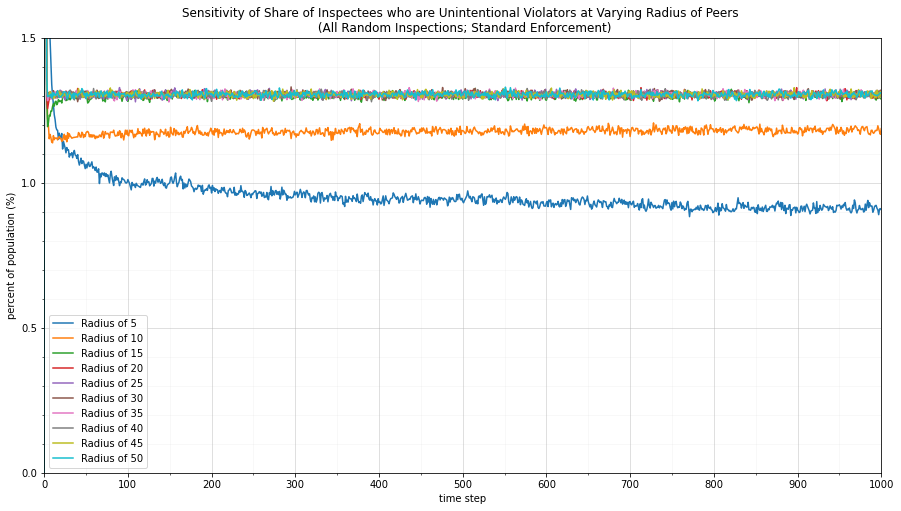

<Figure size 432x288 with 0 Axes>

In [41]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,2.01,.5))
ax.set_yticks(np.arange(0,2.01,.1), minor=True)

plt.plot(rand_standard_radius_5_step['step'], rand_standard_radius_5_step['perc-unintentional'], label="Radius of 5")
plt.plot(rand_standard_radius_10_step['step'], rand_standard_radius_10_step['perc-unintentional'], label="Radius of 10")
plt.plot(rand_standard_radius_15_step['step'], rand_standard_radius_15_step['perc-unintentional'], label="Radius of 15")
plt.plot(rand_standard_radius_20_step['step'], rand_standard_radius_20_step['perc-unintentional'], label="Radius of 20")
plt.plot(rand_standard_radius_25_step['step'], rand_standard_radius_25_step['perc-unintentional'], label="Radius of 25")
plt.plot(rand_standard_radius_30_step['step'], rand_standard_radius_30_step['perc-unintentional'], label="Radius of 30")
plt.plot(rand_standard_radius_35_step['step'], rand_standard_radius_35_step['perc-unintentional'], label="Radius of 35")
plt.plot(rand_standard_radius_40_step['step'], rand_standard_radius_40_step['perc-unintentional'], label="Radius of 40")
plt.plot(rand_standard_radius_45_step['step'], rand_standard_radius_45_step['perc-unintentional'], label="Radius of 45")
plt.plot(rand_standard_radius_50_step['step'], rand_standard_radius_50_step['perc-unintentional'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Unintentional Violators at Varying Radius of Peers \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.5)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('Radius- Time vs. Unintentional (Random, Standard).png', dpi=300, bbox_inches='tight')

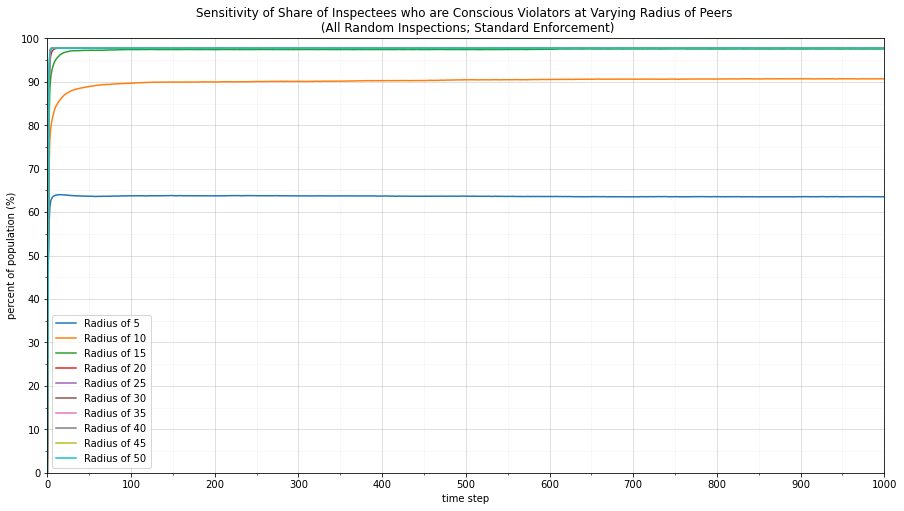

<Figure size 432x288 with 0 Axes>

In [42]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_standard_radius_5_step['step'], rand_standard_radius_5_step['perc-conscious'], label="Radius of 5")
plt.plot(rand_standard_radius_10_step['step'], rand_standard_radius_10_step['perc-conscious'], label="Radius of 10")
plt.plot(rand_standard_radius_15_step['step'], rand_standard_radius_15_step['perc-conscious'], label="Radius of 15")
plt.plot(rand_standard_radius_20_step['step'], rand_standard_radius_20_step['perc-conscious'], label="Radius of 20")
plt.plot(rand_standard_radius_25_step['step'], rand_standard_radius_25_step['perc-conscious'], label="Radius of 25")
plt.plot(rand_standard_radius_30_step['step'], rand_standard_radius_30_step['perc-conscious'], label="Radius of 30")
plt.plot(rand_standard_radius_35_step['step'], rand_standard_radius_35_step['perc-conscious'], label="Radius of 35")
plt.plot(rand_standard_radius_40_step['step'], rand_standard_radius_40_step['perc-conscious'], label="Radius of 40")
plt.plot(rand_standard_radius_45_step['step'], rand_standard_radius_45_step['perc-conscious'], label="Radius of 45")
plt.plot(rand_standard_radius_50_step['step'], rand_standard_radius_50_step['perc-conscious'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Conscious Violators at Varying Radius of Peers \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('Radius- Time vs. Conscious (Random, Standard).png', dpi=300, bbox_inches='tight')

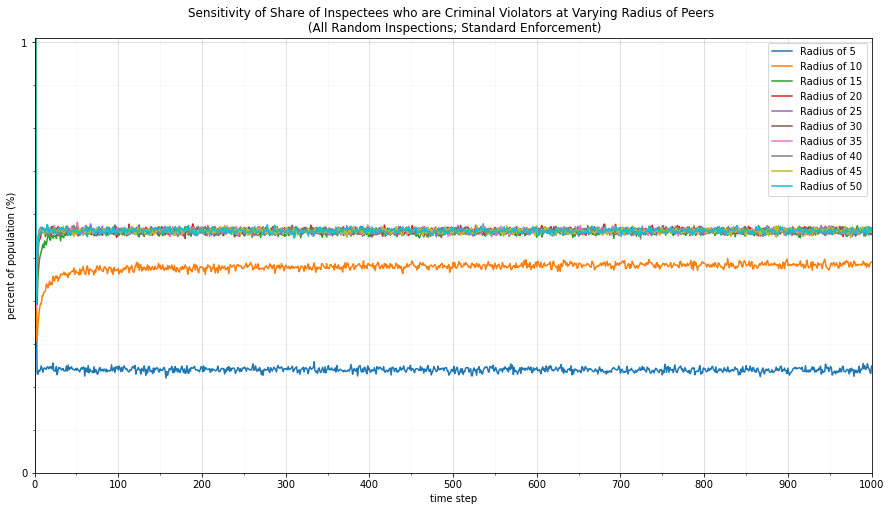

<Figure size 432x288 with 0 Axes>

In [43]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,1))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(rand_standard_radius_5_step['step'], rand_standard_radius_5_step['perc-criminal'], label="Radius of 5")
plt.plot(rand_standard_radius_10_step['step'], rand_standard_radius_10_step['perc-criminal'], label="Radius of 10")
plt.plot(rand_standard_radius_15_step['step'], rand_standard_radius_15_step['perc-criminal'], label="Radius of 15")
plt.plot(rand_standard_radius_20_step['step'], rand_standard_radius_20_step['perc-criminal'], label="Radius of 20")
plt.plot(rand_standard_radius_25_step['step'], rand_standard_radius_25_step['perc-criminal'], label="Radius of 25")
plt.plot(rand_standard_radius_30_step['step'], rand_standard_radius_30_step['perc-criminal'], label="Radius of 30")
plt.plot(rand_standard_radius_35_step['step'], rand_standard_radius_35_step['perc-criminal'], label="Radius of 35")
plt.plot(rand_standard_radius_40_step['step'], rand_standard_radius_40_step['perc-criminal'], label="Radius of 40")
plt.plot(rand_standard_radius_45_step['step'], rand_standard_radius_45_step['perc-criminal'], label="Radius of 45")
plt.plot(rand_standard_radius_50_step['step'], rand_standard_radius_50_step['perc-criminal'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Criminal Violators at Varying Radius of Peers \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.legend()
plt.show()
plt.savefig('Radius- Time vs. Criminal (Random, Standard).png', dpi=300, bbox_inches='tight')

### Responsive Enforcement

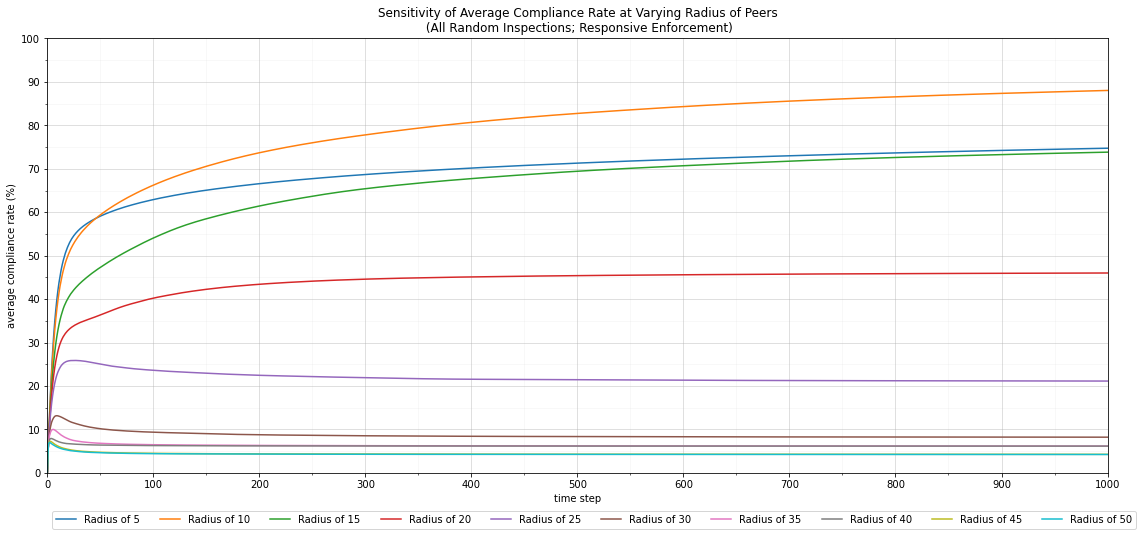

<Figure size 432x288 with 0 Axes>

In [44]:
fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_5_step['step'], rand_resp_radius_5_step['avg-compliance-rate'], label="Radius of 5")
plt.plot(rand_resp_radius_10_step['step'], rand_resp_radius_10_step['avg-compliance-rate'], label="Radius of 10")
plt.plot(rand_resp_radius_15_step['step'], rand_resp_radius_15_step['avg-compliance-rate'], label="Radius of 15")
plt.plot(rand_resp_radius_20_step['step'], rand_resp_radius_20_step['avg-compliance-rate'], label="Radius of 20")
plt.plot(rand_resp_radius_25_step['step'], rand_resp_radius_25_step['avg-compliance-rate'], label="Radius of 25")
plt.plot(rand_resp_radius_30_step['step'], rand_resp_radius_30_step['avg-compliance-rate'], label="Radius of 30")
plt.plot(rand_resp_radius_35_step['step'], rand_resp_radius_35_step['avg-compliance-rate'], label="Radius of 35")
plt.plot(rand_resp_radius_40_step['step'], rand_resp_radius_40_step['avg-compliance-rate'], label="Radius of 40")
plt.plot(rand_resp_radius_45_step['step'], rand_resp_radius_45_step['avg-compliance-rate'], label="Radius of 45")
plt.plot(rand_resp_radius_50_step['step'], rand_resp_radius_50_step['avg-compliance-rate'], label="Radius of 50")

plt.title("Sensitivity of Average Compliance Rate at Varying Radius of Peers\n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Radius- Time vs. Avg Compliance Rate (Random, Responsive).png', dpi=300, bbox_inches='tight')

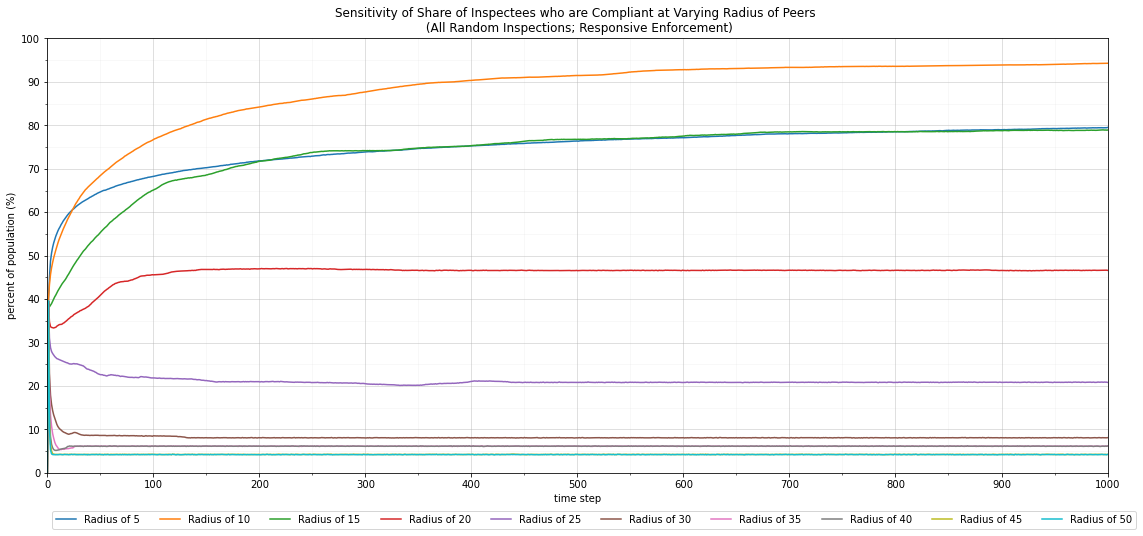

<Figure size 432x288 with 0 Axes>

In [45]:
fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_5_step['step'], rand_resp_radius_5_step['perc-compliant'], label="Radius of 5")
plt.plot(rand_resp_radius_10_step['step'], rand_resp_radius_10_step['perc-compliant'], label="Radius of 10")
plt.plot(rand_resp_radius_15_step['step'], rand_resp_radius_15_step['perc-compliant'], label="Radius of 15")
plt.plot(rand_resp_radius_20_step['step'], rand_resp_radius_20_step['perc-compliant'], label="Radius of 20")
plt.plot(rand_resp_radius_25_step['step'], rand_resp_radius_25_step['perc-compliant'], label="Radius of 25")
plt.plot(rand_resp_radius_30_step['step'], rand_resp_radius_30_step['perc-compliant'], label="Radius of 30")
plt.plot(rand_resp_radius_35_step['step'], rand_resp_radius_35_step['perc-compliant'], label="Radius of 35")
plt.plot(rand_resp_radius_40_step['step'], rand_resp_radius_40_step['perc-compliant'], label="Radius of 40")
plt.plot(rand_resp_radius_45_step['step'], rand_resp_radius_45_step['perc-compliant'], label="Radius of 45")
plt.plot(rand_resp_radius_50_step['step'], rand_resp_radius_50_step['perc-compliant'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Compliant at Varying Radius of Peers \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Radius- Time vs. Compliant (Random, Responsive).png', dpi=300, bbox_inches='tight')

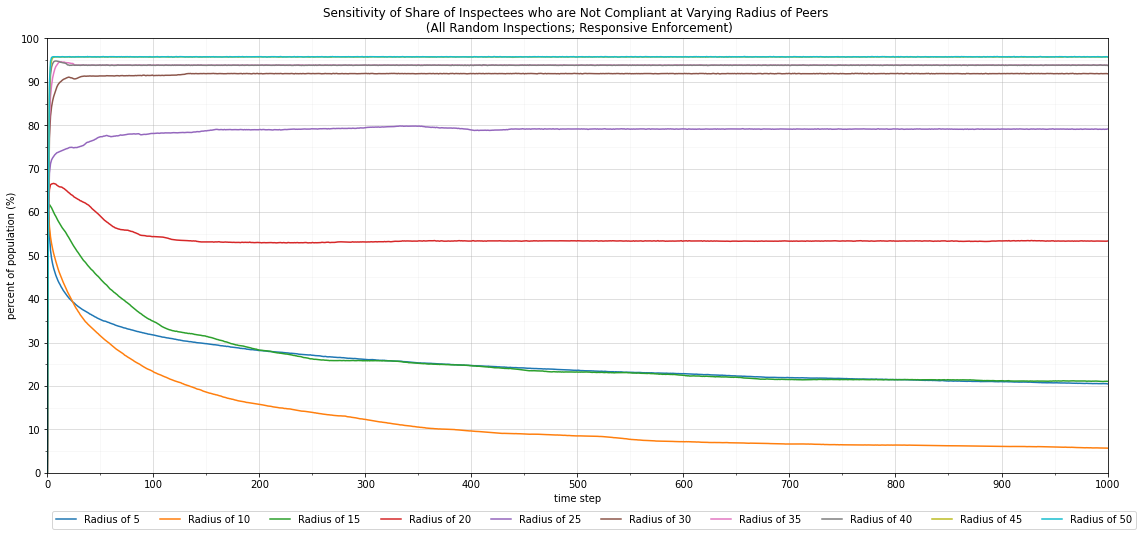

<Figure size 432x288 with 0 Axes>

In [46]:
fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_5_step['step'], rand_resp_radius_5_step['perc-noncompliant'], label="Radius of 5")
plt.plot(rand_resp_radius_10_step['step'], rand_resp_radius_10_step['perc-noncompliant'], label="Radius of 10")
plt.plot(rand_resp_radius_15_step['step'], rand_resp_radius_15_step['perc-noncompliant'], label="Radius of 15")
plt.plot(rand_resp_radius_20_step['step'], rand_resp_radius_20_step['perc-noncompliant'], label="Radius of 20")
plt.plot(rand_resp_radius_25_step['step'], rand_resp_radius_25_step['perc-noncompliant'], label="Radius of 25")
plt.plot(rand_resp_radius_30_step['step'], rand_resp_radius_30_step['perc-noncompliant'], label="Radius of 30")
plt.plot(rand_resp_radius_35_step['step'], rand_resp_radius_35_step['perc-noncompliant'], label="Radius of 35")
plt.plot(rand_resp_radius_40_step['step'], rand_resp_radius_40_step['perc-noncompliant'], label="Radius of 40")
plt.plot(rand_resp_radius_45_step['step'], rand_resp_radius_45_step['perc-noncompliant'], label="Radius of 45")
plt.plot(rand_resp_radius_50_step['step'], rand_resp_radius_50_step['perc-noncompliant'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Not Compliant at Varying Radius of Peers \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Radius- Time vs. Non Compliant (Random, Responsive).png', dpi=300, bbox_inches='tight')

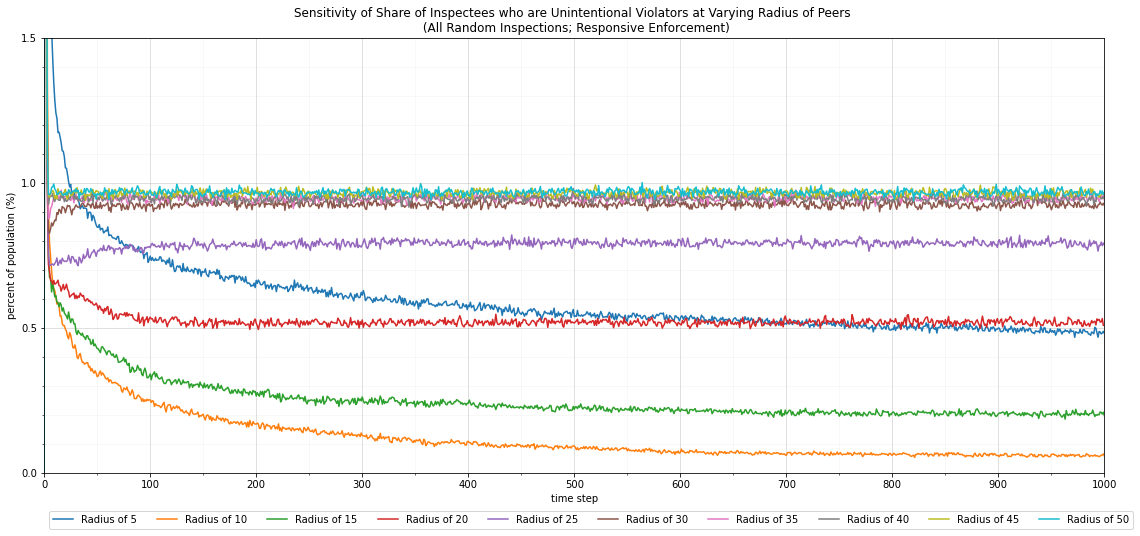

<Figure size 432x288 with 0 Axes>

In [50]:
fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,2.01,.5))
ax.set_yticks(np.arange(0,2.01,.1), minor=True)

plt.plot(rand_resp_radius_5_step['step'], rand_resp_radius_5_step['perc-unintentional'], label="Radius of 5")
plt.plot(rand_resp_radius_10_step['step'], rand_resp_radius_10_step['perc-unintentional'], label="Radius of 10")
plt.plot(rand_resp_radius_15_step['step'], rand_resp_radius_15_step['perc-unintentional'], label="Radius of 15")
plt.plot(rand_resp_radius_20_step['step'], rand_resp_radius_20_step['perc-unintentional'], label="Radius of 20")
plt.plot(rand_resp_radius_25_step['step'], rand_resp_radius_25_step['perc-unintentional'], label="Radius of 25")
plt.plot(rand_resp_radius_30_step['step'], rand_resp_radius_30_step['perc-unintentional'], label="Radius of 30")
plt.plot(rand_resp_radius_35_step['step'], rand_resp_radius_35_step['perc-unintentional'], label="Radius of 35")
plt.plot(rand_resp_radius_40_step['step'], rand_resp_radius_40_step['perc-unintentional'], label="Radius of 40")
plt.plot(rand_resp_radius_45_step['step'], rand_resp_radius_45_step['perc-unintentional'], label="Radius of 45")
plt.plot(rand_resp_radius_50_step['step'], rand_resp_radius_50_step['perc-unintentional'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Unintentional Violators at Varying Radius of Peers \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.5)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Radius- Time vs. Unintentional (Random, Responsive).png', dpi=300, bbox_inches='tight')

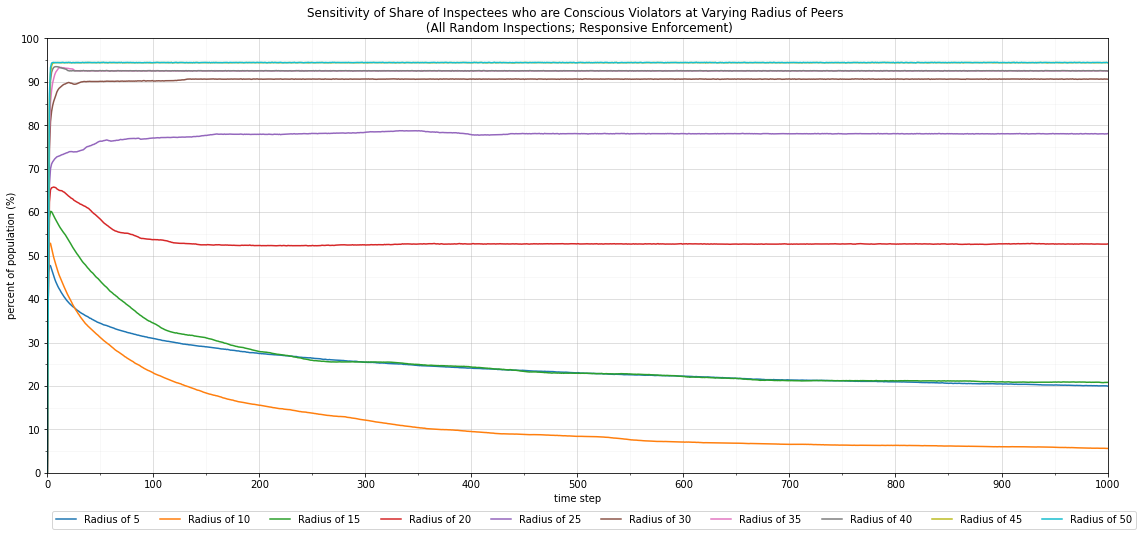

<Figure size 432x288 with 0 Axes>

In [51]:
fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_5_step['step'], rand_resp_radius_5_step['perc-conscious'], label="Radius of 5")
plt.plot(rand_resp_radius_10_step['step'], rand_resp_radius_10_step['perc-conscious'], label="Radius of 10")
plt.plot(rand_resp_radius_15_step['step'], rand_resp_radius_15_step['perc-conscious'], label="Radius of 15")
plt.plot(rand_resp_radius_20_step['step'], rand_resp_radius_20_step['perc-conscious'], label="Radius of 20")
plt.plot(rand_resp_radius_25_step['step'], rand_resp_radius_25_step['perc-conscious'], label="Radius of 25")
plt.plot(rand_resp_radius_30_step['step'], rand_resp_radius_30_step['perc-conscious'], label="Radius of 30")
plt.plot(rand_resp_radius_35_step['step'], rand_resp_radius_35_step['perc-conscious'], label="Radius of 35")
plt.plot(rand_resp_radius_40_step['step'], rand_resp_radius_40_step['perc-conscious'], label="Radius of 40")
plt.plot(rand_resp_radius_45_step['step'], rand_resp_radius_45_step['perc-conscious'], label="Radius of 45")
plt.plot(rand_resp_radius_50_step['step'], rand_resp_radius_50_step['perc-conscious'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Conscious Violators at Varying Radius of Peers \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="lower left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Radius- Time vs. Conscious (Random, Responsive).png', dpi=300, bbox_inches='tight')

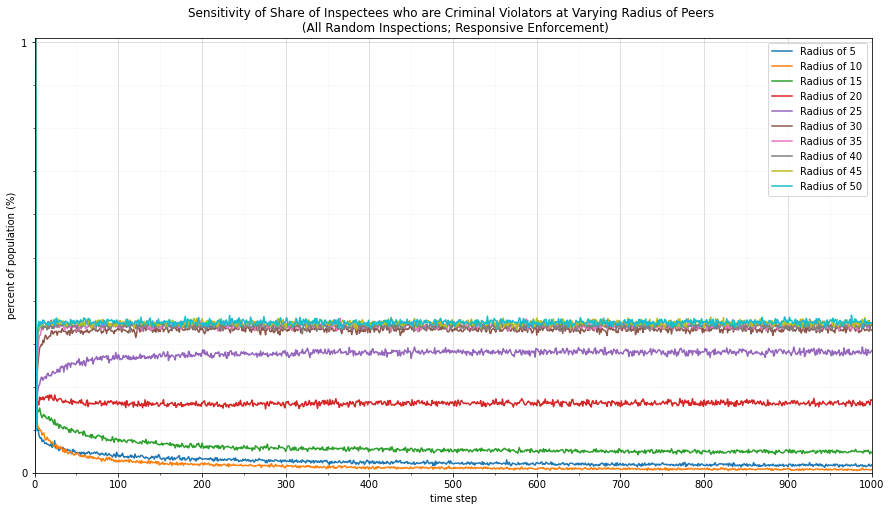

<Figure size 432x288 with 0 Axes>

In [52]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,1))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(rand_resp_radius_5_step['step'], rand_resp_radius_5_step['perc-criminal'], label="Radius of 5")
plt.plot(rand_resp_radius_10_step['step'], rand_resp_radius_10_step['perc-criminal'], label="Radius of 10")
plt.plot(rand_resp_radius_15_step['step'], rand_resp_radius_15_step['perc-criminal'], label="Radius of 15")
plt.plot(rand_resp_radius_20_step['step'], rand_resp_radius_20_step['perc-criminal'], label="Radius of 20")
plt.plot(rand_resp_radius_25_step['step'], rand_resp_radius_25_step['perc-criminal'], label="Radius of 25")
plt.plot(rand_resp_radius_30_step['step'], rand_resp_radius_30_step['perc-criminal'], label="Radius of 30")
plt.plot(rand_resp_radius_35_step['step'], rand_resp_radius_35_step['perc-criminal'], label="Radius of 35")
plt.plot(rand_resp_radius_40_step['step'], rand_resp_radius_40_step['perc-criminal'], label="Radius of 40")
plt.plot(rand_resp_radius_45_step['step'], rand_resp_radius_45_step['perc-criminal'], label="Radius of 45")
plt.plot(rand_resp_radius_50_step['step'], rand_resp_radius_50_step['perc-criminal'], label="Radius of 50")

plt.title("Sensitivity of Share of Inspectees who are Criminal Violators at Varying Radius of Peers \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of population (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.legend()
plt.show()
plt.savefig('Radius- Time vs. Criminal (Random, Responsive).png', dpi=300, bbox_inches='tight')

### Plot each run

In [54]:
# Create new dataframes by run
for i, x in rand_resp_radius_5.groupby('run_num'):
    globals()['rand_resp_radius_5_' + str(i)] = x

for i, x in rand_resp_radius_10.groupby('run_num'):
    globals()['rand_resp_radius_10_' + str(i)] = x

for i, x in rand_resp_radius_15.groupby('run_num'):
    globals()['rand_resp_radius_15_' + str(i)] = x
    
for i, x in rand_resp_radius_20.groupby('run_num'):
    globals()['rand_resp_radius_20_' + str(i)] = x

for i, x in rand_resp_radius_25.groupby('run_num'):
    globals()['rand_resp_radius_25_' + str(i)] = x

for i, x in rand_resp_radius_30.groupby('run_num'):
    globals()['rand_resp_radius_30_' + str(i)] = x

for i, x in rand_resp_radius_35.groupby('run_num'):
    globals()['rand_resp_radius_35_' + str(i)] = x

for i, x in rand_resp_radius_40.groupby('run_num'):
    globals()['rand_resp_radius_40_' + str(i)] = x
    
for i, x in rand_resp_radius_45.groupby('run_num'):
    globals()['rand_resp_radius_45_' + str(i)] = x

for i, x in rand_resp_radius_50.groupby('run_num'):
    globals()['rand_resp_radius_50_' + str(i)] = x

In [55]:
# Create new dataframes by run
for i, x in rand_standard_radius_5.groupby('run_num'):
    globals()['rand_standard_radius_5_' + str(i)] = x

for i, x in rand_standard_radius_10.groupby('run_num'):
    globals()['rand_standard_radius_10_' + str(i)] = x

for i, x in rand_standard_radius_15.groupby('run_num'):
    globals()['rand_standard_radius_15_' + str(i)] = x
    
for i, x in rand_standard_radius_20.groupby('run_num'):
    globals()['rand_standard_radius_20_' + str(i)] = x

for i, x in rand_standard_radius_25.groupby('run_num'):
    globals()['rand_standard_radius_25_' + str(i)] = x

for i, x in rand_standard_radius_30.groupby('run_num'):
    globals()['rand_standard_radius_30_' + str(i)] = x

for i, x in rand_standard_radius_35.groupby('run_num'):
    globals()['rand_standard_radius_35_' + str(i)] = x

for i, x in rand_standard_radius_40.groupby('run_num'):
    globals()['rand_standard_radius_40_' + str(i)] = x
    
for i, x in rand_standard_radius_45.groupby('run_num'):
    globals()['rand_standard_radius_45_' + str(i)] = x

for i, x in rand_standard_radius_50.groupby('run_num'):
    globals()['rand_standard_radius_50_' + str(i)] = x

In [ ]:
radius5_standard = rand_standard_radius_df.query("radius==5")
radius10_standard = rand_standard_radius_df.query("radius==10")
radius15_standard = rand_standard_radius_df.query("radius==15")
radius20_standard = rand_standard_radius_df.query("radius==20")
radius25_standard = rand_standard_radius_df.query("radius==25")
radius30_standard = rand_standard_radius_df.query("radius==30")
radius35_standard = rand_standard_radius_df.query("radius==35")
radius40_standard = rand_standard_radius_df.query("radius==40")
radius45_standard = rand_standard_radius_df.query("radius==45")
radius50_standard = rand_standard_radius_df.query("radius==50")

radius5_standard.tail(5)

In [ ]:
radius50_standard_455

#### Radius of 5, Standard Enforcement

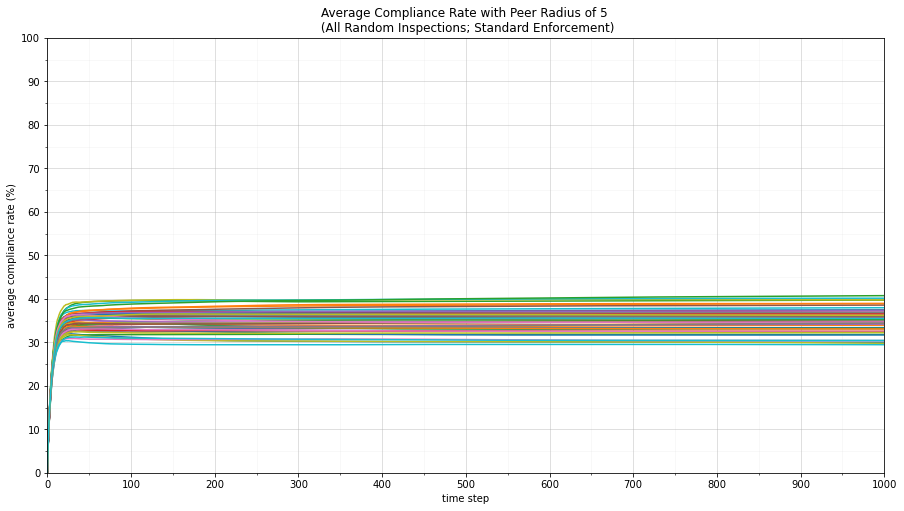

<Figure size 432x288 with 0 Axes>

In [60]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_standard_radius_5_1['step'],rand_standard_radius_5_1['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_2['step'],rand_standard_radius_5_2['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_3['step'],rand_standard_radius_5_3['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_4['step'],rand_standard_radius_5_4['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_5['step'],rand_standard_radius_5_5['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_6['step'],rand_standard_radius_5_6['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_7['step'],rand_standard_radius_5_7['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_8['step'],rand_standard_radius_5_8['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_9['step'],rand_standard_radius_5_9['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_10['step'],rand_standard_radius_5_10['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_11['step'],rand_standard_radius_5_11['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_12['step'],rand_standard_radius_5_12['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_13['step'],rand_standard_radius_5_13['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_14['step'],rand_standard_radius_5_14['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_15['step'],rand_standard_radius_5_15['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_16['step'],rand_standard_radius_5_16['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_17['step'],rand_standard_radius_5_17['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_18['step'],rand_standard_radius_5_18['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_19['step'],rand_standard_radius_5_19['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_20['step'],rand_standard_radius_5_20['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_21['step'],rand_standard_radius_5_21['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_22['step'],rand_standard_radius_5_22['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_23['step'],rand_standard_radius_5_23['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_24['step'],rand_standard_radius_5_24['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_25['step'],rand_standard_radius_5_25['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_26['step'],rand_standard_radius_5_26['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_27['step'],rand_standard_radius_5_27['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_28['step'],rand_standard_radius_5_28['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_29['step'],rand_standard_radius_5_29['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_30['step'],rand_standard_radius_5_30['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_31['step'],rand_standard_radius_5_31['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_32['step'],rand_standard_radius_5_32['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_33['step'],rand_standard_radius_5_33['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_34['step'],rand_standard_radius_5_34['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_35['step'],rand_standard_radius_5_35['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_36['step'],rand_standard_radius_5_36['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_37['step'],rand_standard_radius_5_37['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_38['step'],rand_standard_radius_5_38['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_39['step'],rand_standard_radius_5_39['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_40['step'],rand_standard_radius_5_40['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_41['step'],rand_standard_radius_5_41['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_42['step'],rand_standard_radius_5_42['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_43['step'],rand_standard_radius_5_43['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_44['step'],rand_standard_radius_5_44['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_45['step'],rand_standard_radius_5_45['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_46['step'],rand_standard_radius_5_46['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_47['step'],rand_standard_radius_5_47['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_48['step'],rand_standard_radius_5_48['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_49['step'],rand_standard_radius_5_49['avg-compliance-rate'])
plt.plot(rand_standard_radius_5_50['step'],rand_standard_radius_5_50['avg-compliance-rate'])


plt.title("Average Compliance Rate with Peer Radius of 5 \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Avg Compliance All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

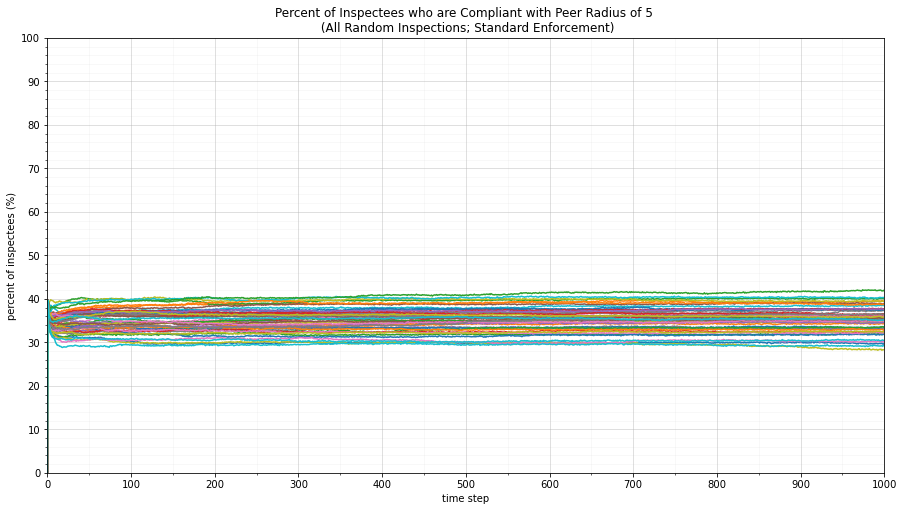

<Figure size 432x288 with 0 Axes>

In [76]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,2), minor=True)

plt.plot(rand_standard_radius_5_1['step'],rand_standard_radius_5_1['perc-compliant'])
plt.plot(rand_standard_radius_5_2['step'],rand_standard_radius_5_2['perc-compliant'])
plt.plot(rand_standard_radius_5_3['step'],rand_standard_radius_5_3['perc-compliant'])
plt.plot(rand_standard_radius_5_4['step'],rand_standard_radius_5_4['perc-compliant'])
plt.plot(rand_standard_radius_5_5['step'],rand_standard_radius_5_5['perc-compliant'])
plt.plot(rand_standard_radius_5_6['step'],rand_standard_radius_5_6['perc-compliant'])
plt.plot(rand_standard_radius_5_7['step'],rand_standard_radius_5_7['perc-compliant'])
plt.plot(rand_standard_radius_5_8['step'],rand_standard_radius_5_8['perc-compliant'])
plt.plot(rand_standard_radius_5_9['step'],rand_standard_radius_5_9['perc-compliant'])
plt.plot(rand_standard_radius_5_10['step'],rand_standard_radius_5_10['perc-compliant'])
plt.plot(rand_standard_radius_5_11['step'],rand_standard_radius_5_11['perc-compliant'])
plt.plot(rand_standard_radius_5_12['step'],rand_standard_radius_5_12['perc-compliant'])
plt.plot(rand_standard_radius_5_13['step'],rand_standard_radius_5_13['perc-compliant'])
plt.plot(rand_standard_radius_5_14['step'],rand_standard_radius_5_14['perc-compliant'])
plt.plot(rand_standard_radius_5_15['step'],rand_standard_radius_5_15['perc-compliant'])
plt.plot(rand_standard_radius_5_16['step'],rand_standard_radius_5_16['perc-compliant'])
plt.plot(rand_standard_radius_5_17['step'],rand_standard_radius_5_17['perc-compliant'])
plt.plot(rand_standard_radius_5_18['step'],rand_standard_radius_5_18['perc-compliant'])
plt.plot(rand_standard_radius_5_19['step'],rand_standard_radius_5_19['perc-compliant'])
plt.plot(rand_standard_radius_5_20['step'],rand_standard_radius_5_20['perc-compliant'])
plt.plot(rand_standard_radius_5_21['step'],rand_standard_radius_5_21['perc-compliant'])
plt.plot(rand_standard_radius_5_22['step'],rand_standard_radius_5_22['perc-compliant'])
plt.plot(rand_standard_radius_5_23['step'],rand_standard_radius_5_23['perc-compliant'])
plt.plot(rand_standard_radius_5_24['step'],rand_standard_radius_5_24['perc-compliant'])
plt.plot(rand_standard_radius_5_25['step'],rand_standard_radius_5_25['perc-compliant'])
plt.plot(rand_standard_radius_5_26['step'],rand_standard_radius_5_26['perc-compliant'])
plt.plot(rand_standard_radius_5_27['step'],rand_standard_radius_5_27['perc-compliant'])
plt.plot(rand_standard_radius_5_28['step'],rand_standard_radius_5_28['perc-compliant'])
plt.plot(rand_standard_radius_5_29['step'],rand_standard_radius_5_29['perc-compliant'])
plt.plot(rand_standard_radius_5_30['step'],rand_standard_radius_5_30['perc-compliant'])
plt.plot(rand_standard_radius_5_31['step'],rand_standard_radius_5_31['perc-compliant'])
plt.plot(rand_standard_radius_5_32['step'],rand_standard_radius_5_32['perc-compliant'])
plt.plot(rand_standard_radius_5_33['step'],rand_standard_radius_5_33['perc-compliant'])
plt.plot(rand_standard_radius_5_34['step'],rand_standard_radius_5_34['perc-compliant'])
plt.plot(rand_standard_radius_5_35['step'],rand_standard_radius_5_35['perc-compliant'])
plt.plot(rand_standard_radius_5_36['step'],rand_standard_radius_5_36['perc-compliant'])
plt.plot(rand_standard_radius_5_37['step'],rand_standard_radius_5_37['perc-compliant'])
plt.plot(rand_standard_radius_5_38['step'],rand_standard_radius_5_38['perc-compliant'])
plt.plot(rand_standard_radius_5_39['step'],rand_standard_radius_5_39['perc-compliant'])
plt.plot(rand_standard_radius_5_40['step'],rand_standard_radius_5_40['perc-compliant'])
plt.plot(rand_standard_radius_5_41['step'],rand_standard_radius_5_41['perc-compliant'])
plt.plot(rand_standard_radius_5_42['step'],rand_standard_radius_5_42['perc-compliant'])
plt.plot(rand_standard_radius_5_43['step'],rand_standard_radius_5_43['perc-compliant'])
plt.plot(rand_standard_radius_5_44['step'],rand_standard_radius_5_44['perc-compliant'])
plt.plot(rand_standard_radius_5_45['step'],rand_standard_radius_5_45['perc-compliant'])
plt.plot(rand_standard_radius_5_46['step'],rand_standard_radius_5_46['perc-compliant'])
plt.plot(rand_standard_radius_5_47['step'],rand_standard_radius_5_47['perc-compliant'])
plt.plot(rand_standard_radius_5_48['step'],rand_standard_radius_5_48['perc-compliant'])
plt.plot(rand_standard_radius_5_49['step'],rand_standard_radius_5_49['perc-compliant'])
plt.plot(rand_standard_radius_5_50['step'],rand_standard_radius_5_50['perc-compliant'])


plt.title("Percent of Inspectees who are Compliant with Peer Radius of 5 \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Compliant All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

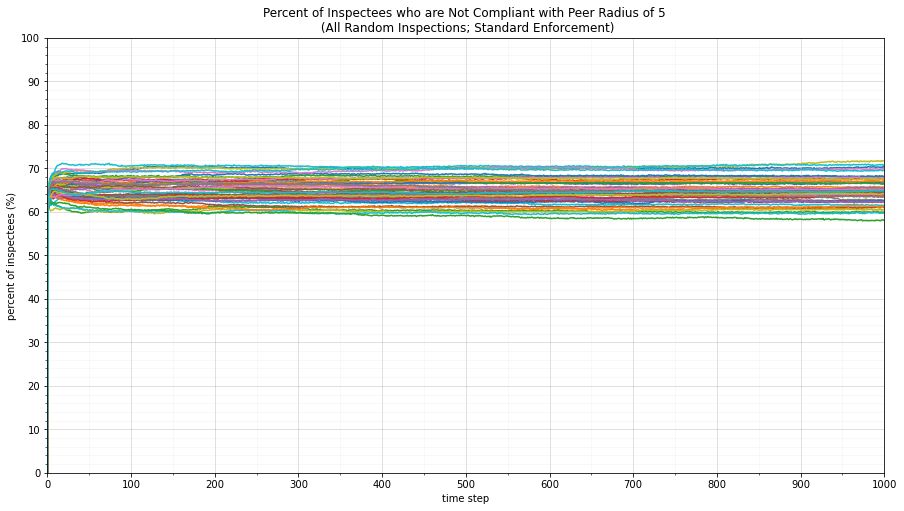

<Figure size 432x288 with 0 Axes>

In [62]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,2), minor=True)

plt.plot(rand_standard_radius_5_1['step'],rand_standard_radius_5_1['perc-noncompliant'])
plt.plot(rand_standard_radius_5_2['step'],rand_standard_radius_5_2['perc-noncompliant'])
plt.plot(rand_standard_radius_5_3['step'],rand_standard_radius_5_3['perc-noncompliant'])
plt.plot(rand_standard_radius_5_4['step'],rand_standard_radius_5_4['perc-noncompliant'])
plt.plot(rand_standard_radius_5_5['step'],rand_standard_radius_5_5['perc-noncompliant'])
plt.plot(rand_standard_radius_5_6['step'],rand_standard_radius_5_6['perc-noncompliant'])
plt.plot(rand_standard_radius_5_7['step'],rand_standard_radius_5_7['perc-noncompliant'])
plt.plot(rand_standard_radius_5_8['step'],rand_standard_radius_5_8['perc-noncompliant'])
plt.plot(rand_standard_radius_5_9['step'],rand_standard_radius_5_9['perc-noncompliant'])
plt.plot(rand_standard_radius_5_10['step'],rand_standard_radius_5_10['perc-noncompliant'])
plt.plot(rand_standard_radius_5_11['step'],rand_standard_radius_5_11['perc-noncompliant'])
plt.plot(rand_standard_radius_5_12['step'],rand_standard_radius_5_12['perc-noncompliant'])
plt.plot(rand_standard_radius_5_13['step'],rand_standard_radius_5_13['perc-noncompliant'])
plt.plot(rand_standard_radius_5_14['step'],rand_standard_radius_5_14['perc-noncompliant'])
plt.plot(rand_standard_radius_5_15['step'],rand_standard_radius_5_15['perc-noncompliant'])
plt.plot(rand_standard_radius_5_16['step'],rand_standard_radius_5_16['perc-noncompliant'])
plt.plot(rand_standard_radius_5_17['step'],rand_standard_radius_5_17['perc-noncompliant'])
plt.plot(rand_standard_radius_5_18['step'],rand_standard_radius_5_18['perc-noncompliant'])
plt.plot(rand_standard_radius_5_19['step'],rand_standard_radius_5_19['perc-noncompliant'])
plt.plot(rand_standard_radius_5_20['step'],rand_standard_radius_5_20['perc-noncompliant'])
plt.plot(rand_standard_radius_5_21['step'],rand_standard_radius_5_21['perc-noncompliant'])
plt.plot(rand_standard_radius_5_22['step'],rand_standard_radius_5_22['perc-noncompliant'])
plt.plot(rand_standard_radius_5_23['step'],rand_standard_radius_5_23['perc-noncompliant'])
plt.plot(rand_standard_radius_5_24['step'],rand_standard_radius_5_24['perc-noncompliant'])
plt.plot(rand_standard_radius_5_25['step'],rand_standard_radius_5_25['perc-noncompliant'])
plt.plot(rand_standard_radius_5_26['step'],rand_standard_radius_5_26['perc-noncompliant'])
plt.plot(rand_standard_radius_5_27['step'],rand_standard_radius_5_27['perc-noncompliant'])
plt.plot(rand_standard_radius_5_28['step'],rand_standard_radius_5_28['perc-noncompliant'])
plt.plot(rand_standard_radius_5_29['step'],rand_standard_radius_5_29['perc-noncompliant'])
plt.plot(rand_standard_radius_5_30['step'],rand_standard_radius_5_30['perc-noncompliant'])
plt.plot(rand_standard_radius_5_31['step'],rand_standard_radius_5_31['perc-noncompliant'])
plt.plot(rand_standard_radius_5_32['step'],rand_standard_radius_5_32['perc-noncompliant'])
plt.plot(rand_standard_radius_5_33['step'],rand_standard_radius_5_33['perc-noncompliant'])
plt.plot(rand_standard_radius_5_34['step'],rand_standard_radius_5_34['perc-noncompliant'])
plt.plot(rand_standard_radius_5_35['step'],rand_standard_radius_5_35['perc-noncompliant'])
plt.plot(rand_standard_radius_5_36['step'],rand_standard_radius_5_36['perc-noncompliant'])
plt.plot(rand_standard_radius_5_37['step'],rand_standard_radius_5_37['perc-noncompliant'])
plt.plot(rand_standard_radius_5_38['step'],rand_standard_radius_5_38['perc-noncompliant'])
plt.plot(rand_standard_radius_5_39['step'],rand_standard_radius_5_39['perc-noncompliant'])
plt.plot(rand_standard_radius_5_40['step'],rand_standard_radius_5_40['perc-noncompliant'])
plt.plot(rand_standard_radius_5_41['step'],rand_standard_radius_5_41['perc-noncompliant'])
plt.plot(rand_standard_radius_5_42['step'],rand_standard_radius_5_42['perc-noncompliant'])
plt.plot(rand_standard_radius_5_43['step'],rand_standard_radius_5_43['perc-noncompliant'])
plt.plot(rand_standard_radius_5_44['step'],rand_standard_radius_5_44['perc-noncompliant'])
plt.plot(rand_standard_radius_5_45['step'],rand_standard_radius_5_45['perc-noncompliant'])
plt.plot(rand_standard_radius_5_46['step'],rand_standard_radius_5_46['perc-noncompliant'])
plt.plot(rand_standard_radius_5_47['step'],rand_standard_radius_5_47['perc-noncompliant'])
plt.plot(rand_standard_radius_5_48['step'],rand_standard_radius_5_48['perc-noncompliant'])
plt.plot(rand_standard_radius_5_49['step'],rand_standard_radius_5_49['perc-noncompliant'])
plt.plot(rand_standard_radius_5_50['step'],rand_standard_radius_5_50['perc-noncompliant'])


plt.title("Percent of Inspectees who are Not Compliant with Peer Radius of 5 \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Not Compliant All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

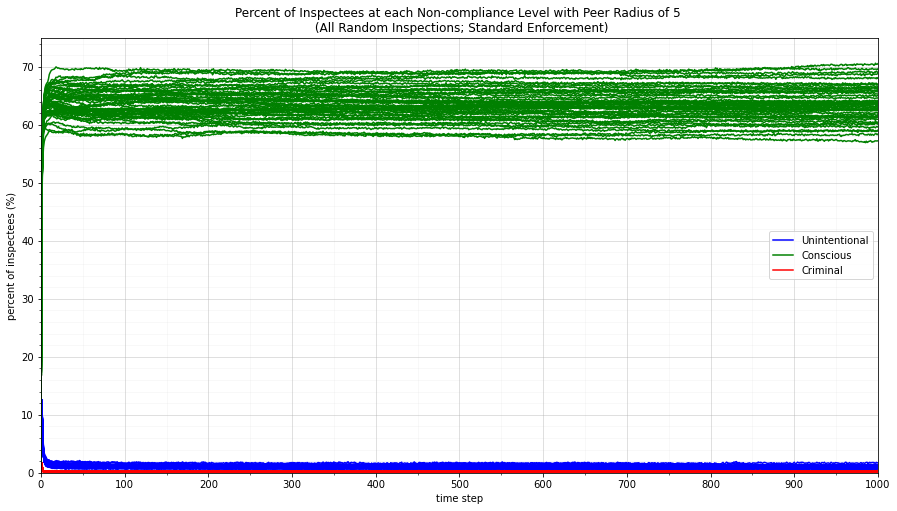

<Figure size 432x288 with 0 Axes>

In [64]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,75.1,10))
ax.set_yticks(np.arange(0,75.1,2), minor=True)

plt.plot(rand_standard_radius_5_1['step'], rand_standard_radius_5_1['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_2['step'], rand_standard_radius_5_2['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_3['step'], rand_standard_radius_5_3['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_4['step'], rand_standard_radius_5_4['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_5['step'], rand_standard_radius_5_5['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_6['step'], rand_standard_radius_5_6['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_7['step'], rand_standard_radius_5_7['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_8['step'], rand_standard_radius_5_8['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_9['step'], rand_standard_radius_5_9['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_10['step'], rand_standard_radius_5_10['perc-unintentional'], color="blue")

plt.plot(rand_standard_radius_5_11['step'], rand_standard_radius_5_11['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_12['step'], rand_standard_radius_5_12['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_13['step'], rand_standard_radius_5_13['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_14['step'], rand_standard_radius_5_14['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_15['step'], rand_standard_radius_5_15['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_16['step'], rand_standard_radius_5_16['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_17['step'], rand_standard_radius_5_17['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_18['step'], rand_standard_radius_5_18['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_19['step'], rand_standard_radius_5_19['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_20['step'], rand_standard_radius_5_20['perc-unintentional'], color="blue")

plt.plot(rand_standard_radius_5_21['step'], rand_standard_radius_5_21['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_22['step'], rand_standard_radius_5_22['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_23['step'], rand_standard_radius_5_23['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_24['step'], rand_standard_radius_5_24['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_25['step'], rand_standard_radius_5_25['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_26['step'], rand_standard_radius_5_26['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_27['step'], rand_standard_radius_5_27['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_28['step'], rand_standard_radius_5_28['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_29['step'], rand_standard_radius_5_29['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_30['step'], rand_standard_radius_5_30['perc-unintentional'], color="blue")

plt.plot(rand_standard_radius_5_31['step'], rand_standard_radius_5_31['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_32['step'], rand_standard_radius_5_32['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_33['step'], rand_standard_radius_5_33['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_34['step'], rand_standard_radius_5_34['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_35['step'], rand_standard_radius_5_35['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_36['step'], rand_standard_radius_5_36['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_37['step'], rand_standard_radius_5_37['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_38['step'], rand_standard_radius_5_38['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_39['step'], rand_standard_radius_5_39['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_40['step'], rand_standard_radius_5_40['perc-unintentional'], color="blue")

plt.plot(rand_standard_radius_5_41['step'], rand_standard_radius_5_41['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_42['step'], rand_standard_radius_5_42['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_43['step'], rand_standard_radius_5_43['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_44['step'], rand_standard_radius_5_44['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_45['step'], rand_standard_radius_5_45['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_46['step'], rand_standard_radius_5_46['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_47['step'], rand_standard_radius_5_47['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_48['step'], rand_standard_radius_5_48['perc-unintentional'], color="blue")
plt.plot(rand_standard_radius_5_49['step'], rand_standard_radius_5_49['perc-unintentional'], color="blue", label="Unintentional")
plt.plot(rand_standard_radius_5_50['step'], rand_standard_radius_5_50['perc-unintentional'], color="blue")

plt.plot(rand_standard_radius_5_1['step'], rand_standard_radius_5_1['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_2['step'], rand_standard_radius_5_2['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_3['step'], rand_standard_radius_5_3['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_4['step'], rand_standard_radius_5_4['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_5['step'], rand_standard_radius_5_5['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_6['step'], rand_standard_radius_5_6['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_7['step'], rand_standard_radius_5_7['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_8['step'], rand_standard_radius_5_8['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_9['step'], rand_standard_radius_5_9['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_10['step'], rand_standard_radius_5_10['perc-conscious'], color="green")

plt.plot(rand_standard_radius_5_11['step'], rand_standard_radius_5_11['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_12['step'], rand_standard_radius_5_12['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_13['step'], rand_standard_radius_5_13['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_14['step'], rand_standard_radius_5_14['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_15['step'], rand_standard_radius_5_15['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_16['step'], rand_standard_radius_5_16['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_17['step'], rand_standard_radius_5_17['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_18['step'], rand_standard_radius_5_18['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_19['step'], rand_standard_radius_5_19['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_20['step'], rand_standard_radius_5_20['perc-conscious'], color="green")

plt.plot(rand_standard_radius_5_21['step'], rand_standard_radius_5_21['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_22['step'], rand_standard_radius_5_22['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_23['step'], rand_standard_radius_5_23['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_24['step'], rand_standard_radius_5_24['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_25['step'], rand_standard_radius_5_25['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_26['step'], rand_standard_radius_5_26['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_27['step'], rand_standard_radius_5_27['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_28['step'], rand_standard_radius_5_28['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_29['step'], rand_standard_radius_5_29['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_30['step'], rand_standard_radius_5_30['perc-conscious'], color="green")

plt.plot(rand_standard_radius_5_31['step'], rand_standard_radius_5_31['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_32['step'], rand_standard_radius_5_32['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_33['step'], rand_standard_radius_5_33['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_34['step'], rand_standard_radius_5_34['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_35['step'], rand_standard_radius_5_35['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_36['step'], rand_standard_radius_5_36['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_37['step'], rand_standard_radius_5_37['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_38['step'], rand_standard_radius_5_38['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_39['step'], rand_standard_radius_5_39['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_40['step'], rand_standard_radius_5_40['perc-conscious'], color="green")

plt.plot(rand_standard_radius_5_41['step'], rand_standard_radius_5_41['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_42['step'], rand_standard_radius_5_42['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_43['step'], rand_standard_radius_5_43['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_44['step'], rand_standard_radius_5_44['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_45['step'], rand_standard_radius_5_45['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_46['step'], rand_standard_radius_5_46['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_47['step'], rand_standard_radius_5_47['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_48['step'], rand_standard_radius_5_48['perc-conscious'], color="green")
plt.plot(rand_standard_radius_5_49['step'], rand_standard_radius_5_49['perc-conscious'], color="green", label="Conscious")
plt.plot(rand_standard_radius_5_50['step'], rand_standard_radius_5_50['perc-conscious'], color="green")

plt.plot(rand_standard_radius_5_1['step'], rand_standard_radius_5_1['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_2['step'], rand_standard_radius_5_2['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_3['step'], rand_standard_radius_5_3['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_4['step'], rand_standard_radius_5_4['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_5['step'], rand_standard_radius_5_5['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_6['step'], rand_standard_radius_5_6['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_7['step'], rand_standard_radius_5_7['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_8['step'], rand_standard_radius_5_8['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_9['step'], rand_standard_radius_5_9['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_10['step'], rand_standard_radius_5_10['perc-criminal'], color="red")

plt.plot(rand_standard_radius_5_11['step'], rand_standard_radius_5_11['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_12['step'], rand_standard_radius_5_12['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_13['step'], rand_standard_radius_5_13['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_14['step'], rand_standard_radius_5_14['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_15['step'], rand_standard_radius_5_15['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_16['step'], rand_standard_radius_5_16['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_17['step'], rand_standard_radius_5_17['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_18['step'], rand_standard_radius_5_18['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_19['step'], rand_standard_radius_5_19['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_20['step'], rand_standard_radius_5_20['perc-criminal'], color="red")

plt.plot(rand_standard_radius_5_21['step'], rand_standard_radius_5_21['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_22['step'], rand_standard_radius_5_22['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_23['step'], rand_standard_radius_5_23['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_24['step'], rand_standard_radius_5_24['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_25['step'], rand_standard_radius_5_25['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_26['step'], rand_standard_radius_5_26['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_27['step'], rand_standard_radius_5_27['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_28['step'], rand_standard_radius_5_28['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_29['step'], rand_standard_radius_5_29['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_30['step'], rand_standard_radius_5_30['perc-criminal'], color="red")

plt.plot(rand_standard_radius_5_31['step'], rand_standard_radius_5_31['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_32['step'], rand_standard_radius_5_32['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_33['step'], rand_standard_radius_5_33['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_34['step'], rand_standard_radius_5_34['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_35['step'], rand_standard_radius_5_35['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_36['step'], rand_standard_radius_5_36['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_37['step'], rand_standard_radius_5_37['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_38['step'], rand_standard_radius_5_38['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_39['step'], rand_standard_radius_5_39['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_40['step'], rand_standard_radius_5_40['perc-criminal'], color="red")

plt.plot(rand_standard_radius_5_41['step'], rand_standard_radius_5_41['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_42['step'], rand_standard_radius_5_42['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_43['step'], rand_standard_radius_5_43['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_44['step'], rand_standard_radius_5_44['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_45['step'], rand_standard_radius_5_45['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_46['step'], rand_standard_radius_5_46['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_47['step'], rand_standard_radius_5_47['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_48['step'], rand_standard_radius_5_48['perc-criminal'], color="red")
plt.plot(rand_standard_radius_5_49['step'], rand_standard_radius_5_49['perc-criminal'], color="red", label="Criminal")
plt.plot(rand_standard_radius_5_50['step'], rand_standard_radius_5_50['perc-criminal'], color="red")


plt.title("Percent of Inspectees at each Non-compliance Level with Peer Radius of 5 \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,75)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Not Compliant Breakdown All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

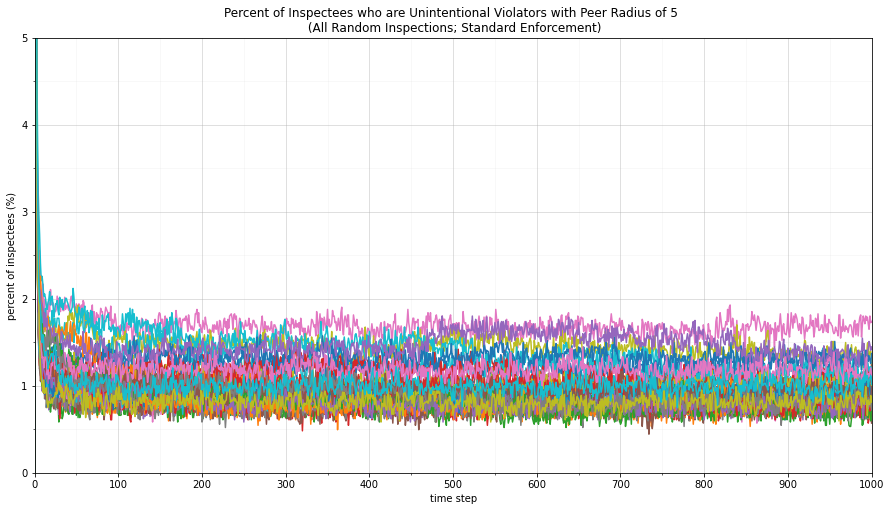

<Figure size 432x288 with 0 Axes>

In [69]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,5.1,1))
ax.set_yticks(np.arange(0,5.1,.5), minor=True)

plt.plot(rand_standard_radius_5_1['step'],rand_standard_radius_5_1['perc-unintentional'])
plt.plot(rand_standard_radius_5_2['step'],rand_standard_radius_5_2['perc-unintentional'])
plt.plot(rand_standard_radius_5_3['step'],rand_standard_radius_5_3['perc-unintentional'])
plt.plot(rand_standard_radius_5_4['step'],rand_standard_radius_5_4['perc-unintentional'])
plt.plot(rand_standard_radius_5_5['step'],rand_standard_radius_5_5['perc-unintentional'])
plt.plot(rand_standard_radius_5_6['step'],rand_standard_radius_5_6['perc-unintentional'])
plt.plot(rand_standard_radius_5_7['step'],rand_standard_radius_5_7['perc-unintentional'])
plt.plot(rand_standard_radius_5_8['step'],rand_standard_radius_5_8['perc-unintentional'])
plt.plot(rand_standard_radius_5_9['step'],rand_standard_radius_5_9['perc-unintentional'])
plt.plot(rand_standard_radius_5_10['step'],rand_standard_radius_5_10['perc-unintentional'])
plt.plot(rand_standard_radius_5_11['step'],rand_standard_radius_5_11['perc-unintentional'])
plt.plot(rand_standard_radius_5_12['step'],rand_standard_radius_5_12['perc-unintentional'])
plt.plot(rand_standard_radius_5_13['step'],rand_standard_radius_5_13['perc-unintentional'])
plt.plot(rand_standard_radius_5_14['step'],rand_standard_radius_5_14['perc-unintentional'])
plt.plot(rand_standard_radius_5_15['step'],rand_standard_radius_5_15['perc-unintentional'])
plt.plot(rand_standard_radius_5_16['step'],rand_standard_radius_5_16['perc-unintentional'])
plt.plot(rand_standard_radius_5_17['step'],rand_standard_radius_5_17['perc-unintentional'])
plt.plot(rand_standard_radius_5_18['step'],rand_standard_radius_5_18['perc-unintentional'])
plt.plot(rand_standard_radius_5_19['step'],rand_standard_radius_5_19['perc-unintentional'])
plt.plot(rand_standard_radius_5_20['step'],rand_standard_radius_5_20['perc-unintentional'])
plt.plot(rand_standard_radius_5_21['step'],rand_standard_radius_5_21['perc-unintentional'])
plt.plot(rand_standard_radius_5_22['step'],rand_standard_radius_5_22['perc-unintentional'])
plt.plot(rand_standard_radius_5_23['step'],rand_standard_radius_5_23['perc-unintentional'])
plt.plot(rand_standard_radius_5_24['step'],rand_standard_radius_5_24['perc-unintentional'])
plt.plot(rand_standard_radius_5_25['step'],rand_standard_radius_5_25['perc-unintentional'])
plt.plot(rand_standard_radius_5_26['step'],rand_standard_radius_5_26['perc-unintentional'])
plt.plot(rand_standard_radius_5_27['step'],rand_standard_radius_5_27['perc-unintentional'])
plt.plot(rand_standard_radius_5_28['step'],rand_standard_radius_5_28['perc-unintentional'])
plt.plot(rand_standard_radius_5_29['step'],rand_standard_radius_5_29['perc-unintentional'])
plt.plot(rand_standard_radius_5_30['step'],rand_standard_radius_5_30['perc-unintentional'])
plt.plot(rand_standard_radius_5_31['step'],rand_standard_radius_5_31['perc-unintentional'])
plt.plot(rand_standard_radius_5_32['step'],rand_standard_radius_5_32['perc-unintentional'])
plt.plot(rand_standard_radius_5_33['step'],rand_standard_radius_5_33['perc-unintentional'])
plt.plot(rand_standard_radius_5_34['step'],rand_standard_radius_5_34['perc-unintentional'])
plt.plot(rand_standard_radius_5_35['step'],rand_standard_radius_5_35['perc-unintentional'])
plt.plot(rand_standard_radius_5_36['step'],rand_standard_radius_5_36['perc-unintentional'])
plt.plot(rand_standard_radius_5_37['step'],rand_standard_radius_5_37['perc-unintentional'])
plt.plot(rand_standard_radius_5_38['step'],rand_standard_radius_5_38['perc-unintentional'])
plt.plot(rand_standard_radius_5_39['step'],rand_standard_radius_5_39['perc-unintentional'])
plt.plot(rand_standard_radius_5_40['step'],rand_standard_radius_5_40['perc-unintentional'])
plt.plot(rand_standard_radius_5_41['step'],rand_standard_radius_5_41['perc-unintentional'])
plt.plot(rand_standard_radius_5_42['step'],rand_standard_radius_5_42['perc-unintentional'])
plt.plot(rand_standard_radius_5_43['step'],rand_standard_radius_5_43['perc-unintentional'])
plt.plot(rand_standard_radius_5_44['step'],rand_standard_radius_5_44['perc-unintentional'])
plt.plot(rand_standard_radius_5_45['step'],rand_standard_radius_5_45['perc-unintentional'])
plt.plot(rand_standard_radius_5_46['step'],rand_standard_radius_5_46['perc-unintentional'])
plt.plot(rand_standard_radius_5_47['step'],rand_standard_radius_5_47['perc-unintentional'])
plt.plot(rand_standard_radius_5_48['step'],rand_standard_radius_5_48['perc-unintentional'])
plt.plot(rand_standard_radius_5_49['step'],rand_standard_radius_5_49['perc-unintentional'])
plt.plot(rand_standard_radius_5_50['step'],rand_standard_radius_5_50['perc-unintentional'])


plt.title("Percent of Inspectees who are Unintentional Violators with Peer Radius of 5 \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,5)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Unintentional All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

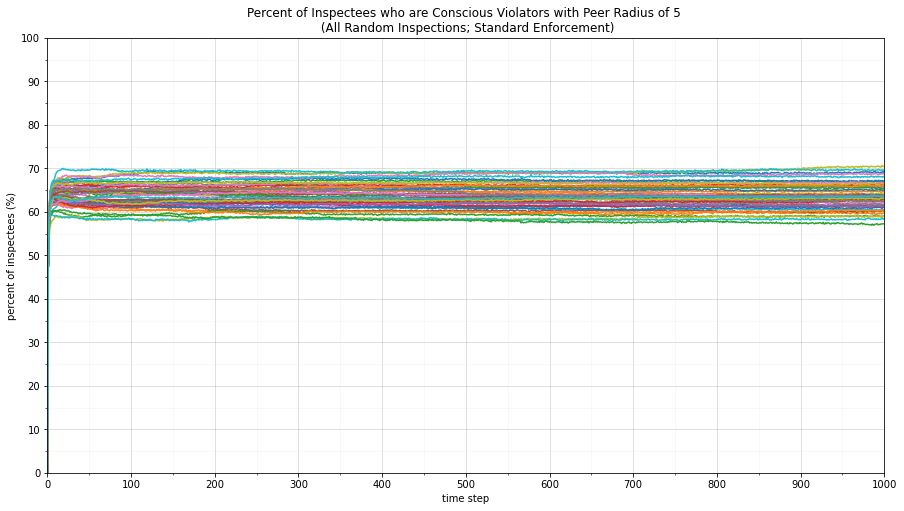

<Figure size 432x288 with 0 Axes>

In [73]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_standard_radius_5_1['step'],rand_standard_radius_5_1['perc-conscious'])
plt.plot(rand_standard_radius_5_2['step'],rand_standard_radius_5_2['perc-conscious'])
plt.plot(rand_standard_radius_5_3['step'],rand_standard_radius_5_3['perc-conscious'])
plt.plot(rand_standard_radius_5_4['step'],rand_standard_radius_5_4['perc-conscious'])
plt.plot(rand_standard_radius_5_5['step'],rand_standard_radius_5_5['perc-conscious'])
plt.plot(rand_standard_radius_5_6['step'],rand_standard_radius_5_6['perc-conscious'])
plt.plot(rand_standard_radius_5_7['step'],rand_standard_radius_5_7['perc-conscious'])
plt.plot(rand_standard_radius_5_8['step'],rand_standard_radius_5_8['perc-conscious'])
plt.plot(rand_standard_radius_5_9['step'],rand_standard_radius_5_9['perc-conscious'])
plt.plot(rand_standard_radius_5_10['step'],rand_standard_radius_5_10['perc-conscious'])
plt.plot(rand_standard_radius_5_11['step'],rand_standard_radius_5_11['perc-conscious'])
plt.plot(rand_standard_radius_5_12['step'],rand_standard_radius_5_12['perc-conscious'])
plt.plot(rand_standard_radius_5_13['step'],rand_standard_radius_5_13['perc-conscious'])
plt.plot(rand_standard_radius_5_14['step'],rand_standard_radius_5_14['perc-conscious'])
plt.plot(rand_standard_radius_5_15['step'],rand_standard_radius_5_15['perc-conscious'])
plt.plot(rand_standard_radius_5_16['step'],rand_standard_radius_5_16['perc-conscious'])
plt.plot(rand_standard_radius_5_17['step'],rand_standard_radius_5_17['perc-conscious'])
plt.plot(rand_standard_radius_5_18['step'],rand_standard_radius_5_18['perc-conscious'])
plt.plot(rand_standard_radius_5_19['step'],rand_standard_radius_5_19['perc-conscious'])
plt.plot(rand_standard_radius_5_20['step'],rand_standard_radius_5_20['perc-conscious'])
plt.plot(rand_standard_radius_5_21['step'],rand_standard_radius_5_21['perc-conscious'])
plt.plot(rand_standard_radius_5_22['step'],rand_standard_radius_5_22['perc-conscious'])
plt.plot(rand_standard_radius_5_23['step'],rand_standard_radius_5_23['perc-conscious'])
plt.plot(rand_standard_radius_5_24['step'],rand_standard_radius_5_24['perc-conscious'])
plt.plot(rand_standard_radius_5_25['step'],rand_standard_radius_5_25['perc-conscious'])
plt.plot(rand_standard_radius_5_26['step'],rand_standard_radius_5_26['perc-conscious'])
plt.plot(rand_standard_radius_5_27['step'],rand_standard_radius_5_27['perc-conscious'])
plt.plot(rand_standard_radius_5_28['step'],rand_standard_radius_5_28['perc-conscious'])
plt.plot(rand_standard_radius_5_29['step'],rand_standard_radius_5_29['perc-conscious'])
plt.plot(rand_standard_radius_5_30['step'],rand_standard_radius_5_30['perc-conscious'])
plt.plot(rand_standard_radius_5_31['step'],rand_standard_radius_5_31['perc-conscious'])
plt.plot(rand_standard_radius_5_32['step'],rand_standard_radius_5_32['perc-conscious'])
plt.plot(rand_standard_radius_5_33['step'],rand_standard_radius_5_33['perc-conscious'])
plt.plot(rand_standard_radius_5_34['step'],rand_standard_radius_5_34['perc-conscious'])
plt.plot(rand_standard_radius_5_35['step'],rand_standard_radius_5_35['perc-conscious'])
plt.plot(rand_standard_radius_5_36['step'],rand_standard_radius_5_36['perc-conscious'])
plt.plot(rand_standard_radius_5_37['step'],rand_standard_radius_5_37['perc-conscious'])
plt.plot(rand_standard_radius_5_38['step'],rand_standard_radius_5_38['perc-conscious'])
plt.plot(rand_standard_radius_5_39['step'],rand_standard_radius_5_39['perc-conscious'])
plt.plot(rand_standard_radius_5_40['step'],rand_standard_radius_5_40['perc-conscious'])
plt.plot(rand_standard_radius_5_41['step'],rand_standard_radius_5_41['perc-conscious'])
plt.plot(rand_standard_radius_5_42['step'],rand_standard_radius_5_42['perc-conscious'])
plt.plot(rand_standard_radius_5_43['step'],rand_standard_radius_5_43['perc-conscious'])
plt.plot(rand_standard_radius_5_44['step'],rand_standard_radius_5_44['perc-conscious'])
plt.plot(rand_standard_radius_5_45['step'],rand_standard_radius_5_45['perc-conscious'])
plt.plot(rand_standard_radius_5_46['step'],rand_standard_radius_5_46['perc-conscious'])
plt.plot(rand_standard_radius_5_47['step'],rand_standard_radius_5_47['perc-conscious'])
plt.plot(rand_standard_radius_5_48['step'],rand_standard_radius_5_48['perc-conscious'])
plt.plot(rand_standard_radius_5_49['step'],rand_standard_radius_5_49['perc-conscious'])
plt.plot(rand_standard_radius_5_50['step'],rand_standard_radius_5_50['perc-conscious'])


plt.title("Percent of Inspectees who are Conscious Violators with Peer Radius of 5 \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Conscious All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

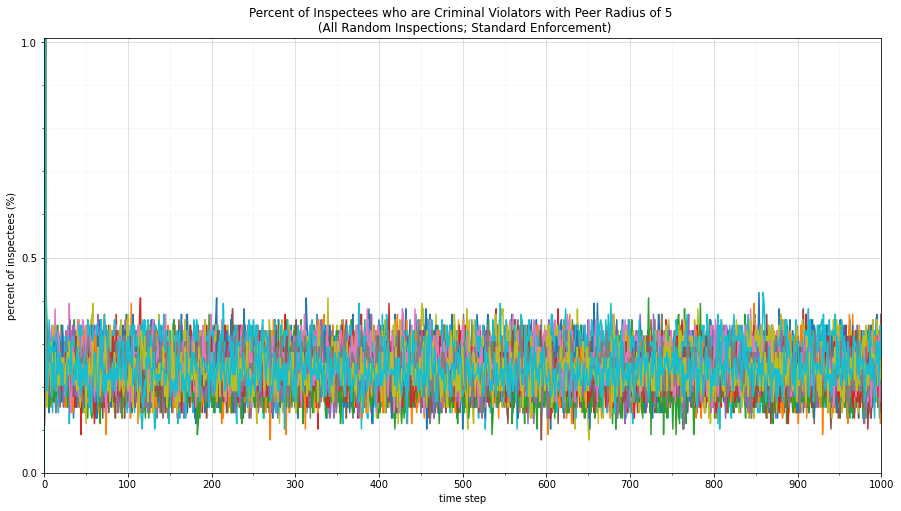

<Figure size 432x288 with 0 Axes>

In [75]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(rand_standard_radius_5_1['step'],rand_standard_radius_5_1['perc-criminal'])
plt.plot(rand_standard_radius_5_2['step'],rand_standard_radius_5_2['perc-criminal'])
plt.plot(rand_standard_radius_5_3['step'],rand_standard_radius_5_3['perc-criminal'])
plt.plot(rand_standard_radius_5_4['step'],rand_standard_radius_5_4['perc-criminal'])
plt.plot(rand_standard_radius_5_5['step'],rand_standard_radius_5_5['perc-criminal'])
plt.plot(rand_standard_radius_5_6['step'],rand_standard_radius_5_6['perc-criminal'])
plt.plot(rand_standard_radius_5_7['step'],rand_standard_radius_5_7['perc-criminal'])
plt.plot(rand_standard_radius_5_8['step'],rand_standard_radius_5_8['perc-criminal'])
plt.plot(rand_standard_radius_5_9['step'],rand_standard_radius_5_9['perc-criminal'])
plt.plot(rand_standard_radius_5_10['step'],rand_standard_radius_5_10['perc-criminal'])
plt.plot(rand_standard_radius_5_11['step'],rand_standard_radius_5_11['perc-criminal'])
plt.plot(rand_standard_radius_5_12['step'],rand_standard_radius_5_12['perc-criminal'])
plt.plot(rand_standard_radius_5_13['step'],rand_standard_radius_5_13['perc-criminal'])
plt.plot(rand_standard_radius_5_14['step'],rand_standard_radius_5_14['perc-criminal'])
plt.plot(rand_standard_radius_5_15['step'],rand_standard_radius_5_15['perc-criminal'])
plt.plot(rand_standard_radius_5_16['step'],rand_standard_radius_5_16['perc-criminal'])
plt.plot(rand_standard_radius_5_17['step'],rand_standard_radius_5_17['perc-criminal'])
plt.plot(rand_standard_radius_5_18['step'],rand_standard_radius_5_18['perc-criminal'])
plt.plot(rand_standard_radius_5_19['step'],rand_standard_radius_5_19['perc-criminal'])
plt.plot(rand_standard_radius_5_20['step'],rand_standard_radius_5_20['perc-criminal'])
plt.plot(rand_standard_radius_5_21['step'],rand_standard_radius_5_21['perc-criminal'])
plt.plot(rand_standard_radius_5_22['step'],rand_standard_radius_5_22['perc-criminal'])
plt.plot(rand_standard_radius_5_23['step'],rand_standard_radius_5_23['perc-criminal'])
plt.plot(rand_standard_radius_5_24['step'],rand_standard_radius_5_24['perc-criminal'])
plt.plot(rand_standard_radius_5_25['step'],rand_standard_radius_5_25['perc-criminal'])
plt.plot(rand_standard_radius_5_26['step'],rand_standard_radius_5_26['perc-criminal'])
plt.plot(rand_standard_radius_5_27['step'],rand_standard_radius_5_27['perc-criminal'])
plt.plot(rand_standard_radius_5_28['step'],rand_standard_radius_5_28['perc-criminal'])
plt.plot(rand_standard_radius_5_29['step'],rand_standard_radius_5_29['perc-criminal'])
plt.plot(rand_standard_radius_5_30['step'],rand_standard_radius_5_30['perc-criminal'])
plt.plot(rand_standard_radius_5_31['step'],rand_standard_radius_5_31['perc-criminal'])
plt.plot(rand_standard_radius_5_32['step'],rand_standard_radius_5_32['perc-criminal'])
plt.plot(rand_standard_radius_5_33['step'],rand_standard_radius_5_33['perc-criminal'])
plt.plot(rand_standard_radius_5_34['step'],rand_standard_radius_5_34['perc-criminal'])
plt.plot(rand_standard_radius_5_35['step'],rand_standard_radius_5_35['perc-criminal'])
plt.plot(rand_standard_radius_5_36['step'],rand_standard_radius_5_36['perc-criminal'])
plt.plot(rand_standard_radius_5_37['step'],rand_standard_radius_5_37['perc-criminal'])
plt.plot(rand_standard_radius_5_38['step'],rand_standard_radius_5_38['perc-criminal'])
plt.plot(rand_standard_radius_5_39['step'],rand_standard_radius_5_39['perc-criminal'])
plt.plot(rand_standard_radius_5_40['step'],rand_standard_radius_5_40['perc-criminal'])
plt.plot(rand_standard_radius_5_41['step'],rand_standard_radius_5_41['perc-criminal'])
plt.plot(rand_standard_radius_5_42['step'],rand_standard_radius_5_42['perc-criminal'])
plt.plot(rand_standard_radius_5_43['step'],rand_standard_radius_5_43['perc-criminal'])
plt.plot(rand_standard_radius_5_44['step'],rand_standard_radius_5_44['perc-criminal'])
plt.plot(rand_standard_radius_5_45['step'],rand_standard_radius_5_45['perc-criminal'])
plt.plot(rand_standard_radius_5_46['step'],rand_standard_radius_5_46['perc-criminal'])
plt.plot(rand_standard_radius_5_47['step'],rand_standard_radius_5_47['perc-criminal'])
plt.plot(rand_standard_radius_5_48['step'],rand_standard_radius_5_48['perc-criminal'])
plt.plot(rand_standard_radius_5_49['step'],rand_standard_radius_5_49['perc-criminal'])
plt.plot(rand_standard_radius_5_50['step'],rand_standard_radius_5_50['perc-criminal'])


plt.title("Percent of Inspectees who are Criminal Violators with Peer Radius of 5 \n (All Random Inspections; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Criminal All Runs (Random, Standard).png', dpi=300, bbox_inches='tight')

#### Responsive Enforcement

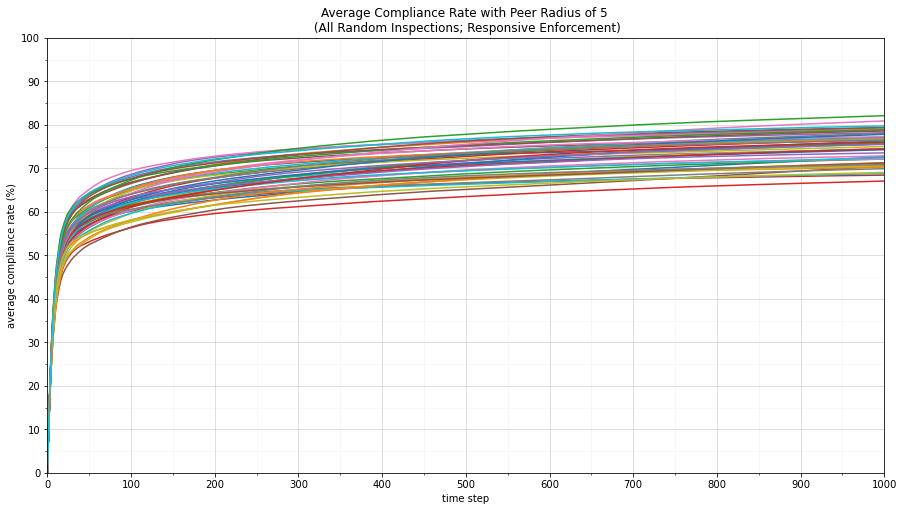

<Figure size 432x288 with 0 Axes>

In [77]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_5_1['step'],rand_resp_radius_5_1['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_2['step'],rand_resp_radius_5_2['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_3['step'],rand_resp_radius_5_3['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_4['step'],rand_resp_radius_5_4['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_5['step'],rand_resp_radius_5_5['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_6['step'],rand_resp_radius_5_6['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_7['step'],rand_resp_radius_5_7['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_8['step'],rand_resp_radius_5_8['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_9['step'],rand_resp_radius_5_9['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_10['step'],rand_resp_radius_5_10['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_11['step'],rand_resp_radius_5_11['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_12['step'],rand_resp_radius_5_12['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_13['step'],rand_resp_radius_5_13['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_14['step'],rand_resp_radius_5_14['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_15['step'],rand_resp_radius_5_15['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_16['step'],rand_resp_radius_5_16['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_17['step'],rand_resp_radius_5_17['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_18['step'],rand_resp_radius_5_18['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_19['step'],rand_resp_radius_5_19['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_20['step'],rand_resp_radius_5_20['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_21['step'],rand_resp_radius_5_21['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_22['step'],rand_resp_radius_5_22['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_23['step'],rand_resp_radius_5_23['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_24['step'],rand_resp_radius_5_24['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_25['step'],rand_resp_radius_5_25['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_26['step'],rand_resp_radius_5_26['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_27['step'],rand_resp_radius_5_27['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_28['step'],rand_resp_radius_5_28['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_29['step'],rand_resp_radius_5_29['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_30['step'],rand_resp_radius_5_30['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_31['step'],rand_resp_radius_5_31['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_32['step'],rand_resp_radius_5_32['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_33['step'],rand_resp_radius_5_33['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_34['step'],rand_resp_radius_5_34['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_35['step'],rand_resp_radius_5_35['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_36['step'],rand_resp_radius_5_36['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_37['step'],rand_resp_radius_5_37['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_38['step'],rand_resp_radius_5_38['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_39['step'],rand_resp_radius_5_39['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_40['step'],rand_resp_radius_5_40['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_41['step'],rand_resp_radius_5_41['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_42['step'],rand_resp_radius_5_42['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_43['step'],rand_resp_radius_5_43['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_44['step'],rand_resp_radius_5_44['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_45['step'],rand_resp_radius_5_45['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_46['step'],rand_resp_radius_5_46['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_47['step'],rand_resp_radius_5_47['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_48['step'],rand_resp_radius_5_48['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_49['step'],rand_resp_radius_5_49['avg-compliance-rate'])
plt.plot(rand_resp_radius_5_50['step'],rand_resp_radius_5_50['avg-compliance-rate'])


plt.title("Average Compliance Rate with Peer Radius of 5 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Avg Compliance All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

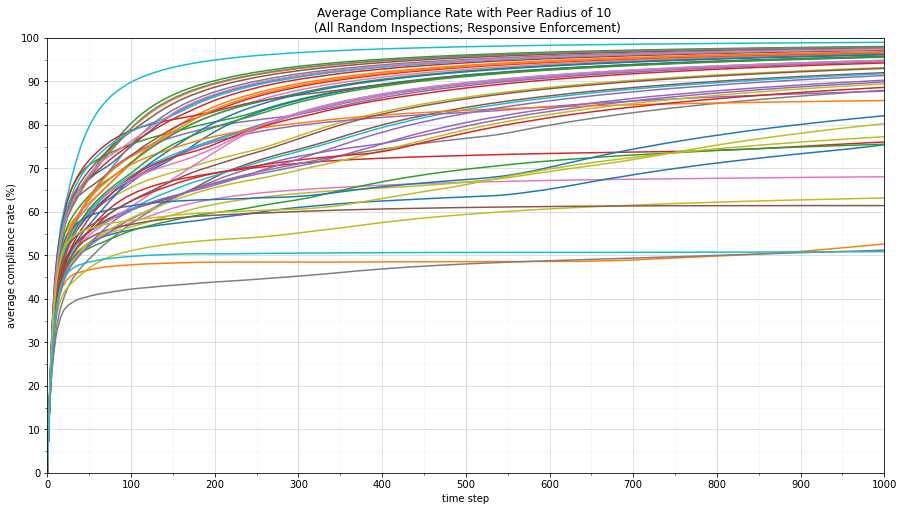

<Figure size 432x288 with 0 Axes>

In [111]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_10_1['step'],rand_resp_radius_10_1['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_2['step'],rand_resp_radius_10_2['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_3['step'],rand_resp_radius_10_3['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_4['step'],rand_resp_radius_10_4['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_5['step'],rand_resp_radius_10_5['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_6['step'],rand_resp_radius_10_6['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_7['step'],rand_resp_radius_10_7['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_8['step'],rand_resp_radius_10_8['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_9['step'],rand_resp_radius_10_9['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_10['step'],rand_resp_radius_10_10['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_11['step'],rand_resp_radius_10_11['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_12['step'],rand_resp_radius_10_12['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_13['step'],rand_resp_radius_10_13['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_14['step'],rand_resp_radius_10_14['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_15['step'],rand_resp_radius_10_15['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_16['step'],rand_resp_radius_10_16['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_17['step'],rand_resp_radius_10_17['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_18['step'],rand_resp_radius_10_18['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_19['step'],rand_resp_radius_10_19['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_20['step'],rand_resp_radius_10_20['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_21['step'],rand_resp_radius_10_21['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_22['step'],rand_resp_radius_10_22['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_23['step'],rand_resp_radius_10_23['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_24['step'],rand_resp_radius_10_24['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_25['step'],rand_resp_radius_10_25['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_26['step'],rand_resp_radius_10_26['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_27['step'],rand_resp_radius_10_27['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_28['step'],rand_resp_radius_10_28['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_29['step'],rand_resp_radius_10_29['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_30['step'],rand_resp_radius_10_30['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_31['step'],rand_resp_radius_10_31['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_32['step'],rand_resp_radius_10_32['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_33['step'],rand_resp_radius_10_33['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_34['step'],rand_resp_radius_10_34['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_35['step'],rand_resp_radius_10_35['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_36['step'],rand_resp_radius_10_36['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_37['step'],rand_resp_radius_10_37['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_38['step'],rand_resp_radius_10_38['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_39['step'],rand_resp_radius_10_39['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_40['step'],rand_resp_radius_10_40['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_41['step'],rand_resp_radius_10_41['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_42['step'],rand_resp_radius_10_42['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_43['step'],rand_resp_radius_10_43['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_44['step'],rand_resp_radius_10_44['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_45['step'],rand_resp_radius_10_45['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_46['step'],rand_resp_radius_10_46['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_47['step'],rand_resp_radius_10_47['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_48['step'],rand_resp_radius_10_48['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_49['step'],rand_resp_radius_10_49['avg-compliance-rate'])
plt.plot(rand_resp_radius_10_50['step'],rand_resp_radius_10_50['avg-compliance-rate'])


plt.title("Average Compliance Rate with Peer Radius of 10 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 10- Time vs. Avg Compliance All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_15_1['step'],rand_resp_radius_15_1['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_2['step'],rand_resp_radius_15_2['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_3['step'],rand_resp_radius_15_3['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_4['step'],rand_resp_radius_15_4['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_5['step'],rand_resp_radius_15_5['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_6['step'],rand_resp_radius_15_6['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_7['step'],rand_resp_radius_15_7['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_8['step'],rand_resp_radius_15_8['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_9['step'],rand_resp_radius_15_9['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_10['step'],rand_resp_radius_15_10['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_11['step'],rand_resp_radius_15_11['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_12['step'],rand_resp_radius_15_12['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_13['step'],rand_resp_radius_15_13['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_14['step'],rand_resp_radius_15_14['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_15['step'],rand_resp_radius_15_15['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_16['step'],rand_resp_radius_15_16['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_17['step'],rand_resp_radius_15_17['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_18['step'],rand_resp_radius_15_18['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_19['step'],rand_resp_radius_15_19['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_20['step'],rand_resp_radius_15_20['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_21['step'],rand_resp_radius_15_21['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_22['step'],rand_resp_radius_15_22['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_23['step'],rand_resp_radius_15_23['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_24['step'],rand_resp_radius_15_24['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_25['step'],rand_resp_radius_15_25['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_26['step'],rand_resp_radius_15_26['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_27['step'],rand_resp_radius_15_27['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_28['step'],rand_resp_radius_15_28['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_29['step'],rand_resp_radius_15_29['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_30['step'],rand_resp_radius_15_30['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_31['step'],rand_resp_radius_15_31['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_32['step'],rand_resp_radius_15_32['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_33['step'],rand_resp_radius_15_33['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_34['step'],rand_resp_radius_15_34['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_35['step'],rand_resp_radius_15_35['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_36['step'],rand_resp_radius_15_36['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_37['step'],rand_resp_radius_15_37['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_38['step'],rand_resp_radius_15_38['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_39['step'],rand_resp_radius_15_39['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_40['step'],rand_resp_radius_15_40['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_41['step'],rand_resp_radius_15_41['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_42['step'],rand_resp_radius_15_42['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_43['step'],rand_resp_radius_15_43['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_44['step'],rand_resp_radius_15_44['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_45['step'],rand_resp_radius_15_45['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_46['step'],rand_resp_radius_15_46['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_47['step'],rand_resp_radius_15_47['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_48['step'],rand_resp_radius_15_48['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_49['step'],rand_resp_radius_15_49['avg-compliance-rate'])
plt.plot(rand_resp_radius_15_50['step'],rand_resp_radius_15_50['avg-compliance-rate'])


plt.title("Average Compliance Rate with Peer Radius of 15 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 15- Time vs. Avg Compliance All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

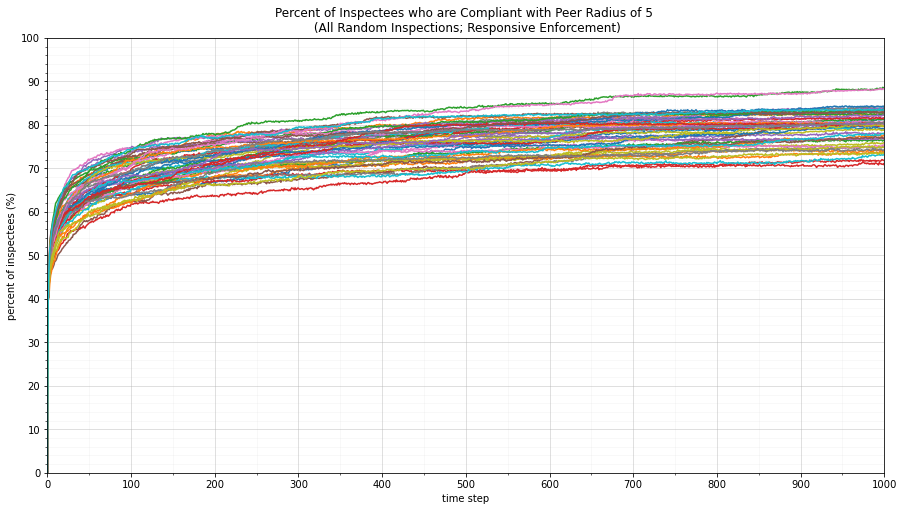

<Figure size 432x288 with 0 Axes>

In [80]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,2), minor=True)

plt.plot(rand_resp_radius_5_1['step'],rand_resp_radius_5_1['perc-compliant'])
plt.plot(rand_resp_radius_5_2['step'],rand_resp_radius_5_2['perc-compliant'])
plt.plot(rand_resp_radius_5_3['step'],rand_resp_radius_5_3['perc-compliant'])
plt.plot(rand_resp_radius_5_4['step'],rand_resp_radius_5_4['perc-compliant'])
plt.plot(rand_resp_radius_5_5['step'],rand_resp_radius_5_5['perc-compliant'])
plt.plot(rand_resp_radius_5_6['step'],rand_resp_radius_5_6['perc-compliant'])
plt.plot(rand_resp_radius_5_7['step'],rand_resp_radius_5_7['perc-compliant'])
plt.plot(rand_resp_radius_5_8['step'],rand_resp_radius_5_8['perc-compliant'])
plt.plot(rand_resp_radius_5_9['step'],rand_resp_radius_5_9['perc-compliant'])
plt.plot(rand_resp_radius_5_10['step'],rand_resp_radius_5_10['perc-compliant'])
plt.plot(rand_resp_radius_5_11['step'],rand_resp_radius_5_11['perc-compliant'])
plt.plot(rand_resp_radius_5_12['step'],rand_resp_radius_5_12['perc-compliant'])
plt.plot(rand_resp_radius_5_13['step'],rand_resp_radius_5_13['perc-compliant'])
plt.plot(rand_resp_radius_5_14['step'],rand_resp_radius_5_14['perc-compliant'])
plt.plot(rand_resp_radius_5_15['step'],rand_resp_radius_5_15['perc-compliant'])
plt.plot(rand_resp_radius_5_16['step'],rand_resp_radius_5_16['perc-compliant'])
plt.plot(rand_resp_radius_5_17['step'],rand_resp_radius_5_17['perc-compliant'])
plt.plot(rand_resp_radius_5_18['step'],rand_resp_radius_5_18['perc-compliant'])
plt.plot(rand_resp_radius_5_19['step'],rand_resp_radius_5_19['perc-compliant'])
plt.plot(rand_resp_radius_5_20['step'],rand_resp_radius_5_20['perc-compliant'])
plt.plot(rand_resp_radius_5_21['step'],rand_resp_radius_5_21['perc-compliant'])
plt.plot(rand_resp_radius_5_22['step'],rand_resp_radius_5_22['perc-compliant'])
plt.plot(rand_resp_radius_5_23['step'],rand_resp_radius_5_23['perc-compliant'])
plt.plot(rand_resp_radius_5_24['step'],rand_resp_radius_5_24['perc-compliant'])
plt.plot(rand_resp_radius_5_25['step'],rand_resp_radius_5_25['perc-compliant'])
plt.plot(rand_resp_radius_5_26['step'],rand_resp_radius_5_26['perc-compliant'])
plt.plot(rand_resp_radius_5_27['step'],rand_resp_radius_5_27['perc-compliant'])
plt.plot(rand_resp_radius_5_28['step'],rand_resp_radius_5_28['perc-compliant'])
plt.plot(rand_resp_radius_5_29['step'],rand_resp_radius_5_29['perc-compliant'])
plt.plot(rand_resp_radius_5_30['step'],rand_resp_radius_5_30['perc-compliant'])
plt.plot(rand_resp_radius_5_31['step'],rand_resp_radius_5_31['perc-compliant'])
plt.plot(rand_resp_radius_5_32['step'],rand_resp_radius_5_32['perc-compliant'])
plt.plot(rand_resp_radius_5_33['step'],rand_resp_radius_5_33['perc-compliant'])
plt.plot(rand_resp_radius_5_34['step'],rand_resp_radius_5_34['perc-compliant'])
plt.plot(rand_resp_radius_5_35['step'],rand_resp_radius_5_35['perc-compliant'])
plt.plot(rand_resp_radius_5_36['step'],rand_resp_radius_5_36['perc-compliant'])
plt.plot(rand_resp_radius_5_37['step'],rand_resp_radius_5_37['perc-compliant'])
plt.plot(rand_resp_radius_5_38['step'],rand_resp_radius_5_38['perc-compliant'])
plt.plot(rand_resp_radius_5_39['step'],rand_resp_radius_5_39['perc-compliant'])
plt.plot(rand_resp_radius_5_40['step'],rand_resp_radius_5_40['perc-compliant'])
plt.plot(rand_resp_radius_5_41['step'],rand_resp_radius_5_41['perc-compliant'])
plt.plot(rand_resp_radius_5_42['step'],rand_resp_radius_5_42['perc-compliant'])
plt.plot(rand_resp_radius_5_43['step'],rand_resp_radius_5_43['perc-compliant'])
plt.plot(rand_resp_radius_5_44['step'],rand_resp_radius_5_44['perc-compliant'])
plt.plot(rand_resp_radius_5_45['step'],rand_resp_radius_5_45['perc-compliant'])
plt.plot(rand_resp_radius_5_46['step'],rand_resp_radius_5_46['perc-compliant'])
plt.plot(rand_resp_radius_5_47['step'],rand_resp_radius_5_47['perc-compliant'])
plt.plot(rand_resp_radius_5_48['step'],rand_resp_radius_5_48['perc-compliant'])
plt.plot(rand_resp_radius_5_49['step'],rand_resp_radius_5_49['perc-compliant'])
plt.plot(rand_resp_radius_5_50['step'],rand_resp_radius_5_50['perc-compliant'])


plt.title("Percent of Inspectees who are Compliant with Peer Radius of 5 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Compliant All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

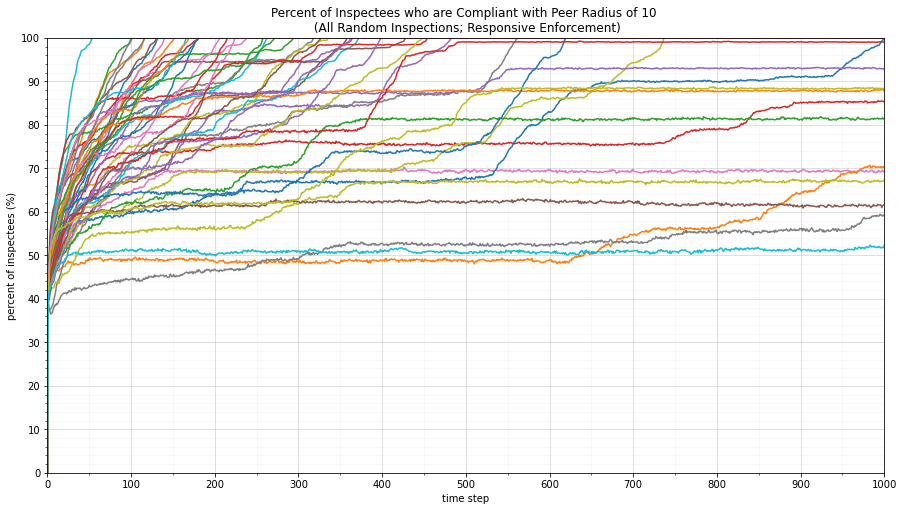

<Figure size 432x288 with 0 Axes>

In [81]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,2), minor=True)

plt.plot(rand_resp_radius_10_1['step'],rand_resp_radius_10_1['perc-compliant'])
plt.plot(rand_resp_radius_10_2['step'],rand_resp_radius_10_2['perc-compliant'])
plt.plot(rand_resp_radius_10_3['step'],rand_resp_radius_10_3['perc-compliant'])
plt.plot(rand_resp_radius_10_4['step'],rand_resp_radius_10_4['perc-compliant'])
plt.plot(rand_resp_radius_10_5['step'],rand_resp_radius_10_5['perc-compliant'])
plt.plot(rand_resp_radius_10_6['step'],rand_resp_radius_10_6['perc-compliant'])
plt.plot(rand_resp_radius_10_7['step'],rand_resp_radius_10_7['perc-compliant'])
plt.plot(rand_resp_radius_10_8['step'],rand_resp_radius_10_8['perc-compliant'])
plt.plot(rand_resp_radius_10_9['step'],rand_resp_radius_10_9['perc-compliant'])
plt.plot(rand_resp_radius_10_10['step'],rand_resp_radius_10_10['perc-compliant'])
plt.plot(rand_resp_radius_10_11['step'],rand_resp_radius_10_11['perc-compliant'])
plt.plot(rand_resp_radius_10_12['step'],rand_resp_radius_10_12['perc-compliant'])
plt.plot(rand_resp_radius_10_13['step'],rand_resp_radius_10_13['perc-compliant'])
plt.plot(rand_resp_radius_10_14['step'],rand_resp_radius_10_14['perc-compliant'])
plt.plot(rand_resp_radius_10_15['step'],rand_resp_radius_10_15['perc-compliant'])
plt.plot(rand_resp_radius_10_16['step'],rand_resp_radius_10_16['perc-compliant'])
plt.plot(rand_resp_radius_10_17['step'],rand_resp_radius_10_17['perc-compliant'])
plt.plot(rand_resp_radius_10_18['step'],rand_resp_radius_10_18['perc-compliant'])
plt.plot(rand_resp_radius_10_19['step'],rand_resp_radius_10_19['perc-compliant'])
plt.plot(rand_resp_radius_10_20['step'],rand_resp_radius_10_20['perc-compliant'])
plt.plot(rand_resp_radius_10_21['step'],rand_resp_radius_10_21['perc-compliant'])
plt.plot(rand_resp_radius_10_22['step'],rand_resp_radius_10_22['perc-compliant'])
plt.plot(rand_resp_radius_10_23['step'],rand_resp_radius_10_23['perc-compliant'])
plt.plot(rand_resp_radius_10_24['step'],rand_resp_radius_10_24['perc-compliant'])
plt.plot(rand_resp_radius_10_25['step'],rand_resp_radius_10_25['perc-compliant'])
plt.plot(rand_resp_radius_10_26['step'],rand_resp_radius_10_26['perc-compliant'])
plt.plot(rand_resp_radius_10_27['step'],rand_resp_radius_10_27['perc-compliant'])
plt.plot(rand_resp_radius_10_28['step'],rand_resp_radius_10_28['perc-compliant'])
plt.plot(rand_resp_radius_10_29['step'],rand_resp_radius_10_29['perc-compliant'])
plt.plot(rand_resp_radius_10_30['step'],rand_resp_radius_10_30['perc-compliant'])
plt.plot(rand_resp_radius_10_31['step'],rand_resp_radius_10_31['perc-compliant'])
plt.plot(rand_resp_radius_10_32['step'],rand_resp_radius_10_32['perc-compliant'])
plt.plot(rand_resp_radius_10_33['step'],rand_resp_radius_10_33['perc-compliant'])
plt.plot(rand_resp_radius_10_34['step'],rand_resp_radius_10_34['perc-compliant'])
plt.plot(rand_resp_radius_10_35['step'],rand_resp_radius_10_35['perc-compliant'])
plt.plot(rand_resp_radius_10_36['step'],rand_resp_radius_10_36['perc-compliant'])
plt.plot(rand_resp_radius_10_37['step'],rand_resp_radius_10_37['perc-compliant'])
plt.plot(rand_resp_radius_10_38['step'],rand_resp_radius_10_38['perc-compliant'])
plt.plot(rand_resp_radius_10_39['step'],rand_resp_radius_10_39['perc-compliant'])
plt.plot(rand_resp_radius_10_40['step'],rand_resp_radius_10_40['perc-compliant'])
plt.plot(rand_resp_radius_10_41['step'],rand_resp_radius_10_41['perc-compliant'])
plt.plot(rand_resp_radius_10_42['step'],rand_resp_radius_10_42['perc-compliant'])
plt.plot(rand_resp_radius_10_43['step'],rand_resp_radius_10_43['perc-compliant'])
plt.plot(rand_resp_radius_10_44['step'],rand_resp_radius_10_44['perc-compliant'])
plt.plot(rand_resp_radius_10_45['step'],rand_resp_radius_10_45['perc-compliant'])
plt.plot(rand_resp_radius_10_46['step'],rand_resp_radius_10_46['perc-compliant'])
plt.plot(rand_resp_radius_10_47['step'],rand_resp_radius_10_47['perc-compliant'])
plt.plot(rand_resp_radius_10_48['step'],rand_resp_radius_10_48['perc-compliant'])
plt.plot(rand_resp_radius_10_49['step'],rand_resp_radius_10_49['perc-compliant'])
plt.plot(rand_resp_radius_10_50['step'],rand_resp_radius_10_50['perc-compliant'])


plt.title("Percent of Inspectees who are Compliant with Peer Radius of 10 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 10- Time vs. Compliant All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

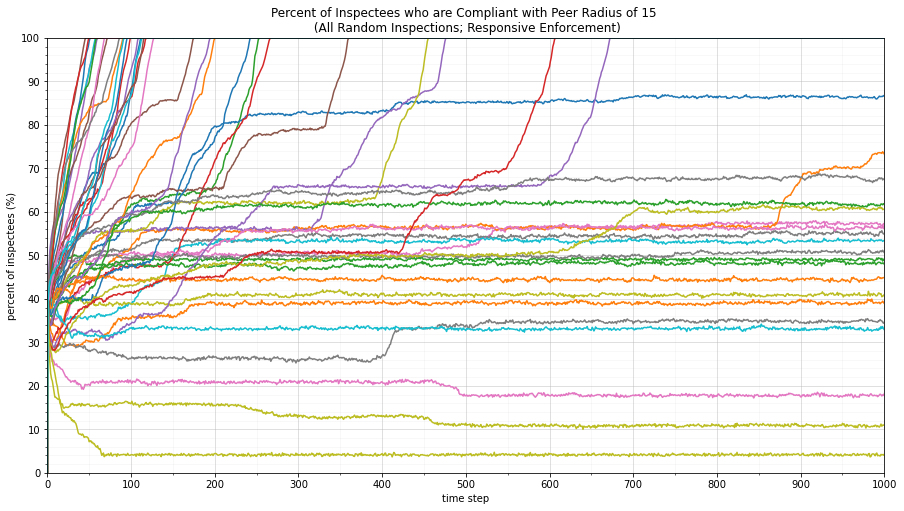

<Figure size 432x288 with 0 Axes>

In [82]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,2), minor=True)

plt.plot(rand_resp_radius_15_1['step'],rand_resp_radius_15_1['perc-compliant'])
plt.plot(rand_resp_radius_15_2['step'],rand_resp_radius_15_2['perc-compliant'])
plt.plot(rand_resp_radius_15_3['step'],rand_resp_radius_15_3['perc-compliant'])
plt.plot(rand_resp_radius_15_4['step'],rand_resp_radius_15_4['perc-compliant'])
plt.plot(rand_resp_radius_15_5['step'],rand_resp_radius_15_5['perc-compliant'])
plt.plot(rand_resp_radius_15_6['step'],rand_resp_radius_15_6['perc-compliant'])
plt.plot(rand_resp_radius_15_7['step'],rand_resp_radius_15_7['perc-compliant'])
plt.plot(rand_resp_radius_15_8['step'],rand_resp_radius_15_8['perc-compliant'])
plt.plot(rand_resp_radius_15_9['step'],rand_resp_radius_15_9['perc-compliant'])
plt.plot(rand_resp_radius_15_10['step'],rand_resp_radius_15_10['perc-compliant'])
plt.plot(rand_resp_radius_15_11['step'],rand_resp_radius_15_11['perc-compliant'])
plt.plot(rand_resp_radius_15_12['step'],rand_resp_radius_15_12['perc-compliant'])
plt.plot(rand_resp_radius_15_13['step'],rand_resp_radius_15_13['perc-compliant'])
plt.plot(rand_resp_radius_15_14['step'],rand_resp_radius_15_14['perc-compliant'])
plt.plot(rand_resp_radius_15_15['step'],rand_resp_radius_15_15['perc-compliant'])
plt.plot(rand_resp_radius_15_16['step'],rand_resp_radius_15_16['perc-compliant'])
plt.plot(rand_resp_radius_15_17['step'],rand_resp_radius_15_17['perc-compliant'])
plt.plot(rand_resp_radius_15_18['step'],rand_resp_radius_15_18['perc-compliant'])
plt.plot(rand_resp_radius_15_19['step'],rand_resp_radius_15_19['perc-compliant'])
plt.plot(rand_resp_radius_15_20['step'],rand_resp_radius_15_20['perc-compliant'])
plt.plot(rand_resp_radius_15_21['step'],rand_resp_radius_15_21['perc-compliant'])
plt.plot(rand_resp_radius_15_22['step'],rand_resp_radius_15_22['perc-compliant'])
plt.plot(rand_resp_radius_15_23['step'],rand_resp_radius_15_23['perc-compliant'])
plt.plot(rand_resp_radius_15_24['step'],rand_resp_radius_15_24['perc-compliant'])
plt.plot(rand_resp_radius_15_25['step'],rand_resp_radius_15_25['perc-compliant'])
plt.plot(rand_resp_radius_15_26['step'],rand_resp_radius_15_26['perc-compliant'])
plt.plot(rand_resp_radius_15_27['step'],rand_resp_radius_15_27['perc-compliant'])
plt.plot(rand_resp_radius_15_28['step'],rand_resp_radius_15_28['perc-compliant'])
plt.plot(rand_resp_radius_15_29['step'],rand_resp_radius_15_29['perc-compliant'])
plt.plot(rand_resp_radius_15_30['step'],rand_resp_radius_15_30['perc-compliant'])
plt.plot(rand_resp_radius_15_31['step'],rand_resp_radius_15_31['perc-compliant'])
plt.plot(rand_resp_radius_15_32['step'],rand_resp_radius_15_32['perc-compliant'])
plt.plot(rand_resp_radius_15_33['step'],rand_resp_radius_15_33['perc-compliant'])
plt.plot(rand_resp_radius_15_34['step'],rand_resp_radius_15_34['perc-compliant'])
plt.plot(rand_resp_radius_15_35['step'],rand_resp_radius_15_35['perc-compliant'])
plt.plot(rand_resp_radius_15_36['step'],rand_resp_radius_15_36['perc-compliant'])
plt.plot(rand_resp_radius_15_37['step'],rand_resp_radius_15_37['perc-compliant'])
plt.plot(rand_resp_radius_15_38['step'],rand_resp_radius_15_38['perc-compliant'])
plt.plot(rand_resp_radius_15_39['step'],rand_resp_radius_15_39['perc-compliant'])
plt.plot(rand_resp_radius_15_40['step'],rand_resp_radius_15_40['perc-compliant'])
plt.plot(rand_resp_radius_15_41['step'],rand_resp_radius_15_41['perc-compliant'])
plt.plot(rand_resp_radius_15_42['step'],rand_resp_radius_15_42['perc-compliant'])
plt.plot(rand_resp_radius_15_43['step'],rand_resp_radius_15_43['perc-compliant'])
plt.plot(rand_resp_radius_15_44['step'],rand_resp_radius_15_44['perc-compliant'])
plt.plot(rand_resp_radius_15_45['step'],rand_resp_radius_15_45['perc-compliant'])
plt.plot(rand_resp_radius_15_46['step'],rand_resp_radius_15_46['perc-compliant'])
plt.plot(rand_resp_radius_15_47['step'],rand_resp_radius_15_47['perc-compliant'])
plt.plot(rand_resp_radius_15_48['step'],rand_resp_radius_15_48['perc-compliant'])
plt.plot(rand_resp_radius_15_49['step'],rand_resp_radius_15_49['perc-compliant'])
plt.plot(rand_resp_radius_15_50['step'],rand_resp_radius_15_50['perc-compliant'])


plt.title("Percent of Inspectees who are Compliant with Peer Radius of 15 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 15- Time vs. Compliant All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

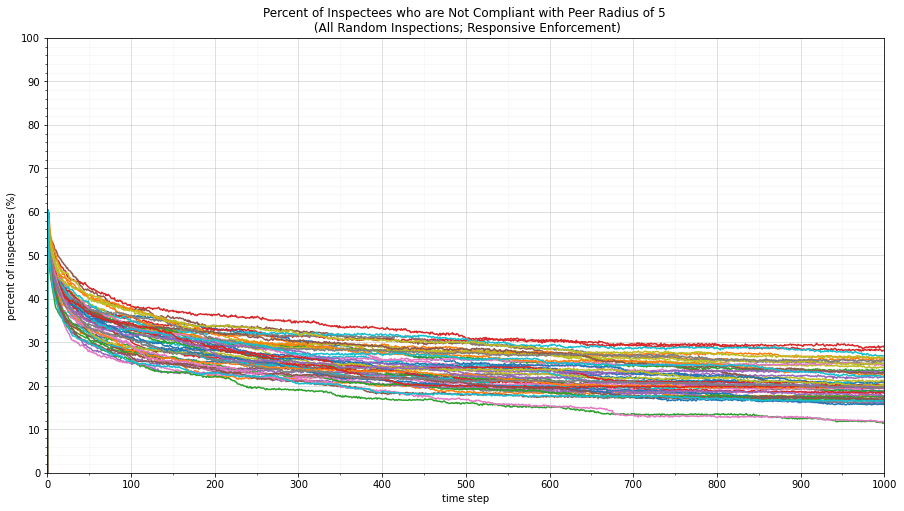

<Figure size 432x288 with 0 Axes>

In [84]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,2), minor=True)

plt.plot(rand_resp_radius_5_1['step'],rand_resp_radius_5_1['perc-noncompliant'])
plt.plot(rand_resp_radius_5_2['step'],rand_resp_radius_5_2['perc-noncompliant'])
plt.plot(rand_resp_radius_5_3['step'],rand_resp_radius_5_3['perc-noncompliant'])
plt.plot(rand_resp_radius_5_4['step'],rand_resp_radius_5_4['perc-noncompliant'])
plt.plot(rand_resp_radius_5_5['step'],rand_resp_radius_5_5['perc-noncompliant'])
plt.plot(rand_resp_radius_5_6['step'],rand_resp_radius_5_6['perc-noncompliant'])
plt.plot(rand_resp_radius_5_7['step'],rand_resp_radius_5_7['perc-noncompliant'])
plt.plot(rand_resp_radius_5_8['step'],rand_resp_radius_5_8['perc-noncompliant'])
plt.plot(rand_resp_radius_5_9['step'],rand_resp_radius_5_9['perc-noncompliant'])
plt.plot(rand_resp_radius_5_10['step'],rand_resp_radius_5_10['perc-noncompliant'])
plt.plot(rand_resp_radius_5_11['step'],rand_resp_radius_5_11['perc-noncompliant'])
plt.plot(rand_resp_radius_5_12['step'],rand_resp_radius_5_12['perc-noncompliant'])
plt.plot(rand_resp_radius_5_13['step'],rand_resp_radius_5_13['perc-noncompliant'])
plt.plot(rand_resp_radius_5_14['step'],rand_resp_radius_5_14['perc-noncompliant'])
plt.plot(rand_resp_radius_5_15['step'],rand_resp_radius_5_15['perc-noncompliant'])
plt.plot(rand_resp_radius_5_16['step'],rand_resp_radius_5_16['perc-noncompliant'])
plt.plot(rand_resp_radius_5_17['step'],rand_resp_radius_5_17['perc-noncompliant'])
plt.plot(rand_resp_radius_5_18['step'],rand_resp_radius_5_18['perc-noncompliant'])
plt.plot(rand_resp_radius_5_19['step'],rand_resp_radius_5_19['perc-noncompliant'])
plt.plot(rand_resp_radius_5_20['step'],rand_resp_radius_5_20['perc-noncompliant'])
plt.plot(rand_resp_radius_5_21['step'],rand_resp_radius_5_21['perc-noncompliant'])
plt.plot(rand_resp_radius_5_22['step'],rand_resp_radius_5_22['perc-noncompliant'])
plt.plot(rand_resp_radius_5_23['step'],rand_resp_radius_5_23['perc-noncompliant'])
plt.plot(rand_resp_radius_5_24['step'],rand_resp_radius_5_24['perc-noncompliant'])
plt.plot(rand_resp_radius_5_25['step'],rand_resp_radius_5_25['perc-noncompliant'])
plt.plot(rand_resp_radius_5_26['step'],rand_resp_radius_5_26['perc-noncompliant'])
plt.plot(rand_resp_radius_5_27['step'],rand_resp_radius_5_27['perc-noncompliant'])
plt.plot(rand_resp_radius_5_28['step'],rand_resp_radius_5_28['perc-noncompliant'])
plt.plot(rand_resp_radius_5_29['step'],rand_resp_radius_5_29['perc-noncompliant'])
plt.plot(rand_resp_radius_5_30['step'],rand_resp_radius_5_30['perc-noncompliant'])
plt.plot(rand_resp_radius_5_31['step'],rand_resp_radius_5_31['perc-noncompliant'])
plt.plot(rand_resp_radius_5_32['step'],rand_resp_radius_5_32['perc-noncompliant'])
plt.plot(rand_resp_radius_5_33['step'],rand_resp_radius_5_33['perc-noncompliant'])
plt.plot(rand_resp_radius_5_34['step'],rand_resp_radius_5_34['perc-noncompliant'])
plt.plot(rand_resp_radius_5_35['step'],rand_resp_radius_5_35['perc-noncompliant'])
plt.plot(rand_resp_radius_5_36['step'],rand_resp_radius_5_36['perc-noncompliant'])
plt.plot(rand_resp_radius_5_37['step'],rand_resp_radius_5_37['perc-noncompliant'])
plt.plot(rand_resp_radius_5_38['step'],rand_resp_radius_5_38['perc-noncompliant'])
plt.plot(rand_resp_radius_5_39['step'],rand_resp_radius_5_39['perc-noncompliant'])
plt.plot(rand_resp_radius_5_40['step'],rand_resp_radius_5_40['perc-noncompliant'])
plt.plot(rand_resp_radius_5_41['step'],rand_resp_radius_5_41['perc-noncompliant'])
plt.plot(rand_resp_radius_5_42['step'],rand_resp_radius_5_42['perc-noncompliant'])
plt.plot(rand_resp_radius_5_43['step'],rand_resp_radius_5_43['perc-noncompliant'])
plt.plot(rand_resp_radius_5_44['step'],rand_resp_radius_5_44['perc-noncompliant'])
plt.plot(rand_resp_radius_5_45['step'],rand_resp_radius_5_45['perc-noncompliant'])
plt.plot(rand_resp_radius_5_46['step'],rand_resp_radius_5_46['perc-noncompliant'])
plt.plot(rand_resp_radius_5_47['step'],rand_resp_radius_5_47['perc-noncompliant'])
plt.plot(rand_resp_radius_5_48['step'],rand_resp_radius_5_48['perc-noncompliant'])
plt.plot(rand_resp_radius_5_49['step'],rand_resp_radius_5_49['perc-noncompliant'])
plt.plot(rand_resp_radius_5_50['step'],rand_resp_radius_5_50['perc-noncompliant'])


plt.title("Percent of Inspectees who are Not Compliant with Peer Radius of 5 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Not Compliant All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

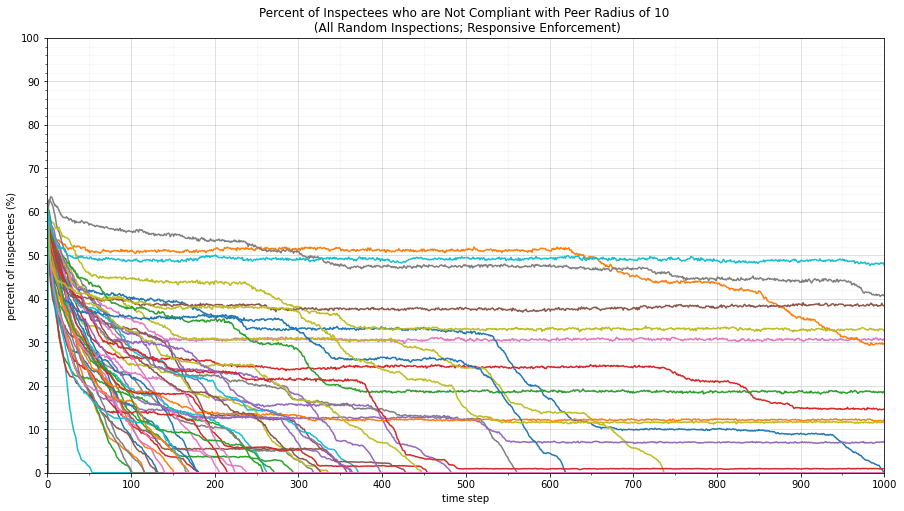

<Figure size 432x288 with 0 Axes>

In [86]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,2), minor=True)

plt.plot(rand_resp_radius_10_1['step'],rand_resp_radius_10_1['perc-noncompliant'])
plt.plot(rand_resp_radius_10_2['step'],rand_resp_radius_10_2['perc-noncompliant'])
plt.plot(rand_resp_radius_10_3['step'],rand_resp_radius_10_3['perc-noncompliant'])
plt.plot(rand_resp_radius_10_4['step'],rand_resp_radius_10_4['perc-noncompliant'])
plt.plot(rand_resp_radius_10_5['step'],rand_resp_radius_10_5['perc-noncompliant'])
plt.plot(rand_resp_radius_10_6['step'],rand_resp_radius_10_6['perc-noncompliant'])
plt.plot(rand_resp_radius_10_7['step'],rand_resp_radius_10_7['perc-noncompliant'])
plt.plot(rand_resp_radius_10_8['step'],rand_resp_radius_10_8['perc-noncompliant'])
plt.plot(rand_resp_radius_10_9['step'],rand_resp_radius_10_9['perc-noncompliant'])
plt.plot(rand_resp_radius_10_10['step'],rand_resp_radius_10_10['perc-noncompliant'])
plt.plot(rand_resp_radius_10_11['step'],rand_resp_radius_10_11['perc-noncompliant'])
plt.plot(rand_resp_radius_10_12['step'],rand_resp_radius_10_12['perc-noncompliant'])
plt.plot(rand_resp_radius_10_13['step'],rand_resp_radius_10_13['perc-noncompliant'])
plt.plot(rand_resp_radius_10_14['step'],rand_resp_radius_10_14['perc-noncompliant'])
plt.plot(rand_resp_radius_10_15['step'],rand_resp_radius_10_15['perc-noncompliant'])
plt.plot(rand_resp_radius_10_16['step'],rand_resp_radius_10_16['perc-noncompliant'])
plt.plot(rand_resp_radius_10_17['step'],rand_resp_radius_10_17['perc-noncompliant'])
plt.plot(rand_resp_radius_10_18['step'],rand_resp_radius_10_18['perc-noncompliant'])
plt.plot(rand_resp_radius_10_19['step'],rand_resp_radius_10_19['perc-noncompliant'])
plt.plot(rand_resp_radius_10_20['step'],rand_resp_radius_10_20['perc-noncompliant'])
plt.plot(rand_resp_radius_10_21['step'],rand_resp_radius_10_21['perc-noncompliant'])
plt.plot(rand_resp_radius_10_22['step'],rand_resp_radius_10_22['perc-noncompliant'])
plt.plot(rand_resp_radius_10_23['step'],rand_resp_radius_10_23['perc-noncompliant'])
plt.plot(rand_resp_radius_10_24['step'],rand_resp_radius_10_24['perc-noncompliant'])
plt.plot(rand_resp_radius_10_25['step'],rand_resp_radius_10_25['perc-noncompliant'])
plt.plot(rand_resp_radius_10_26['step'],rand_resp_radius_10_26['perc-noncompliant'])
plt.plot(rand_resp_radius_10_27['step'],rand_resp_radius_10_27['perc-noncompliant'])
plt.plot(rand_resp_radius_10_28['step'],rand_resp_radius_10_28['perc-noncompliant'])
plt.plot(rand_resp_radius_10_29['step'],rand_resp_radius_10_29['perc-noncompliant'])
plt.plot(rand_resp_radius_10_30['step'],rand_resp_radius_10_30['perc-noncompliant'])
plt.plot(rand_resp_radius_10_31['step'],rand_resp_radius_10_31['perc-noncompliant'])
plt.plot(rand_resp_radius_10_32['step'],rand_resp_radius_10_32['perc-noncompliant'])
plt.plot(rand_resp_radius_10_33['step'],rand_resp_radius_10_33['perc-noncompliant'])
plt.plot(rand_resp_radius_10_34['step'],rand_resp_radius_10_34['perc-noncompliant'])
plt.plot(rand_resp_radius_10_35['step'],rand_resp_radius_10_35['perc-noncompliant'])
plt.plot(rand_resp_radius_10_36['step'],rand_resp_radius_10_36['perc-noncompliant'])
plt.plot(rand_resp_radius_10_37['step'],rand_resp_radius_10_37['perc-noncompliant'])
plt.plot(rand_resp_radius_10_38['step'],rand_resp_radius_10_38['perc-noncompliant'])
plt.plot(rand_resp_radius_10_39['step'],rand_resp_radius_10_39['perc-noncompliant'])
plt.plot(rand_resp_radius_10_40['step'],rand_resp_radius_10_40['perc-noncompliant'])
plt.plot(rand_resp_radius_10_41['step'],rand_resp_radius_10_41['perc-noncompliant'])
plt.plot(rand_resp_radius_10_42['step'],rand_resp_radius_10_42['perc-noncompliant'])
plt.plot(rand_resp_radius_10_43['step'],rand_resp_radius_10_43['perc-noncompliant'])
plt.plot(rand_resp_radius_10_44['step'],rand_resp_radius_10_44['perc-noncompliant'])
plt.plot(rand_resp_radius_10_45['step'],rand_resp_radius_10_45['perc-noncompliant'])
plt.plot(rand_resp_radius_10_46['step'],rand_resp_radius_10_46['perc-noncompliant'])
plt.plot(rand_resp_radius_10_47['step'],rand_resp_radius_10_47['perc-noncompliant'])
plt.plot(rand_resp_radius_10_48['step'],rand_resp_radius_10_48['perc-noncompliant'])
plt.plot(rand_resp_radius_10_49['step'],rand_resp_radius_10_49['perc-noncompliant'])
plt.plot(rand_resp_radius_10_50['step'],rand_resp_radius_10_50['perc-noncompliant'])


plt.title("Percent of Inspectees who are Not Compliant with Peer Radius of 10 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 10- Time vs. Not Compliant All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

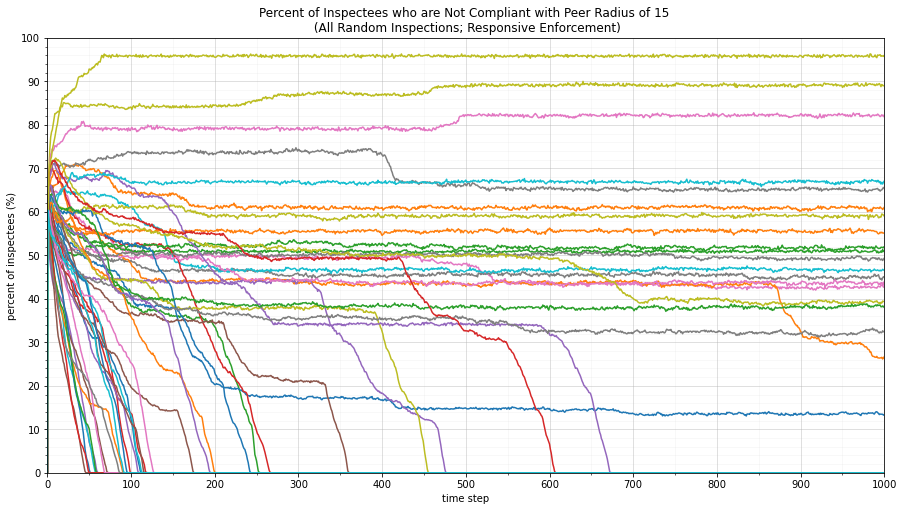

<Figure size 432x288 with 0 Axes>

In [83]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,2), minor=True)

plt.plot(rand_resp_radius_15_1['step'],rand_resp_radius_15_1['perc-noncompliant'])
plt.plot(rand_resp_radius_15_2['step'],rand_resp_radius_15_2['perc-noncompliant'])
plt.plot(rand_resp_radius_15_3['step'],rand_resp_radius_15_3['perc-noncompliant'])
plt.plot(rand_resp_radius_15_4['step'],rand_resp_radius_15_4['perc-noncompliant'])
plt.plot(rand_resp_radius_15_5['step'],rand_resp_radius_15_5['perc-noncompliant'])
plt.plot(rand_resp_radius_15_6['step'],rand_resp_radius_15_6['perc-noncompliant'])
plt.plot(rand_resp_radius_15_7['step'],rand_resp_radius_15_7['perc-noncompliant'])
plt.plot(rand_resp_radius_15_8['step'],rand_resp_radius_15_8['perc-noncompliant'])
plt.plot(rand_resp_radius_15_9['step'],rand_resp_radius_15_9['perc-noncompliant'])
plt.plot(rand_resp_radius_15_10['step'],rand_resp_radius_15_10['perc-noncompliant'])
plt.plot(rand_resp_radius_15_11['step'],rand_resp_radius_15_11['perc-noncompliant'])
plt.plot(rand_resp_radius_15_12['step'],rand_resp_radius_15_12['perc-noncompliant'])
plt.plot(rand_resp_radius_15_13['step'],rand_resp_radius_15_13['perc-noncompliant'])
plt.plot(rand_resp_radius_15_14['step'],rand_resp_radius_15_14['perc-noncompliant'])
plt.plot(rand_resp_radius_15_15['step'],rand_resp_radius_15_15['perc-noncompliant'])
plt.plot(rand_resp_radius_15_16['step'],rand_resp_radius_15_16['perc-noncompliant'])
plt.plot(rand_resp_radius_15_17['step'],rand_resp_radius_15_17['perc-noncompliant'])
plt.plot(rand_resp_radius_15_18['step'],rand_resp_radius_15_18['perc-noncompliant'])
plt.plot(rand_resp_radius_15_19['step'],rand_resp_radius_15_19['perc-noncompliant'])
plt.plot(rand_resp_radius_15_20['step'],rand_resp_radius_15_20['perc-noncompliant'])
plt.plot(rand_resp_radius_15_21['step'],rand_resp_radius_15_21['perc-noncompliant'])
plt.plot(rand_resp_radius_15_22['step'],rand_resp_radius_15_22['perc-noncompliant'])
plt.plot(rand_resp_radius_15_23['step'],rand_resp_radius_15_23['perc-noncompliant'])
plt.plot(rand_resp_radius_15_24['step'],rand_resp_radius_15_24['perc-noncompliant'])
plt.plot(rand_resp_radius_15_25['step'],rand_resp_radius_15_25['perc-noncompliant'])
plt.plot(rand_resp_radius_15_26['step'],rand_resp_radius_15_26['perc-noncompliant'])
plt.plot(rand_resp_radius_15_27['step'],rand_resp_radius_15_27['perc-noncompliant'])
plt.plot(rand_resp_radius_15_28['step'],rand_resp_radius_15_28['perc-noncompliant'])
plt.plot(rand_resp_radius_15_29['step'],rand_resp_radius_15_29['perc-noncompliant'])
plt.plot(rand_resp_radius_15_30['step'],rand_resp_radius_15_30['perc-noncompliant'])
plt.plot(rand_resp_radius_15_31['step'],rand_resp_radius_15_31['perc-noncompliant'])
plt.plot(rand_resp_radius_15_32['step'],rand_resp_radius_15_32['perc-noncompliant'])
plt.plot(rand_resp_radius_15_33['step'],rand_resp_radius_15_33['perc-noncompliant'])
plt.plot(rand_resp_radius_15_34['step'],rand_resp_radius_15_34['perc-noncompliant'])
plt.plot(rand_resp_radius_15_35['step'],rand_resp_radius_15_35['perc-noncompliant'])
plt.plot(rand_resp_radius_15_36['step'],rand_resp_radius_15_36['perc-noncompliant'])
plt.plot(rand_resp_radius_15_37['step'],rand_resp_radius_15_37['perc-noncompliant'])
plt.plot(rand_resp_radius_15_38['step'],rand_resp_radius_15_38['perc-noncompliant'])
plt.plot(rand_resp_radius_15_39['step'],rand_resp_radius_15_39['perc-noncompliant'])
plt.plot(rand_resp_radius_15_40['step'],rand_resp_radius_15_40['perc-noncompliant'])
plt.plot(rand_resp_radius_15_41['step'],rand_resp_radius_15_41['perc-noncompliant'])
plt.plot(rand_resp_radius_15_42['step'],rand_resp_radius_15_42['perc-noncompliant'])
plt.plot(rand_resp_radius_15_43['step'],rand_resp_radius_15_43['perc-noncompliant'])
plt.plot(rand_resp_radius_15_44['step'],rand_resp_radius_15_44['perc-noncompliant'])
plt.plot(rand_resp_radius_15_45['step'],rand_resp_radius_15_45['perc-noncompliant'])
plt.plot(rand_resp_radius_15_46['step'],rand_resp_radius_15_46['perc-noncompliant'])
plt.plot(rand_resp_radius_15_47['step'],rand_resp_radius_15_47['perc-noncompliant'])
plt.plot(rand_resp_radius_15_48['step'],rand_resp_radius_15_48['perc-noncompliant'])
plt.plot(rand_resp_radius_15_49['step'],rand_resp_radius_15_49['perc-noncompliant'])
plt.plot(rand_resp_radius_15_50['step'],rand_resp_radius_15_50['perc-noncompliant'])


plt.title("Percent of Inspectees who are Not Compliant with Peer Radius of 15 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 15- Time vs. Not Compliant All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

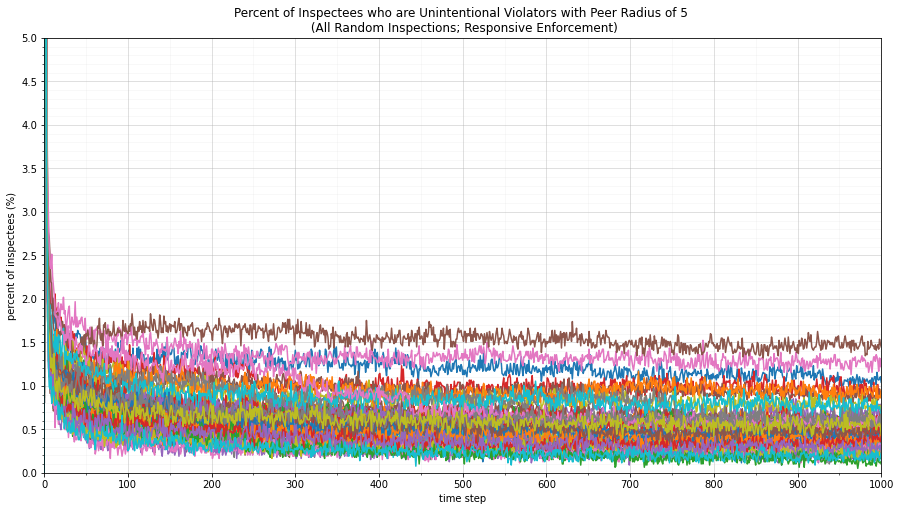

<Figure size 432x288 with 0 Axes>

In [93]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,5.1,.5))
ax.set_yticks(np.arange(0,5.1,.1), minor=True)

plt.plot(rand_resp_radius_5_1['step'],rand_resp_radius_5_1['perc-unintentional'])
plt.plot(rand_resp_radius_5_2['step'],rand_resp_radius_5_2['perc-unintentional'])
plt.plot(rand_resp_radius_5_3['step'],rand_resp_radius_5_3['perc-unintentional'])
plt.plot(rand_resp_radius_5_4['step'],rand_resp_radius_5_4['perc-unintentional'])
plt.plot(rand_resp_radius_5_5['step'],rand_resp_radius_5_5['perc-unintentional'])
plt.plot(rand_resp_radius_5_6['step'],rand_resp_radius_5_6['perc-unintentional'])
plt.plot(rand_resp_radius_5_7['step'],rand_resp_radius_5_7['perc-unintentional'])
plt.plot(rand_resp_radius_5_8['step'],rand_resp_radius_5_8['perc-unintentional'])
plt.plot(rand_resp_radius_5_9['step'],rand_resp_radius_5_9['perc-unintentional'])
plt.plot(rand_resp_radius_5_10['step'],rand_resp_radius_5_10['perc-unintentional'])
plt.plot(rand_resp_radius_5_11['step'],rand_resp_radius_5_11['perc-unintentional'])
plt.plot(rand_resp_radius_5_12['step'],rand_resp_radius_5_12['perc-unintentional'])
plt.plot(rand_resp_radius_5_13['step'],rand_resp_radius_5_13['perc-unintentional'])
plt.plot(rand_resp_radius_5_14['step'],rand_resp_radius_5_14['perc-unintentional'])
plt.plot(rand_resp_radius_5_15['step'],rand_resp_radius_5_15['perc-unintentional'])
plt.plot(rand_resp_radius_5_16['step'],rand_resp_radius_5_16['perc-unintentional'])
plt.plot(rand_resp_radius_5_17['step'],rand_resp_radius_5_17['perc-unintentional'])
plt.plot(rand_resp_radius_5_18['step'],rand_resp_radius_5_18['perc-unintentional'])
plt.plot(rand_resp_radius_5_19['step'],rand_resp_radius_5_19['perc-unintentional'])
plt.plot(rand_resp_radius_5_20['step'],rand_resp_radius_5_20['perc-unintentional'])
plt.plot(rand_resp_radius_5_21['step'],rand_resp_radius_5_21['perc-unintentional'])
plt.plot(rand_resp_radius_5_22['step'],rand_resp_radius_5_22['perc-unintentional'])
plt.plot(rand_resp_radius_5_23['step'],rand_resp_radius_5_23['perc-unintentional'])
plt.plot(rand_resp_radius_5_24['step'],rand_resp_radius_5_24['perc-unintentional'])
plt.plot(rand_resp_radius_5_25['step'],rand_resp_radius_5_25['perc-unintentional'])
plt.plot(rand_resp_radius_5_26['step'],rand_resp_radius_5_26['perc-unintentional'])
plt.plot(rand_resp_radius_5_27['step'],rand_resp_radius_5_27['perc-unintentional'])
plt.plot(rand_resp_radius_5_28['step'],rand_resp_radius_5_28['perc-unintentional'])
plt.plot(rand_resp_radius_5_29['step'],rand_resp_radius_5_29['perc-unintentional'])
plt.plot(rand_resp_radius_5_30['step'],rand_resp_radius_5_30['perc-unintentional'])
plt.plot(rand_resp_radius_5_31['step'],rand_resp_radius_5_31['perc-unintentional'])
plt.plot(rand_resp_radius_5_32['step'],rand_resp_radius_5_32['perc-unintentional'])
plt.plot(rand_resp_radius_5_33['step'],rand_resp_radius_5_33['perc-unintentional'])
plt.plot(rand_resp_radius_5_34['step'],rand_resp_radius_5_34['perc-unintentional'])
plt.plot(rand_resp_radius_5_35['step'],rand_resp_radius_5_35['perc-unintentional'])
plt.plot(rand_resp_radius_5_36['step'],rand_resp_radius_5_36['perc-unintentional'])
plt.plot(rand_resp_radius_5_37['step'],rand_resp_radius_5_37['perc-unintentional'])
plt.plot(rand_resp_radius_5_38['step'],rand_resp_radius_5_38['perc-unintentional'])
plt.plot(rand_resp_radius_5_39['step'],rand_resp_radius_5_39['perc-unintentional'])
plt.plot(rand_resp_radius_5_40['step'],rand_resp_radius_5_40['perc-unintentional'])
plt.plot(rand_resp_radius_5_41['step'],rand_resp_radius_5_41['perc-unintentional'])
plt.plot(rand_resp_radius_5_42['step'],rand_resp_radius_5_42['perc-unintentional'])
plt.plot(rand_resp_radius_5_43['step'],rand_resp_radius_5_43['perc-unintentional'])
plt.plot(rand_resp_radius_5_44['step'],rand_resp_radius_5_44['perc-unintentional'])
plt.plot(rand_resp_radius_5_45['step'],rand_resp_radius_5_45['perc-unintentional'])
plt.plot(rand_resp_radius_5_46['step'],rand_resp_radius_5_46['perc-unintentional'])
plt.plot(rand_resp_radius_5_47['step'],rand_resp_radius_5_47['perc-unintentional'])
plt.plot(rand_resp_radius_5_48['step'],rand_resp_radius_5_48['perc-unintentional'])
plt.plot(rand_resp_radius_5_49['step'],rand_resp_radius_5_49['perc-unintentional'])
plt.plot(rand_resp_radius_5_50['step'],rand_resp_radius_5_50['perc-unintentional'])


plt.title("Percent of Inspectees who are Unintentional Violators with Peer Radius of 5 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,5)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Unintentional All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

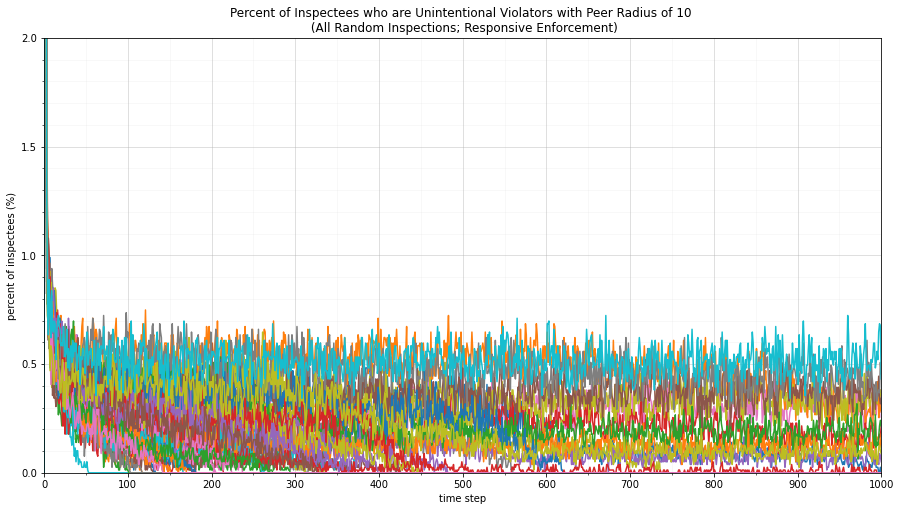

<Figure size 432x288 with 0 Axes>

In [98]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,2.1,.5))
ax.set_yticks(np.arange(0,2.1,.1), minor=True)

plt.plot(rand_resp_radius_10_1['step'],rand_resp_radius_10_1['perc-unintentional'])
plt.plot(rand_resp_radius_10_2['step'],rand_resp_radius_10_2['perc-unintentional'])
plt.plot(rand_resp_radius_10_3['step'],rand_resp_radius_10_3['perc-unintentional'])
plt.plot(rand_resp_radius_10_4['step'],rand_resp_radius_10_4['perc-unintentional'])
plt.plot(rand_resp_radius_10_5['step'],rand_resp_radius_10_5['perc-unintentional'])
plt.plot(rand_resp_radius_10_6['step'],rand_resp_radius_10_6['perc-unintentional'])
plt.plot(rand_resp_radius_10_7['step'],rand_resp_radius_10_7['perc-unintentional'])
plt.plot(rand_resp_radius_10_8['step'],rand_resp_radius_10_8['perc-unintentional'])
plt.plot(rand_resp_radius_10_9['step'],rand_resp_radius_10_9['perc-unintentional'])
plt.plot(rand_resp_radius_10_10['step'],rand_resp_radius_10_10['perc-unintentional'])
plt.plot(rand_resp_radius_10_11['step'],rand_resp_radius_10_11['perc-unintentional'])
plt.plot(rand_resp_radius_10_12['step'],rand_resp_radius_10_12['perc-unintentional'])
plt.plot(rand_resp_radius_10_13['step'],rand_resp_radius_10_13['perc-unintentional'])
plt.plot(rand_resp_radius_10_14['step'],rand_resp_radius_10_14['perc-unintentional'])
plt.plot(rand_resp_radius_10_15['step'],rand_resp_radius_10_15['perc-unintentional'])
plt.plot(rand_resp_radius_10_16['step'],rand_resp_radius_10_16['perc-unintentional'])
plt.plot(rand_resp_radius_10_17['step'],rand_resp_radius_10_17['perc-unintentional'])
plt.plot(rand_resp_radius_10_18['step'],rand_resp_radius_10_18['perc-unintentional'])
plt.plot(rand_resp_radius_10_19['step'],rand_resp_radius_10_19['perc-unintentional'])
plt.plot(rand_resp_radius_10_20['step'],rand_resp_radius_10_20['perc-unintentional'])
plt.plot(rand_resp_radius_10_21['step'],rand_resp_radius_10_21['perc-unintentional'])
plt.plot(rand_resp_radius_10_22['step'],rand_resp_radius_10_22['perc-unintentional'])
plt.plot(rand_resp_radius_10_23['step'],rand_resp_radius_10_23['perc-unintentional'])
plt.plot(rand_resp_radius_10_24['step'],rand_resp_radius_10_24['perc-unintentional'])
plt.plot(rand_resp_radius_10_25['step'],rand_resp_radius_10_25['perc-unintentional'])
plt.plot(rand_resp_radius_10_26['step'],rand_resp_radius_10_26['perc-unintentional'])
plt.plot(rand_resp_radius_10_27['step'],rand_resp_radius_10_27['perc-unintentional'])
plt.plot(rand_resp_radius_10_28['step'],rand_resp_radius_10_28['perc-unintentional'])
plt.plot(rand_resp_radius_10_29['step'],rand_resp_radius_10_29['perc-unintentional'])
plt.plot(rand_resp_radius_10_30['step'],rand_resp_radius_10_30['perc-unintentional'])
plt.plot(rand_resp_radius_10_31['step'],rand_resp_radius_10_31['perc-unintentional'])
plt.plot(rand_resp_radius_10_32['step'],rand_resp_radius_10_32['perc-unintentional'])
plt.plot(rand_resp_radius_10_33['step'],rand_resp_radius_10_33['perc-unintentional'])
plt.plot(rand_resp_radius_10_34['step'],rand_resp_radius_10_34['perc-unintentional'])
plt.plot(rand_resp_radius_10_35['step'],rand_resp_radius_10_35['perc-unintentional'])
plt.plot(rand_resp_radius_10_36['step'],rand_resp_radius_10_36['perc-unintentional'])
plt.plot(rand_resp_radius_10_37['step'],rand_resp_radius_10_37['perc-unintentional'])
plt.plot(rand_resp_radius_10_38['step'],rand_resp_radius_10_38['perc-unintentional'])
plt.plot(rand_resp_radius_10_39['step'],rand_resp_radius_10_39['perc-unintentional'])
plt.plot(rand_resp_radius_10_40['step'],rand_resp_radius_10_40['perc-unintentional'])
plt.plot(rand_resp_radius_10_41['step'],rand_resp_radius_10_41['perc-unintentional'])
plt.plot(rand_resp_radius_10_42['step'],rand_resp_radius_10_42['perc-unintentional'])
plt.plot(rand_resp_radius_10_43['step'],rand_resp_radius_10_43['perc-unintentional'])
plt.plot(rand_resp_radius_10_44['step'],rand_resp_radius_10_44['perc-unintentional'])
plt.plot(rand_resp_radius_10_45['step'],rand_resp_radius_10_45['perc-unintentional'])
plt.plot(rand_resp_radius_10_46['step'],rand_resp_radius_10_46['perc-unintentional'])
plt.plot(rand_resp_radius_10_47['step'],rand_resp_radius_10_47['perc-unintentional'])
plt.plot(rand_resp_radius_10_48['step'],rand_resp_radius_10_48['perc-unintentional'])
plt.plot(rand_resp_radius_10_49['step'],rand_resp_radius_10_49['perc-unintentional'])
plt.plot(rand_resp_radius_10_50['step'],rand_resp_radius_10_50['perc-unintentional'])


plt.title("Percent of Inspectees who are Unintentional Violators with Peer Radius of 10 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,2)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 10- Time vs. Unintentional All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

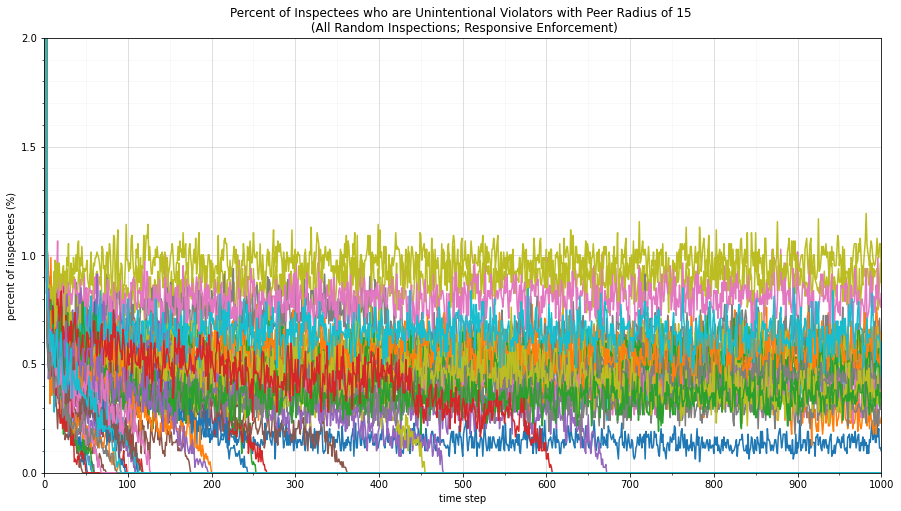

<Figure size 432x288 with 0 Axes>

In [96]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,2.1,.5))
ax.set_yticks(np.arange(0,2.1,.1), minor=True)

plt.plot(rand_resp_radius_15_1['step'],rand_resp_radius_15_1['perc-unintentional'])
plt.plot(rand_resp_radius_15_2['step'],rand_resp_radius_15_2['perc-unintentional'])
plt.plot(rand_resp_radius_15_3['step'],rand_resp_radius_15_3['perc-unintentional'])
plt.plot(rand_resp_radius_15_4['step'],rand_resp_radius_15_4['perc-unintentional'])
plt.plot(rand_resp_radius_15_5['step'],rand_resp_radius_15_5['perc-unintentional'])
plt.plot(rand_resp_radius_15_6['step'],rand_resp_radius_15_6['perc-unintentional'])
plt.plot(rand_resp_radius_15_7['step'],rand_resp_radius_15_7['perc-unintentional'])
plt.plot(rand_resp_radius_15_8['step'],rand_resp_radius_15_8['perc-unintentional'])
plt.plot(rand_resp_radius_15_9['step'],rand_resp_radius_15_9['perc-unintentional'])
plt.plot(rand_resp_radius_15_10['step'],rand_resp_radius_15_10['perc-unintentional'])
plt.plot(rand_resp_radius_15_11['step'],rand_resp_radius_15_11['perc-unintentional'])
plt.plot(rand_resp_radius_15_12['step'],rand_resp_radius_15_12['perc-unintentional'])
plt.plot(rand_resp_radius_15_13['step'],rand_resp_radius_15_13['perc-unintentional'])
plt.plot(rand_resp_radius_15_14['step'],rand_resp_radius_15_14['perc-unintentional'])
plt.plot(rand_resp_radius_15_15['step'],rand_resp_radius_15_15['perc-unintentional'])
plt.plot(rand_resp_radius_15_16['step'],rand_resp_radius_15_16['perc-unintentional'])
plt.plot(rand_resp_radius_15_17['step'],rand_resp_radius_15_17['perc-unintentional'])
plt.plot(rand_resp_radius_15_18['step'],rand_resp_radius_15_18['perc-unintentional'])
plt.plot(rand_resp_radius_15_19['step'],rand_resp_radius_15_19['perc-unintentional'])
plt.plot(rand_resp_radius_15_20['step'],rand_resp_radius_15_20['perc-unintentional'])
plt.plot(rand_resp_radius_15_21['step'],rand_resp_radius_15_21['perc-unintentional'])
plt.plot(rand_resp_radius_15_22['step'],rand_resp_radius_15_22['perc-unintentional'])
plt.plot(rand_resp_radius_15_23['step'],rand_resp_radius_15_23['perc-unintentional'])
plt.plot(rand_resp_radius_15_24['step'],rand_resp_radius_15_24['perc-unintentional'])
plt.plot(rand_resp_radius_15_25['step'],rand_resp_radius_15_25['perc-unintentional'])
plt.plot(rand_resp_radius_15_26['step'],rand_resp_radius_15_26['perc-unintentional'])
plt.plot(rand_resp_radius_15_27['step'],rand_resp_radius_15_27['perc-unintentional'])
plt.plot(rand_resp_radius_15_28['step'],rand_resp_radius_15_28['perc-unintentional'])
plt.plot(rand_resp_radius_15_29['step'],rand_resp_radius_15_29['perc-unintentional'])
plt.plot(rand_resp_radius_15_30['step'],rand_resp_radius_15_30['perc-unintentional'])
plt.plot(rand_resp_radius_15_31['step'],rand_resp_radius_15_31['perc-unintentional'])
plt.plot(rand_resp_radius_15_32['step'],rand_resp_radius_15_32['perc-unintentional'])
plt.plot(rand_resp_radius_15_33['step'],rand_resp_radius_15_33['perc-unintentional'])
plt.plot(rand_resp_radius_15_34['step'],rand_resp_radius_15_34['perc-unintentional'])
plt.plot(rand_resp_radius_15_35['step'],rand_resp_radius_15_35['perc-unintentional'])
plt.plot(rand_resp_radius_15_36['step'],rand_resp_radius_15_36['perc-unintentional'])
plt.plot(rand_resp_radius_15_37['step'],rand_resp_radius_15_37['perc-unintentional'])
plt.plot(rand_resp_radius_15_38['step'],rand_resp_radius_15_38['perc-unintentional'])
plt.plot(rand_resp_radius_15_39['step'],rand_resp_radius_15_39['perc-unintentional'])
plt.plot(rand_resp_radius_15_40['step'],rand_resp_radius_15_40['perc-unintentional'])
plt.plot(rand_resp_radius_15_41['step'],rand_resp_radius_15_41['perc-unintentional'])
plt.plot(rand_resp_radius_15_42['step'],rand_resp_radius_15_42['perc-unintentional'])
plt.plot(rand_resp_radius_15_43['step'],rand_resp_radius_15_43['perc-unintentional'])
plt.plot(rand_resp_radius_15_44['step'],rand_resp_radius_15_44['perc-unintentional'])
plt.plot(rand_resp_radius_15_45['step'],rand_resp_radius_15_45['perc-unintentional'])
plt.plot(rand_resp_radius_15_46['step'],rand_resp_radius_15_46['perc-unintentional'])
plt.plot(rand_resp_radius_15_47['step'],rand_resp_radius_15_47['perc-unintentional'])
plt.plot(rand_resp_radius_15_48['step'],rand_resp_radius_15_48['perc-unintentional'])
plt.plot(rand_resp_radius_15_49['step'],rand_resp_radius_15_49['perc-unintentional'])
plt.plot(rand_resp_radius_15_50['step'],rand_resp_radius_15_50['perc-unintentional'])


plt.title("Percent of Inspectees who are Unintentional Violators with Peer Radius of 15 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,2)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 15- Time vs. Unintentional All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

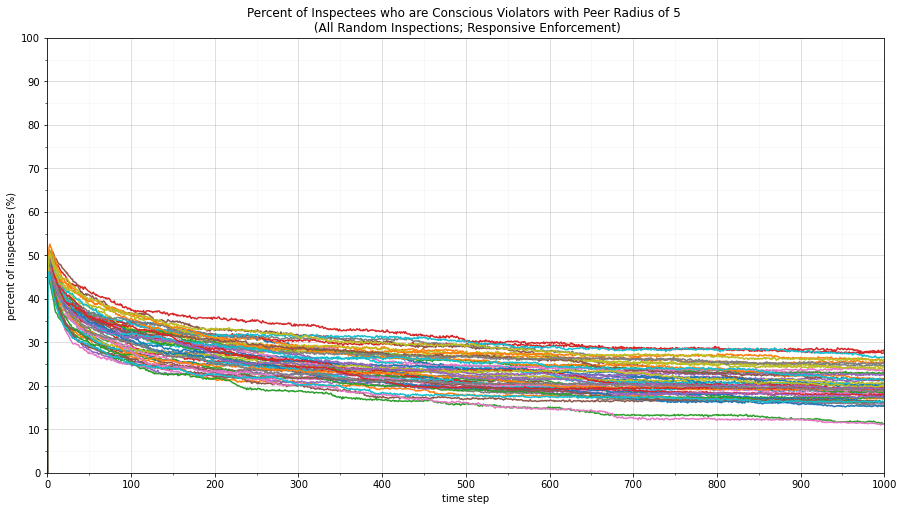

<Figure size 432x288 with 0 Axes>

In [101]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_5_1['step'],rand_resp_radius_5_1['perc-conscious'])
plt.plot(rand_resp_radius_5_2['step'],rand_resp_radius_5_2['perc-conscious'])
plt.plot(rand_resp_radius_5_3['step'],rand_resp_radius_5_3['perc-conscious'])
plt.plot(rand_resp_radius_5_4['step'],rand_resp_radius_5_4['perc-conscious'])
plt.plot(rand_resp_radius_5_5['step'],rand_resp_radius_5_5['perc-conscious'])
plt.plot(rand_resp_radius_5_6['step'],rand_resp_radius_5_6['perc-conscious'])
plt.plot(rand_resp_radius_5_7['step'],rand_resp_radius_5_7['perc-conscious'])
plt.plot(rand_resp_radius_5_8['step'],rand_resp_radius_5_8['perc-conscious'])
plt.plot(rand_resp_radius_5_9['step'],rand_resp_radius_5_9['perc-conscious'])
plt.plot(rand_resp_radius_5_10['step'],rand_resp_radius_5_10['perc-conscious'])
plt.plot(rand_resp_radius_5_11['step'],rand_resp_radius_5_11['perc-conscious'])
plt.plot(rand_resp_radius_5_12['step'],rand_resp_radius_5_12['perc-conscious'])
plt.plot(rand_resp_radius_5_13['step'],rand_resp_radius_5_13['perc-conscious'])
plt.plot(rand_resp_radius_5_14['step'],rand_resp_radius_5_14['perc-conscious'])
plt.plot(rand_resp_radius_5_15['step'],rand_resp_radius_5_15['perc-conscious'])
plt.plot(rand_resp_radius_5_16['step'],rand_resp_radius_5_16['perc-conscious'])
plt.plot(rand_resp_radius_5_17['step'],rand_resp_radius_5_17['perc-conscious'])
plt.plot(rand_resp_radius_5_18['step'],rand_resp_radius_5_18['perc-conscious'])
plt.plot(rand_resp_radius_5_19['step'],rand_resp_radius_5_19['perc-conscious'])
plt.plot(rand_resp_radius_5_20['step'],rand_resp_radius_5_20['perc-conscious'])
plt.plot(rand_resp_radius_5_21['step'],rand_resp_radius_5_21['perc-conscious'])
plt.plot(rand_resp_radius_5_22['step'],rand_resp_radius_5_22['perc-conscious'])
plt.plot(rand_resp_radius_5_23['step'],rand_resp_radius_5_23['perc-conscious'])
plt.plot(rand_resp_radius_5_24['step'],rand_resp_radius_5_24['perc-conscious'])
plt.plot(rand_resp_radius_5_25['step'],rand_resp_radius_5_25['perc-conscious'])
plt.plot(rand_resp_radius_5_26['step'],rand_resp_radius_5_26['perc-conscious'])
plt.plot(rand_resp_radius_5_27['step'],rand_resp_radius_5_27['perc-conscious'])
plt.plot(rand_resp_radius_5_28['step'],rand_resp_radius_5_28['perc-conscious'])
plt.plot(rand_resp_radius_5_29['step'],rand_resp_radius_5_29['perc-conscious'])
plt.plot(rand_resp_radius_5_30['step'],rand_resp_radius_5_30['perc-conscious'])
plt.plot(rand_resp_radius_5_31['step'],rand_resp_radius_5_31['perc-conscious'])
plt.plot(rand_resp_radius_5_32['step'],rand_resp_radius_5_32['perc-conscious'])
plt.plot(rand_resp_radius_5_33['step'],rand_resp_radius_5_33['perc-conscious'])
plt.plot(rand_resp_radius_5_34['step'],rand_resp_radius_5_34['perc-conscious'])
plt.plot(rand_resp_radius_5_35['step'],rand_resp_radius_5_35['perc-conscious'])
plt.plot(rand_resp_radius_5_36['step'],rand_resp_radius_5_36['perc-conscious'])
plt.plot(rand_resp_radius_5_37['step'],rand_resp_radius_5_37['perc-conscious'])
plt.plot(rand_resp_radius_5_38['step'],rand_resp_radius_5_38['perc-conscious'])
plt.plot(rand_resp_radius_5_39['step'],rand_resp_radius_5_39['perc-conscious'])
plt.plot(rand_resp_radius_5_40['step'],rand_resp_radius_5_40['perc-conscious'])
plt.plot(rand_resp_radius_5_41['step'],rand_resp_radius_5_41['perc-conscious'])
plt.plot(rand_resp_radius_5_42['step'],rand_resp_radius_5_42['perc-conscious'])
plt.plot(rand_resp_radius_5_43['step'],rand_resp_radius_5_43['perc-conscious'])
plt.plot(rand_resp_radius_5_44['step'],rand_resp_radius_5_44['perc-conscious'])
plt.plot(rand_resp_radius_5_45['step'],rand_resp_radius_5_45['perc-conscious'])
plt.plot(rand_resp_radius_5_46['step'],rand_resp_radius_5_46['perc-conscious'])
plt.plot(rand_resp_radius_5_47['step'],rand_resp_radius_5_47['perc-conscious'])
plt.plot(rand_resp_radius_5_48['step'],rand_resp_radius_5_48['perc-conscious'])
plt.plot(rand_resp_radius_5_49['step'],rand_resp_radius_5_49['perc-conscious'])
plt.plot(rand_resp_radius_5_50['step'],rand_resp_radius_5_50['perc-conscious'])


plt.title("Percent of Inspectees who are Conscious Violators with Peer Radius of 5 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Conscious All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

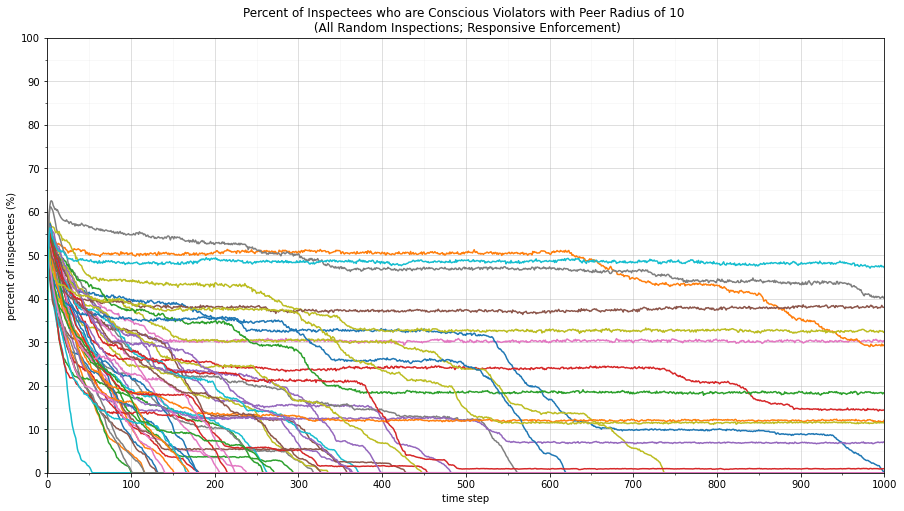

<Figure size 432x288 with 0 Axes>

In [102]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_10_1['step'],rand_resp_radius_10_1['perc-conscious'])
plt.plot(rand_resp_radius_10_2['step'],rand_resp_radius_10_2['perc-conscious'])
plt.plot(rand_resp_radius_10_3['step'],rand_resp_radius_10_3['perc-conscious'])
plt.plot(rand_resp_radius_10_4['step'],rand_resp_radius_10_4['perc-conscious'])
plt.plot(rand_resp_radius_10_5['step'],rand_resp_radius_10_5['perc-conscious'])
plt.plot(rand_resp_radius_10_6['step'],rand_resp_radius_10_6['perc-conscious'])
plt.plot(rand_resp_radius_10_7['step'],rand_resp_radius_10_7['perc-conscious'])
plt.plot(rand_resp_radius_10_8['step'],rand_resp_radius_10_8['perc-conscious'])
plt.plot(rand_resp_radius_10_9['step'],rand_resp_radius_10_9['perc-conscious'])
plt.plot(rand_resp_radius_10_10['step'],rand_resp_radius_10_10['perc-conscious'])
plt.plot(rand_resp_radius_10_11['step'],rand_resp_radius_10_11['perc-conscious'])
plt.plot(rand_resp_radius_10_12['step'],rand_resp_radius_10_12['perc-conscious'])
plt.plot(rand_resp_radius_10_13['step'],rand_resp_radius_10_13['perc-conscious'])
plt.plot(rand_resp_radius_10_14['step'],rand_resp_radius_10_14['perc-conscious'])
plt.plot(rand_resp_radius_10_15['step'],rand_resp_radius_10_15['perc-conscious'])
plt.plot(rand_resp_radius_10_16['step'],rand_resp_radius_10_16['perc-conscious'])
plt.plot(rand_resp_radius_10_17['step'],rand_resp_radius_10_17['perc-conscious'])
plt.plot(rand_resp_radius_10_18['step'],rand_resp_radius_10_18['perc-conscious'])
plt.plot(rand_resp_radius_10_19['step'],rand_resp_radius_10_19['perc-conscious'])
plt.plot(rand_resp_radius_10_20['step'],rand_resp_radius_10_20['perc-conscious'])
plt.plot(rand_resp_radius_10_21['step'],rand_resp_radius_10_21['perc-conscious'])
plt.plot(rand_resp_radius_10_22['step'],rand_resp_radius_10_22['perc-conscious'])
plt.plot(rand_resp_radius_10_23['step'],rand_resp_radius_10_23['perc-conscious'])
plt.plot(rand_resp_radius_10_24['step'],rand_resp_radius_10_24['perc-conscious'])
plt.plot(rand_resp_radius_10_25['step'],rand_resp_radius_10_25['perc-conscious'])
plt.plot(rand_resp_radius_10_26['step'],rand_resp_radius_10_26['perc-conscious'])
plt.plot(rand_resp_radius_10_27['step'],rand_resp_radius_10_27['perc-conscious'])
plt.plot(rand_resp_radius_10_28['step'],rand_resp_radius_10_28['perc-conscious'])
plt.plot(rand_resp_radius_10_29['step'],rand_resp_radius_10_29['perc-conscious'])
plt.plot(rand_resp_radius_10_30['step'],rand_resp_radius_10_30['perc-conscious'])
plt.plot(rand_resp_radius_10_31['step'],rand_resp_radius_10_31['perc-conscious'])
plt.plot(rand_resp_radius_10_32['step'],rand_resp_radius_10_32['perc-conscious'])
plt.plot(rand_resp_radius_10_33['step'],rand_resp_radius_10_33['perc-conscious'])
plt.plot(rand_resp_radius_10_34['step'],rand_resp_radius_10_34['perc-conscious'])
plt.plot(rand_resp_radius_10_35['step'],rand_resp_radius_10_35['perc-conscious'])
plt.plot(rand_resp_radius_10_36['step'],rand_resp_radius_10_36['perc-conscious'])
plt.plot(rand_resp_radius_10_37['step'],rand_resp_radius_10_37['perc-conscious'])
plt.plot(rand_resp_radius_10_38['step'],rand_resp_radius_10_38['perc-conscious'])
plt.plot(rand_resp_radius_10_39['step'],rand_resp_radius_10_39['perc-conscious'])
plt.plot(rand_resp_radius_10_40['step'],rand_resp_radius_10_40['perc-conscious'])
plt.plot(rand_resp_radius_10_41['step'],rand_resp_radius_10_41['perc-conscious'])
plt.plot(rand_resp_radius_10_42['step'],rand_resp_radius_10_42['perc-conscious'])
plt.plot(rand_resp_radius_10_43['step'],rand_resp_radius_10_43['perc-conscious'])
plt.plot(rand_resp_radius_10_44['step'],rand_resp_radius_10_44['perc-conscious'])
plt.plot(rand_resp_radius_10_45['step'],rand_resp_radius_10_45['perc-conscious'])
plt.plot(rand_resp_radius_10_46['step'],rand_resp_radius_10_46['perc-conscious'])
plt.plot(rand_resp_radius_10_47['step'],rand_resp_radius_10_47['perc-conscious'])
plt.plot(rand_resp_radius_10_48['step'],rand_resp_radius_10_48['perc-conscious'])
plt.plot(rand_resp_radius_10_49['step'],rand_resp_radius_10_49['perc-conscious'])
plt.plot(rand_resp_radius_10_50['step'],rand_resp_radius_10_50['perc-conscious'])


plt.title("Percent of Inspectees who are Conscious Violators with Peer Radius of 10 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 10- Time vs. Conscious All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

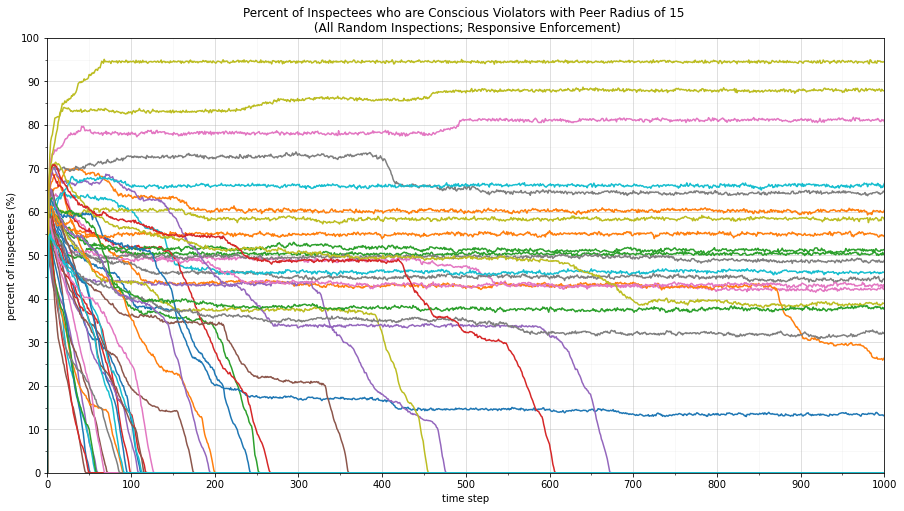

<Figure size 432x288 with 0 Axes>

In [104]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(rand_resp_radius_15_1['step'],rand_resp_radius_15_1['perc-conscious'])
plt.plot(rand_resp_radius_15_2['step'],rand_resp_radius_15_2['perc-conscious'])
plt.plot(rand_resp_radius_15_3['step'],rand_resp_radius_15_3['perc-conscious'])
plt.plot(rand_resp_radius_15_4['step'],rand_resp_radius_15_4['perc-conscious'])
plt.plot(rand_resp_radius_15_5['step'],rand_resp_radius_15_5['perc-conscious'])
plt.plot(rand_resp_radius_15_6['step'],rand_resp_radius_15_6['perc-conscious'])
plt.plot(rand_resp_radius_15_7['step'],rand_resp_radius_15_7['perc-conscious'])
plt.plot(rand_resp_radius_15_8['step'],rand_resp_radius_15_8['perc-conscious'])
plt.plot(rand_resp_radius_15_9['step'],rand_resp_radius_15_9['perc-conscious'])
plt.plot(rand_resp_radius_15_10['step'],rand_resp_radius_15_10['perc-conscious'])
plt.plot(rand_resp_radius_15_11['step'],rand_resp_radius_15_11['perc-conscious'])
plt.plot(rand_resp_radius_15_12['step'],rand_resp_radius_15_12['perc-conscious'])
plt.plot(rand_resp_radius_15_13['step'],rand_resp_radius_15_13['perc-conscious'])
plt.plot(rand_resp_radius_15_14['step'],rand_resp_radius_15_14['perc-conscious'])
plt.plot(rand_resp_radius_15_15['step'],rand_resp_radius_15_15['perc-conscious'])
plt.plot(rand_resp_radius_15_16['step'],rand_resp_radius_15_16['perc-conscious'])
plt.plot(rand_resp_radius_15_17['step'],rand_resp_radius_15_17['perc-conscious'])
plt.plot(rand_resp_radius_15_18['step'],rand_resp_radius_15_18['perc-conscious'])
plt.plot(rand_resp_radius_15_19['step'],rand_resp_radius_15_19['perc-conscious'])
plt.plot(rand_resp_radius_15_20['step'],rand_resp_radius_15_20['perc-conscious'])
plt.plot(rand_resp_radius_15_21['step'],rand_resp_radius_15_21['perc-conscious'])
plt.plot(rand_resp_radius_15_22['step'],rand_resp_radius_15_22['perc-conscious'])
plt.plot(rand_resp_radius_15_23['step'],rand_resp_radius_15_23['perc-conscious'])
plt.plot(rand_resp_radius_15_24['step'],rand_resp_radius_15_24['perc-conscious'])
plt.plot(rand_resp_radius_15_25['step'],rand_resp_radius_15_25['perc-conscious'])
plt.plot(rand_resp_radius_15_26['step'],rand_resp_radius_15_26['perc-conscious'])
plt.plot(rand_resp_radius_15_27['step'],rand_resp_radius_15_27['perc-conscious'])
plt.plot(rand_resp_radius_15_28['step'],rand_resp_radius_15_28['perc-conscious'])
plt.plot(rand_resp_radius_15_29['step'],rand_resp_radius_15_29['perc-conscious'])
plt.plot(rand_resp_radius_15_30['step'],rand_resp_radius_15_30['perc-conscious'])
plt.plot(rand_resp_radius_15_31['step'],rand_resp_radius_15_31['perc-conscious'])
plt.plot(rand_resp_radius_15_32['step'],rand_resp_radius_15_32['perc-conscious'])
plt.plot(rand_resp_radius_15_33['step'],rand_resp_radius_15_33['perc-conscious'])
plt.plot(rand_resp_radius_15_34['step'],rand_resp_radius_15_34['perc-conscious'])
plt.plot(rand_resp_radius_15_35['step'],rand_resp_radius_15_35['perc-conscious'])
plt.plot(rand_resp_radius_15_36['step'],rand_resp_radius_15_36['perc-conscious'])
plt.plot(rand_resp_radius_15_37['step'],rand_resp_radius_15_37['perc-conscious'])
plt.plot(rand_resp_radius_15_38['step'],rand_resp_radius_15_38['perc-conscious'])
plt.plot(rand_resp_radius_15_39['step'],rand_resp_radius_15_39['perc-conscious'])
plt.plot(rand_resp_radius_15_40['step'],rand_resp_radius_15_40['perc-conscious'])
plt.plot(rand_resp_radius_15_41['step'],rand_resp_radius_15_41['perc-conscious'])
plt.plot(rand_resp_radius_15_42['step'],rand_resp_radius_15_42['perc-conscious'])
plt.plot(rand_resp_radius_15_43['step'],rand_resp_radius_15_43['perc-conscious'])
plt.plot(rand_resp_radius_15_44['step'],rand_resp_radius_15_44['perc-conscious'])
plt.plot(rand_resp_radius_15_45['step'],rand_resp_radius_15_45['perc-conscious'])
plt.plot(rand_resp_radius_15_46['step'],rand_resp_radius_15_46['perc-conscious'])
plt.plot(rand_resp_radius_15_47['step'],rand_resp_radius_15_47['perc-conscious'])
plt.plot(rand_resp_radius_15_48['step'],rand_resp_radius_15_48['perc-conscious'])
plt.plot(rand_resp_radius_15_49['step'],rand_resp_radius_15_49['perc-conscious'])
plt.plot(rand_resp_radius_15_50['step'],rand_resp_radius_15_50['perc-conscious'])


plt.title("Percent of Inspectees who are Conscious Violators with Peer Radius of 15 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 15- Time vs. Conscious All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

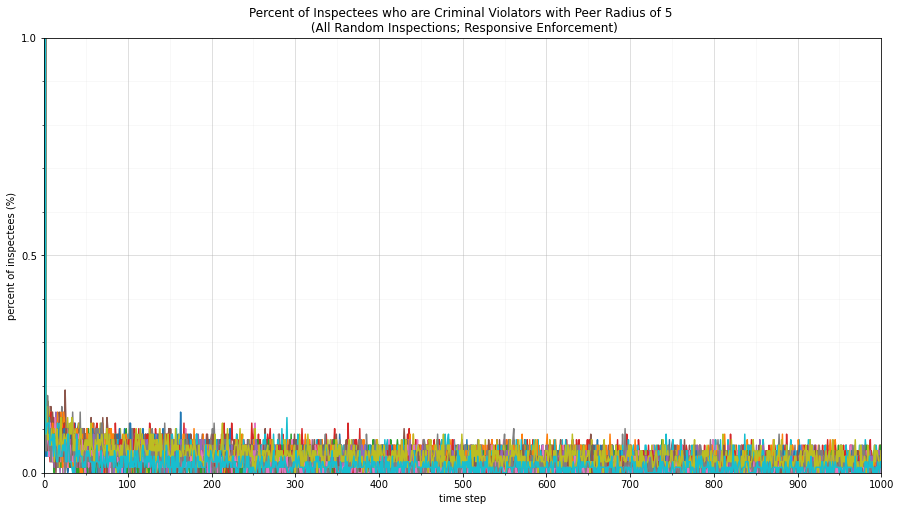

<Figure size 432x288 with 0 Axes>

In [107]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.1,.5))
ax.set_yticks(np.arange(0,1.1,.1), minor=True)

plt.plot(rand_resp_radius_5_1['step'],rand_resp_radius_5_1['perc-criminal'])
plt.plot(rand_resp_radius_5_2['step'],rand_resp_radius_5_2['perc-criminal'])
plt.plot(rand_resp_radius_5_3['step'],rand_resp_radius_5_3['perc-criminal'])
plt.plot(rand_resp_radius_5_4['step'],rand_resp_radius_5_4['perc-criminal'])
plt.plot(rand_resp_radius_5_5['step'],rand_resp_radius_5_5['perc-criminal'])
plt.plot(rand_resp_radius_5_6['step'],rand_resp_radius_5_6['perc-criminal'])
plt.plot(rand_resp_radius_5_7['step'],rand_resp_radius_5_7['perc-criminal'])
plt.plot(rand_resp_radius_5_8['step'],rand_resp_radius_5_8['perc-criminal'])
plt.plot(rand_resp_radius_5_9['step'],rand_resp_radius_5_9['perc-criminal'])
plt.plot(rand_resp_radius_5_10['step'],rand_resp_radius_5_10['perc-criminal'])
plt.plot(rand_resp_radius_5_11['step'],rand_resp_radius_5_11['perc-criminal'])
plt.plot(rand_resp_radius_5_12['step'],rand_resp_radius_5_12['perc-criminal'])
plt.plot(rand_resp_radius_5_13['step'],rand_resp_radius_5_13['perc-criminal'])
plt.plot(rand_resp_radius_5_14['step'],rand_resp_radius_5_14['perc-criminal'])
plt.plot(rand_resp_radius_5_15['step'],rand_resp_radius_5_15['perc-criminal'])
plt.plot(rand_resp_radius_5_16['step'],rand_resp_radius_5_16['perc-criminal'])
plt.plot(rand_resp_radius_5_17['step'],rand_resp_radius_5_17['perc-criminal'])
plt.plot(rand_resp_radius_5_18['step'],rand_resp_radius_5_18['perc-criminal'])
plt.plot(rand_resp_radius_5_19['step'],rand_resp_radius_5_19['perc-criminal'])
plt.plot(rand_resp_radius_5_20['step'],rand_resp_radius_5_20['perc-criminal'])
plt.plot(rand_resp_radius_5_21['step'],rand_resp_radius_5_21['perc-criminal'])
plt.plot(rand_resp_radius_5_22['step'],rand_resp_radius_5_22['perc-criminal'])
plt.plot(rand_resp_radius_5_23['step'],rand_resp_radius_5_23['perc-criminal'])
plt.plot(rand_resp_radius_5_24['step'],rand_resp_radius_5_24['perc-criminal'])
plt.plot(rand_resp_radius_5_25['step'],rand_resp_radius_5_25['perc-criminal'])
plt.plot(rand_resp_radius_5_26['step'],rand_resp_radius_5_26['perc-criminal'])
plt.plot(rand_resp_radius_5_27['step'],rand_resp_radius_5_27['perc-criminal'])
plt.plot(rand_resp_radius_5_28['step'],rand_resp_radius_5_28['perc-criminal'])
plt.plot(rand_resp_radius_5_29['step'],rand_resp_radius_5_29['perc-criminal'])
plt.plot(rand_resp_radius_5_30['step'],rand_resp_radius_5_30['perc-criminal'])
plt.plot(rand_resp_radius_5_31['step'],rand_resp_radius_5_31['perc-criminal'])
plt.plot(rand_resp_radius_5_32['step'],rand_resp_radius_5_32['perc-criminal'])
plt.plot(rand_resp_radius_5_33['step'],rand_resp_radius_5_33['perc-criminal'])
plt.plot(rand_resp_radius_5_34['step'],rand_resp_radius_5_34['perc-criminal'])
plt.plot(rand_resp_radius_5_35['step'],rand_resp_radius_5_35['perc-criminal'])
plt.plot(rand_resp_radius_5_36['step'],rand_resp_radius_5_36['perc-criminal'])
plt.plot(rand_resp_radius_5_37['step'],rand_resp_radius_5_37['perc-criminal'])
plt.plot(rand_resp_radius_5_38['step'],rand_resp_radius_5_38['perc-criminal'])
plt.plot(rand_resp_radius_5_39['step'],rand_resp_radius_5_39['perc-criminal'])
plt.plot(rand_resp_radius_5_40['step'],rand_resp_radius_5_40['perc-criminal'])
plt.plot(rand_resp_radius_5_41['step'],rand_resp_radius_5_41['perc-criminal'])
plt.plot(rand_resp_radius_5_42['step'],rand_resp_radius_5_42['perc-criminal'])
plt.plot(rand_resp_radius_5_43['step'],rand_resp_radius_5_43['perc-criminal'])
plt.plot(rand_resp_radius_5_44['step'],rand_resp_radius_5_44['perc-criminal'])
plt.plot(rand_resp_radius_5_45['step'],rand_resp_radius_5_45['perc-criminal'])
plt.plot(rand_resp_radius_5_46['step'],rand_resp_radius_5_46['perc-criminal'])
plt.plot(rand_resp_radius_5_47['step'],rand_resp_radius_5_47['perc-criminal'])
plt.plot(rand_resp_radius_5_48['step'],rand_resp_radius_5_48['perc-criminal'])
plt.plot(rand_resp_radius_5_49['step'],rand_resp_radius_5_49['perc-criminal'])
plt.plot(rand_resp_radius_5_50['step'],rand_resp_radius_5_50['perc-criminal'])


plt.title("Percent of Inspectees who are Criminal Violators with Peer Radius of 5 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 5- Time vs. Criminal All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

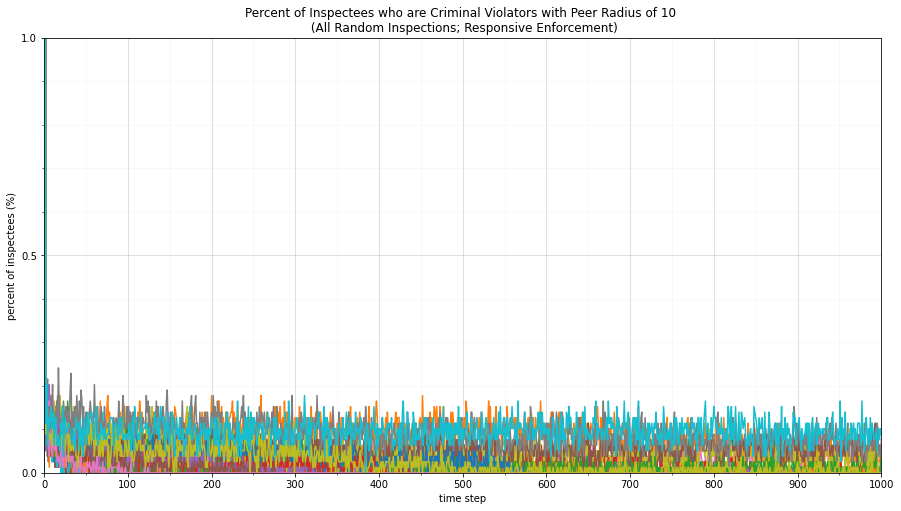

<Figure size 432x288 with 0 Axes>

In [110]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.1,.5))
ax.set_yticks(np.arange(0,1.1,.1), minor=True)

plt.plot(rand_resp_radius_10_1['step'],rand_resp_radius_10_1['perc-criminal'])
plt.plot(rand_resp_radius_10_2['step'],rand_resp_radius_10_2['perc-criminal'])
plt.plot(rand_resp_radius_10_3['step'],rand_resp_radius_10_3['perc-criminal'])
plt.plot(rand_resp_radius_10_4['step'],rand_resp_radius_10_4['perc-criminal'])
plt.plot(rand_resp_radius_10_5['step'],rand_resp_radius_10_5['perc-criminal'])
plt.plot(rand_resp_radius_10_6['step'],rand_resp_radius_10_6['perc-criminal'])
plt.plot(rand_resp_radius_10_7['step'],rand_resp_radius_10_7['perc-criminal'])
plt.plot(rand_resp_radius_10_8['step'],rand_resp_radius_10_8['perc-criminal'])
plt.plot(rand_resp_radius_10_9['step'],rand_resp_radius_10_9['perc-criminal'])
plt.plot(rand_resp_radius_10_10['step'],rand_resp_radius_10_10['perc-criminal'])
plt.plot(rand_resp_radius_10_11['step'],rand_resp_radius_10_11['perc-criminal'])
plt.plot(rand_resp_radius_10_12['step'],rand_resp_radius_10_12['perc-criminal'])
plt.plot(rand_resp_radius_10_13['step'],rand_resp_radius_10_13['perc-criminal'])
plt.plot(rand_resp_radius_10_14['step'],rand_resp_radius_10_14['perc-criminal'])
plt.plot(rand_resp_radius_10_15['step'],rand_resp_radius_10_15['perc-criminal'])
plt.plot(rand_resp_radius_10_16['step'],rand_resp_radius_10_16['perc-criminal'])
plt.plot(rand_resp_radius_10_17['step'],rand_resp_radius_10_17['perc-criminal'])
plt.plot(rand_resp_radius_10_18['step'],rand_resp_radius_10_18['perc-criminal'])
plt.plot(rand_resp_radius_10_19['step'],rand_resp_radius_10_19['perc-criminal'])
plt.plot(rand_resp_radius_10_20['step'],rand_resp_radius_10_20['perc-criminal'])
plt.plot(rand_resp_radius_10_21['step'],rand_resp_radius_10_21['perc-criminal'])
plt.plot(rand_resp_radius_10_22['step'],rand_resp_radius_10_22['perc-criminal'])
plt.plot(rand_resp_radius_10_23['step'],rand_resp_radius_10_23['perc-criminal'])
plt.plot(rand_resp_radius_10_24['step'],rand_resp_radius_10_24['perc-criminal'])
plt.plot(rand_resp_radius_10_25['step'],rand_resp_radius_10_25['perc-criminal'])
plt.plot(rand_resp_radius_10_26['step'],rand_resp_radius_10_26['perc-criminal'])
plt.plot(rand_resp_radius_10_27['step'],rand_resp_radius_10_27['perc-criminal'])
plt.plot(rand_resp_radius_10_28['step'],rand_resp_radius_10_28['perc-criminal'])
plt.plot(rand_resp_radius_10_29['step'],rand_resp_radius_10_29['perc-criminal'])
plt.plot(rand_resp_radius_10_30['step'],rand_resp_radius_10_30['perc-criminal'])
plt.plot(rand_resp_radius_10_31['step'],rand_resp_radius_10_31['perc-criminal'])
plt.plot(rand_resp_radius_10_32['step'],rand_resp_radius_10_32['perc-criminal'])
plt.plot(rand_resp_radius_10_33['step'],rand_resp_radius_10_33['perc-criminal'])
plt.plot(rand_resp_radius_10_34['step'],rand_resp_radius_10_34['perc-criminal'])
plt.plot(rand_resp_radius_10_35['step'],rand_resp_radius_10_35['perc-criminal'])
plt.plot(rand_resp_radius_10_36['step'],rand_resp_radius_10_36['perc-criminal'])
plt.plot(rand_resp_radius_10_37['step'],rand_resp_radius_10_37['perc-criminal'])
plt.plot(rand_resp_radius_10_38['step'],rand_resp_radius_10_38['perc-criminal'])
plt.plot(rand_resp_radius_10_39['step'],rand_resp_radius_10_39['perc-criminal'])
plt.plot(rand_resp_radius_10_40['step'],rand_resp_radius_10_40['perc-criminal'])
plt.plot(rand_resp_radius_10_41['step'],rand_resp_radius_10_41['perc-criminal'])
plt.plot(rand_resp_radius_10_42['step'],rand_resp_radius_10_42['perc-criminal'])
plt.plot(rand_resp_radius_10_43['step'],rand_resp_radius_10_43['perc-criminal'])
plt.plot(rand_resp_radius_10_44['step'],rand_resp_radius_10_44['perc-criminal'])
plt.plot(rand_resp_radius_10_45['step'],rand_resp_radius_10_45['perc-criminal'])
plt.plot(rand_resp_radius_10_46['step'],rand_resp_radius_10_46['perc-criminal'])
plt.plot(rand_resp_radius_10_47['step'],rand_resp_radius_10_47['perc-criminal'])
plt.plot(rand_resp_radius_10_48['step'],rand_resp_radius_10_48['perc-criminal'])
plt.plot(rand_resp_radius_10_49['step'],rand_resp_radius_10_49['perc-criminal'])
plt.plot(rand_resp_radius_10_50['step'],rand_resp_radius_10_50['perc-criminal'])


plt.title("Percent of Inspectees who are Criminal Violators with Peer Radius of 10 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 10- Time vs. Criminal All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')

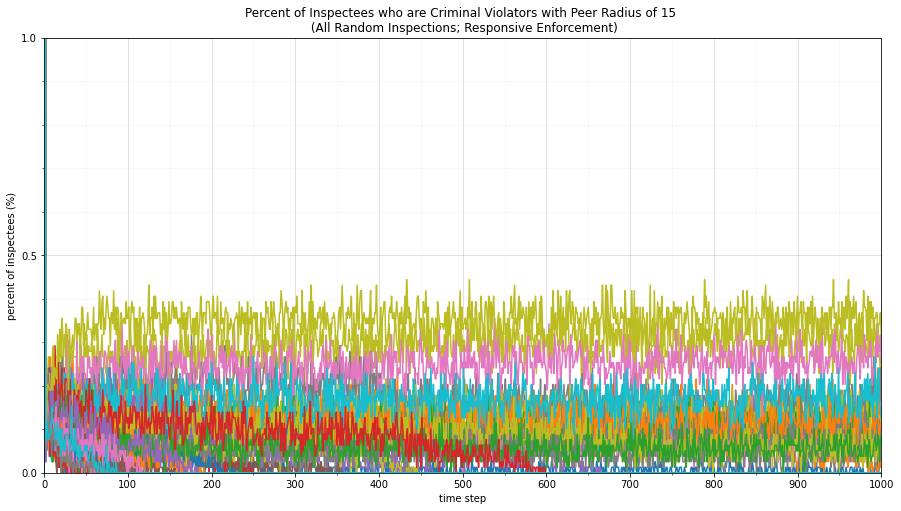

<Figure size 432x288 with 0 Axes>

In [109]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.1,.5))
ax.set_yticks(np.arange(0,1.1,.1), minor=True)

plt.plot(rand_resp_radius_15_1['step'],rand_resp_radius_15_1['perc-criminal'])
plt.plot(rand_resp_radius_15_2['step'],rand_resp_radius_15_2['perc-criminal'])
plt.plot(rand_resp_radius_15_3['step'],rand_resp_radius_15_3['perc-criminal'])
plt.plot(rand_resp_radius_15_4['step'],rand_resp_radius_15_4['perc-criminal'])
plt.plot(rand_resp_radius_15_5['step'],rand_resp_radius_15_5['perc-criminal'])
plt.plot(rand_resp_radius_15_6['step'],rand_resp_radius_15_6['perc-criminal'])
plt.plot(rand_resp_radius_15_7['step'],rand_resp_radius_15_7['perc-criminal'])
plt.plot(rand_resp_radius_15_8['step'],rand_resp_radius_15_8['perc-criminal'])
plt.plot(rand_resp_radius_15_9['step'],rand_resp_radius_15_9['perc-criminal'])
plt.plot(rand_resp_radius_15_10['step'],rand_resp_radius_15_10['perc-criminal'])
plt.plot(rand_resp_radius_15_11['step'],rand_resp_radius_15_11['perc-criminal'])
plt.plot(rand_resp_radius_15_12['step'],rand_resp_radius_15_12['perc-criminal'])
plt.plot(rand_resp_radius_15_13['step'],rand_resp_radius_15_13['perc-criminal'])
plt.plot(rand_resp_radius_15_14['step'],rand_resp_radius_15_14['perc-criminal'])
plt.plot(rand_resp_radius_15_15['step'],rand_resp_radius_15_15['perc-criminal'])
plt.plot(rand_resp_radius_15_16['step'],rand_resp_radius_15_16['perc-criminal'])
plt.plot(rand_resp_radius_15_17['step'],rand_resp_radius_15_17['perc-criminal'])
plt.plot(rand_resp_radius_15_18['step'],rand_resp_radius_15_18['perc-criminal'])
plt.plot(rand_resp_radius_15_19['step'],rand_resp_radius_15_19['perc-criminal'])
plt.plot(rand_resp_radius_15_20['step'],rand_resp_radius_15_20['perc-criminal'])
plt.plot(rand_resp_radius_15_21['step'],rand_resp_radius_15_21['perc-criminal'])
plt.plot(rand_resp_radius_15_22['step'],rand_resp_radius_15_22['perc-criminal'])
plt.plot(rand_resp_radius_15_23['step'],rand_resp_radius_15_23['perc-criminal'])
plt.plot(rand_resp_radius_15_24['step'],rand_resp_radius_15_24['perc-criminal'])
plt.plot(rand_resp_radius_15_25['step'],rand_resp_radius_15_25['perc-criminal'])
plt.plot(rand_resp_radius_15_26['step'],rand_resp_radius_15_26['perc-criminal'])
plt.plot(rand_resp_radius_15_27['step'],rand_resp_radius_15_27['perc-criminal'])
plt.plot(rand_resp_radius_15_28['step'],rand_resp_radius_15_28['perc-criminal'])
plt.plot(rand_resp_radius_15_29['step'],rand_resp_radius_15_29['perc-criminal'])
plt.plot(rand_resp_radius_15_30['step'],rand_resp_radius_15_30['perc-criminal'])
plt.plot(rand_resp_radius_15_31['step'],rand_resp_radius_15_31['perc-criminal'])
plt.plot(rand_resp_radius_15_32['step'],rand_resp_radius_15_32['perc-criminal'])
plt.plot(rand_resp_radius_15_33['step'],rand_resp_radius_15_33['perc-criminal'])
plt.plot(rand_resp_radius_15_34['step'],rand_resp_radius_15_34['perc-criminal'])
plt.plot(rand_resp_radius_15_35['step'],rand_resp_radius_15_35['perc-criminal'])
plt.plot(rand_resp_radius_15_36['step'],rand_resp_radius_15_36['perc-criminal'])
plt.plot(rand_resp_radius_15_37['step'],rand_resp_radius_15_37['perc-criminal'])
plt.plot(rand_resp_radius_15_38['step'],rand_resp_radius_15_38['perc-criminal'])
plt.plot(rand_resp_radius_15_39['step'],rand_resp_radius_15_39['perc-criminal'])
plt.plot(rand_resp_radius_15_40['step'],rand_resp_radius_15_40['perc-criminal'])
plt.plot(rand_resp_radius_15_41['step'],rand_resp_radius_15_41['perc-criminal'])
plt.plot(rand_resp_radius_15_42['step'],rand_resp_radius_15_42['perc-criminal'])
plt.plot(rand_resp_radius_15_43['step'],rand_resp_radius_15_43['perc-criminal'])
plt.plot(rand_resp_radius_15_44['step'],rand_resp_radius_15_44['perc-criminal'])
plt.plot(rand_resp_radius_15_45['step'],rand_resp_radius_15_45['perc-criminal'])
plt.plot(rand_resp_radius_15_46['step'],rand_resp_radius_15_46['perc-criminal'])
plt.plot(rand_resp_radius_15_47['step'],rand_resp_radius_15_47['perc-criminal'])
plt.plot(rand_resp_radius_15_48['step'],rand_resp_radius_15_48['perc-criminal'])
plt.plot(rand_resp_radius_15_49['step'],rand_resp_radius_15_49['perc-criminal'])
plt.plot(rand_resp_radius_15_50['step'],rand_resp_radius_15_50['perc-criminal'])


plt.title("Percent of Inspectees who are Criminal Violators with Peer Radius of 15 \n (All Random Inspections; Responsive Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
#plt.legend()
plt.show()
plt.savefig('Radius 15- Time vs. Criminal All Runs (Random, Responsive).png', dpi=300, bbox_inches='tight')